# **Contextualização**

A Esposte consultorias é uma empresa de consultoria de dados altamente especializada, temos o prazer de fornecer serviços sob medida para uma ampla gama de empresas. Uma de nossas empresas clientes mais destacadas é a ABC Automóveis, uma renomada concessionária de veículos usados. A ABC Automóveis possui uma vasta rede de revendas e se destaca por sua ampla seleção de carros de qualidade.

No entanto, mesmo com seu sucesso no mercado, a ABC Automóveis enfrenta um desafio recorrente e crítico: a dificuldade em precificar corretamente seus carros usados. A equipe de vendas, composta por profissionais experientes, muitas vezes se depara com a tarefa complexa de estabelecer preços justos e competitivos para cada veículo em sua ampla gama de estoque.

Analisando o processo atual da ABC Automóveis, identificamos que o desafio reside na falta de uma metodologia estruturada para precificar carros usados. Os profissionais da empresa, embora tenham conhecimento e intuição sobre o mercado, muitas vezes cometem erros na precificação, o que pode levar a prejuízos financeiros e à perda de oportunidades de vendas.

Para solucionar essa dor específica da ABC Automóveis, nossa equipe de consultores de dados entrou em ação. Colaboramos diretamente com a equipe da concessionária, trabalhando em estreita parceria para entender a dinâmica do mercado automotivo e coletar um conjunto abrangente de dados sobre carros usados.

Em nosso processo de consultoria, utilizamos técnicas avançadas de ciência de dados e aprendizado de máquina para desenvolver um modelo de precificação personalizado para a ABC Automóveis. Esse modelo leva em consideração uma série de fatores, como marca, modelo, ano de fabricação, quilometragem, condições do veículo e outros atributos relevantes.

Com base nesses dados, treinamos o modelo para aprender as correlações e padrões ocultos que influenciam os preços de carros usados no mercado. Isso nos permitiu desenvolver uma solução que fornece à equipe da ABC Automóveis uma estimativa precisa do valor de mercado de cada veículo em seu estoque.

Ao implementar nossa solução de precificação, a ABC Automóveis agora pode tomar decisões embasadas em dados sólidos. Nossa metodologia personalizada ajuda a empresa a estabelecer preços justos e competitivos, minimizando erros de precificação e otimizando suas oportunidades de vendas.

Com essa abordagem baseada em dados, nossos serviços de consultoria de dados trouxeram à ABC Automóveis uma melhoria significativa em sua capacidade de precificar carros usados.

Estamos orgulhosos de destacar esse projeto em nosso portfólio, pois ele ilustra nossa capacidade de resolver desafios específicos da indústria, fornecendo soluções personalizadas. Nossa parceria com a ABC Automóveis exemplifica o poder da análise de dados para impulsionar o sucesso dos negócios e alcançar resultados reais no mercado automotivo.

# **Importando pacotes e carregando o conjunto de dados**

In [5]:
import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
import seaborn                  as sns

from dtype_diet                 import report_on_dataframe, optimize_dtypes
from sklearn.model_selection    import train_test_split



# Alterando algumas configurações de exibição do pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
# carregando o conjunto de dados
cars = pd.read_csv(r'dataset/carros_usados.csv')

#  **1. Explorando a estrutura dos dados**

Nesta parte inicial vamos verificar alguns tópicos listados abaixo:

* Quais variáveis estão presentes

* O tipo de cada variável

* Dimensões do conjunto de dados

* Se há valores nulos/faltantes

* Se há linhas duplicadas

* Memória alocada

## 1.1. Variáveis e seu respectivo tipo

In [3]:
print('Cinco primeiros registros:\n')
display(cars.head())
print('\n\nCinco últimos registros:\n')
display(cars.tail())

Cinco primeiros registros:



manufacturer_name model_name transmission   color  odometer_value  year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  body_type  has_warranty  state drivetrain  price_usd  is_exchangeable  location_region  number_of_photos  up_counter  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  duration_listed
0            Subaru    Outback    automatic  silver          190000           2010    gasoline           False    gasoline              2.5  universal         False  owned        all   10900.00            False     Минская обл.                 9          13      False       True       True       True      False       True      False       True       True       True               16
1            Subaru    Outback    automatic    blue          290000           2002    gasoline           False    gasoline              3.0  universal         False  owned        all    5000.00             True     Минская обл.                12          54      False       True      False      False       True       True      False      False      False       True               83
2            Subaru   Forester    automatic     red          402000           2001    gasoline           False    gasoline              2.5        suv         False  owned        all    2800.00             True     Минская обл.                 4          72      False       True      False      False      False      False      False      False       True       True              151
3            Subaru    Impreza   mechanical    blue           10000           1999    gasoline           False    gasoline              3.0      sedan         False  owned        all    9999.00             True     Минская обл.                 9          42       True      False      False      False      False      False      False      False      False      False               86
4            Subaru     Legacy    automatic   black          280000           2001    gasoline           False    gasoline              2.5  universal         False  owned        all    2134.11             True  Гомельская обл.                14           7      False       True      False       True       True      False      False      False      False       True                7



Cinco últimos registros:



manufacturer_name  model_name transmission   color  odometer_value  year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  body_type  has_warranty  state drivetrain  price_usd  is_exchangeable location_region  number_of_photos  up_counter  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  duration_listed
38526          Chrysler         300    automatic  silver          290000           2000    gasoline           False    gasoline              3.5      sedan         False  owned      front     2750.0             True    Минская обл.                 5          85      False       True      False      False       True       True      False      False       True       True              301
38527          Chrysler  PT Cruiser   mechanical    blue          321000           2004      diesel           False      diesel              2.2  hatchback         False  owned      front     4800.0             True  Брестская обл.                 4          20      False       True      False      False       True       True      False      False       True       True              317
38528          Chrysler         300    automatic    blue          777957           2000    gasoline           False    gasoline              3.5      sedan         False  owned      front     4300.0            False    Минская обл.                 3          63      False       True      False      False       True       True      False      False       True       True              369
38529          Chrysler  PT Cruiser   mechanical   black           20000           2001    gasoline           False    gasoline              2.0    minivan         False  owned      front     4000.0             True  Брестская обл.                 7         156      False       True      False      False      False      False      False      False      False       True              490
38530          Chrysler     Voyager    automatic  silver          297729           2000    gasoline           False    gasoline              2.4    minivan         False  owned      front     3200.0             True    Минская обл.                 4          73      False      False      False      False      False      False      False      False      False       True              632

In [4]:
cars.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

**Descrição das colunas do dataset:**

* **manufacturer_name:** Fabricante do automóvel;

* **model_name:** Modelo do veículo;

* **transmission:** Tipo de transmissão (manual ou automática);

* **color:** Cor;

* **odometer_value:** Odômetro (em quilômetros);

* **year_produced:** Ano de produção;

* **engine_fuel:** Tipo de combustível;

* **engine_has_gas:** O carro está equipado com tanque de propano e tubulação?;

* **engine_type:** Tipo do motor;

* **engine_capacity:** A capacidade do motor em litros;

* **body_type:** Tipo de carroceria (hatch, sedan, suv e etc...);

* **has_warranty:** Carro tem garantia?;

* **state:** Estado do carro - Novo, Usado ou Emergencial (danificado);

* **drivetrain:** Tipo de tração do carro;

* **price_usd:** Preço em dólares;

* **is_exchangeable:** Se está disponível para troca;

* **location_region:** Região de onde o carro se encontra;

* **number_of_photos:** Números de fotos contidas no anúncio do carro;

* **up_counter:** Número de atualizações do anúncio;

* **feature_0-9:** São atributos do carro como presença de rodas de liga leve, ar condicionado e etc;

* **duration_listed:** Número de dias em que o carro está listado no catálogo.

Antes de prosseguirmos vamos alterar o nome dessas colunas para uma melhor legibilidade no decorrer da nossa solução.

In [7]:
# Alterando o nome das colunas

cars.columns = ['fabricante','modelo','transmissao','cor','odometro','ano_producao','combustivel','adaptado_gas','tipo_motor',
                'capacidade_motor','tipo_carroceria','garantia','estado','tracao','preco','troca','regiao','n_fotos','atualizacoes',
               'f0','f1','f2','f3','f4','f5','f6','f7','f8','f9','dias_listado']

cars.head()

fabricante    modelo transmissao     cor  odometro  ano_producao combustivel  adaptado_gas tipo_motor  capacidade_motor tipo_carroceria  garantia estado tracao     preco  troca           regiao  n_fotos  atualizacoes     f0     f1     f2     f3     f4     f5     f6     f7     f8     f9  dias_listado
0     Subaru   Outback   automatic  silver    190000          2010    gasoline         False   gasoline               2.5       universal     False  owned    all  10900.00  False     Минская обл.        9            13  False   True   True   True  False   True  False   True   True   True            16
1     Subaru   Outback   automatic    blue    290000          2002    gasoline         False   gasoline               3.0       universal     False  owned    all   5000.00   True     Минская обл.       12            54  False   True  False  False   True   True  False  False  False   True            83
2     Subaru  Forester   automatic     red    402000          2001    gasoline         False   gasoline               2.5             suv     False  owned    all   2800.00   True     Минская обл.        4            72  False   True  False  False  False  False  False  False   True   True           151
3     Subaru   Impreza  mechanical    blue     10000          1999    gasoline         False   gasoline               3.0           sedan     False  owned    all   9999.00   True     Минская обл.        9            42   True  False  False  False  False  False  False  False  False  False            86
4     Subaru    Legacy   automatic   black    280000          2001    gasoline         False   gasoline               2.5       universal     False  owned    all   2134.11   True  Гомельская обл.       14             7  False   True  False   True   True  False  False  False  False   True             7

## 1.2. Dimensões do dataset, valores faltantes e linhas duplicadas

Quando falamos de linhas duplicadas isso pode nos levar a diferentes interpretações do que isso significa. Para um melhor entendimento, vamos considerar linhas duplicadas aquelas que todas as colunas possuem os mesmos valores. 

Essas linhas podem indicar erros no momento da construção da base de dados e afins.

In [6]:
print(f"Quantidade de registros: {cars.shape[0]}\n\nQuantidade de variáveis: {cars.shape[1]}")

Quantidade de registros: 38531

Quantidade de variáveis: 30


In [7]:
cars.isna().sum().to_frame(name='Qte. faltantes').sort_values(by='Qte. faltantes',ascending=False)

Qte. faltantes
capacidade_motor              10
fabricante                     0
regiao                         0
f9                             0
f8                             0
f7                             0
f6                             0
f5                             0
f4                             0
f3                             0
f2                             0
f1                             0
f0                             0
atualizacoes                   0
n_fotos                        0
troca                          0
modelo                         0
preco                          0
tracao                         0
estado                         0
garantia                       0
tipo_carroceria                0
tipo_motor                     0
adaptado_gas                   0
combustivel                    0
ano_producao                   0
odometro                       0
cor                            0
transmissao                    0
dias_listado                   0

In [8]:
print(f"Valores duplicados: {cars.duplicated().sum()}")

Valores duplicados: 40


Observamos que há 38531 registros e 30 variáveis, além disso, há apenas 10 valores faltantes na variável "capacidade_motor" e 40 valores duplicados em todo o dataset.

Existem algumas formas de lidar com os  valores faltantes.

1. Apenas remove-los, uma vez que representam uma pequena fração dos dados.

2. Analisa-los mais cuidadosamente e determinar se são linhas "importantes". Caso sim, podemos determinar quais os valores mais adequados para o input.

3. Utilizar o método KNNInputer do sickit-learn para treinar um modelo KNN e atribuir os valores faltantes com base nos k vizinhos mais próximos.

Para os dados duplicados cabe uma breve análise, mas tudo indica que essas linhas foram ocasionadas ou na coleta dos dados ou no momento de estruturação/criação do dataset.

Na tabela a seguir estão listados todos os veículos com registros duplicados.

In [9]:
mask = cars.duplicated()

duplicados = cars[mask]

duplicados

fabricante   modelo transmissao     cor  odometro  ano_producao combustivel  adaptado_gas tipo_motor  capacidade_motor tipo_carroceria  garantia estado tracao     preco  troca          regiao  n_fotos  atualizacoes     f0     f1     f2     f3     f4     f5     f6     f7     f8     f9  dias_listado
5767   Mitsubishi   Lancer   automatic   black    250000          2003    gasoline         False   gasoline               2.0           sedan     False  owned  front   2500.00  False    Минская обл.        8             1  False   True  False  False  False  False  False  False  False  False            50
6556      Citroen   Xantia  mechanical  silver    520000          1998      diesel         False     diesel               2.1       universal     False  owned  front   1000.00   True  Витебская обл.        4             8  False   True  False  False  False  False  False  False  False  False            16
9996         Ford  Scorpio  mechanical  yellow     55555          1995    gasoline         False   gasoline               2.0        liftback     False  owned   rear    600.00   True  Брестская обл.        4             1   True  False  False  False  False  False  False  False  False  False             1
11380        Ford  Transit  mechanical    grey    700000          2005      diesel         False     diesel               2.4         minibus     False  owned   rear   3319.74  False  Брестская обл.        3             9   True  False  False  False  False  False  False  False  False  False            60
11704        Ford   Mondeo  mechanical   green    380000          1998      diesel         False     diesel               1.8       universal     False  owned  front   1350.00  False    Минская обл.        8             1  False  False  False  False  False   True  False  False   True   True            67
12810     Renault       19  mechanical    blue     99999          1992    gasoline         False   gasoline               1.7           sedan     False  owned  front     10.00  False    Минская обл.        8             1   True  False  False  False  False  False  False  False  False  False             3
17338  Volkswagen  Touareg   automatic    grey    337400          2008      diesel         False     diesel               2.5             suv     False  owned    all  10400.00   True    Минская обл.       19             1  False   True   True  False  False   True  False  False   True   True            11
18184  Volkswagen   Passat  mechanical   black    157000          2008    gasoline         False   gasoline               1.8           sedan     False  owned  front   7300.00  False  Витебская обл.       13             1  False   True   True   True   True   True  False   True   True   True            42
31993       Skoda    Rapid   automatic  silver         0          2019    gasoline         False   gasoline               1.6           sedan      True    new  front  18487.62   True    Минская обл.       15             2   True  False  False  False  False  False  False  False  False  False             3
32017       Skoda    Rapid  mechanical    blue         0          2019    gasoline         False   gasoline               1.6           sedan      True    new  front  14544.72   True    Минская обл.       15             2   True  False  False  False  False  False  False  False  False  False             3
32018       Skoda    Rapid  mechanical    blue         0          2019    gasoline         False   gasoline               1.6           sedan      True    new  front  14544.72   True    Минская обл.       15             2   True  False  False  False  False  False  False  False  False  False             3
32022       Skoda    Rapid  mechanical   black         0          2019    gasoline         False   gasoline               1.6           sedan      True    new  front  14544.72   True    Минская обл.       15             2   True  False  False  False  False  False  False  False  False  False             3
32025       Skoda    Rapid  m

Vamos remover as linhas duplicadas

In [10]:
cars.drop_duplicates(inplace=True)

cars.shape

(38491, 30)

## 1.3 Memória alocada

E por último observamos que esse conjunto de dados ocupa mais do que 28MiB. Vamos utilizar o pacote dtype_diet para nos auxiliar na otimização da memoria desse dataset através da mudança dos tipos das variáveis.

In [11]:
print(f"Memória alocada para este conjunto de dados: {round(cars.memory_usage(deep=True).mul(1/2**20).sum(),2)}MiB")

Memória alocada para este conjunto de dados: 28.65MiB


In [12]:
#print(f"Memória alocada para este conjunto de dados: {round(cars.memory_usage(deep=True).mul(1/1e6).sum(),2)}MB")

É necessário alocar pouco mais do que 28,6MiB para esse dataset. Em breve otimizaremos a alocação de memoria para esse conjunto de dados.
______

# **2. Explorando mais a fundo as variáveis**

No último tópico observamos por cima a estrutura dos dados a fim de identificar inconsistências e entender um pouco melhor os dados disponíveis. Nosso objetivo neste tópico consiste em explorar  mais a fundo os dados a fim de localizar inconsistências e possíveis colunas desnecessárias. Portanto, ainda não estamos lidado com uma análise univariada, mas sim com uma exploração inicial.

Vamos novamente observar os nossos dados

In [13]:
cars.head()

fabricante    modelo transmissao     cor  odometro  ano_producao combustivel  adaptado_gas tipo_motor  capacidade_motor tipo_carroceria  garantia estado tracao     preco  troca           regiao  n_fotos  atualizacoes     f0     f1     f2     f3     f4     f5     f6     f7     f8     f9  dias_listado
0     Subaru   Outback   automatic  silver    190000          2010    gasoline         False   gasoline               2.5       universal     False  owned    all  10900.00  False     Минская обл.        9            13  False   True   True   True  False   True  False   True   True   True            16
1     Subaru   Outback   automatic    blue    290000          2002    gasoline         False   gasoline               3.0       universal     False  owned    all   5000.00   True     Минская обл.       12            54  False   True  False  False   True   True  False  False  False   True            83
2     Subaru  Forester   automatic     red    402000          2001    gasoline         False   gasoline               2.5             suv     False  owned    all   2800.00   True     Минская обл.        4            72  False   True  False  False  False  False  False  False   True   True           151
3     Subaru   Impreza  mechanical    blue     10000          1999    gasoline         False   gasoline               3.0           sedan     False  owned    all   9999.00   True     Минская обл.        9            42   True  False  False  False  False  False  False  False  False  False            86
4     Subaru    Legacy   automatic   black    280000          2001    gasoline         False   gasoline               2.5       universal     False  owned    all   2134.11   True  Гомельская обл.       14             7  False   True  False   True   True  False  False  False  False   True             7

Alguns detalhes nos saltam aos olhos.

**1.** As variáveis tipo_motor e combustível são as mesmas? Caso sim, devemos remover uma delas.

**2.** A variável adaptado_gas é True somente para carros cujo o combustível seja gas? Pois é possível o automóvel ter dessa infraestrutura mas ainda assim utilizar de outros combustíveis. 

**3.** A variável região corresponde as regiões da Bielorussia uma vez que esses dados foram obtidos de sites de concessionárias desse país. A região talvez nos forneça informações importantes acerca do preço de cada veículo. Entretanto, dados da Bielorussia não  tem muito haver com a contextualização dada anteriormente nesse projeto. Discutiremos ainda nesse tópico quais ações podemos tomar dado esse problema. 

**As variáveis tipo_motor e combustível representam a mesma coisa?**

Para responder a essa pergunta vamos verificar se há registros onde essas duas variáveis são diferentes.

**R:** Observamos que há registros onde o tipo_motor é diferente do combustível, portanto, são colunas diferentes. Além disso, é possível identificar que essas duas variáveis representam os combustíveis permitidos nesse automóvel e essa foi uma informação muito interessante pois nos permite criar uma nova variável informando a quantidade de combustíveis permitidos por veículo.

In [14]:
cars[cars['tipo_motor'] != cars['combustivel']]

fabricante         modelo transmissao     cor  odometro  ano_producao combustivel  adaptado_gas tipo_motor  capacidade_motor tipo_carroceria  garantia estado tracao   preco  troca            regiao  n_fotos  atualizacoes     f0     f1     f2     f3     f4     f5     f6     f7     f8     f9  dias_listado
31        Subaru         Legacy   automatic   black    299000          1994         gas          True   gasoline               2.2       universal     False  owned    all   650.0  False   Гомельская обл.        9            47  False  False  False  False  False   True  False  False   True  False            85
41        Subaru        Outback  mechanical    grey    288500          2006         gas          True   gasoline               2.5       universal     False  owned    all  8500.0  False      Минская обл.       25             2  False  False   True   True  False   True  False  False  False   True             2
42        Subaru        Tribeca   automatic    grey    225000          2005         gas          True   gasoline               3.0             suv     False  owned    all  7500.0  False  Могилевская обл.        7           330  False  False   True  False   True   True  False  False   True   True           419
58        Subaru       Forester  mechanical    blue    296000          2003         gas          True   gasoline               2.0       universal     False  owned    all  6150.0  False      Минская обл.        7             6  False  False  False  False  False   True  False  False  False  False            10
65        Subaru       Forester   automatic   black    230000          2001         gas          True   gasoline               2.5             suv     False  owned    all  4200.0   True      Минская обл.        6            27  False   True  False  False  False   True  False  False  False   True           184
...          ...            ...         ...     ...       ...           ...         ...           ...        ...               ...             ...       ...    ...    ...     ...    ...               ...      ...           ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...           ...
38505   Chrysler       Intrepid   automatic  silver    247000          1999         gas          True   gasoline               3.2           sedan     False  owned  front  3600.0  False      Минская обл.       13            22  False   True  False  False  False  False  False  False  False   True           148
38508   Chrysler        Voyager   automatic  silver    333134          2000         gas          True   gasoline               2.4         minivan     False  owned  front  3700.0  False  Гродненская обл.        4             3  False   True  False  False  False  False  False  False  False  False           155
38514   Chrysler        Voyager   automatic     red    300000          2002         gas          True   gasoline               2.4         minivan     False  owned  front  3700.0  False      Минская обл.       12             4  False   True  False  False  False  False  False  False  False  False           161
38515   Chrysler  Grand Voyager   automatic   green    210000          1999         gas          True   gasoline               3.3         minivan     False  owned  front  4200.0   True   Гомельская обл.       23             2  False   True  False  False  False  False  False  False  False   True           163
38525   Chrysler        Voyager  mechanical  violet    317000          1999         gas          True   gasoline               2.0         minivan     False  owned  front  3300.0   True    Брестская обл.        8            28  False  False  False   True  False  False  False  False  False   True           269

[1584 rows x 30 columns]

Também observamos os demais combustíveis presentes nos registros onde o tipo_motor é diferente do combustível. Notamos que os combustíveis "primários" desses veículos são gasolina ou diesel e os "secundários" são gas ,eletricidade/gasolina, eletricidade/diesel.

In [15]:
# Identificando valores únicos em cada uma das variáveis

#              "Primário"                                                                       "Secundário"
cars[cars['tipo_motor'] != cars['combustivel']]['tipo_motor'].unique() , cars[cars['tipo_motor'] != cars['combustivel']]['combustivel'].unique()

(array(['gasoline', 'diesel'], dtype=object),
 array(['gas', 'hybrid-petrol', 'hybrid-diesel'], dtype=object))

Existe também os carros que utilizam apenas um tipo de combustível e são eles:

* Gasolina;
* Diesel;
* Eletricidade;


In [16]:
cars[cars['tipo_motor'] == cars['combustivel']]['tipo_motor'].unique() , cars[cars['tipo_motor'] == cars['combustivel']]['combustivel'].unique()

(array(['gasoline', 'diesel', 'electric'], dtype=object),
 array(['gasoline', 'diesel', 'electric'], dtype=object))

Resolveremos agora a questão da variável adaptado_p/gas e vamos cruzar essa informação com as variáveis combustível e tipo_motor.

**R:** Observamos que todos os carros que contém a estrutura para gás utilizam desse mesmo combustível, além disso, obtemos a informação que todos os carros adaptados originalmente são motores a gasolina. Podemos utilizar dessa informação junto da célula passada para definir quantos combustíveis determinado automóvel "aceita".

In [17]:
print(f"Todos os carros adaptados para gás utilizam o combustível: {cars[cars['adaptado_gas']==True]['combustivel'].unique()}\n")
print(f"Originalmente todos os carros adaptados para gás tem o tipo do motor para o combustível: {cars[cars['adaptado_gas']==True]['tipo_motor'].unique()}")

Todos os carros adaptados para gás utilizam o combustível: ['gas']

Originalmente todos os carros adaptados para gás tem o tipo do motor para o combustível: ['gasoline']


Apenas para confirmação, vamos verificar aqueles automóveis onde não há adaptação para gas.

**R:** Observamos que não há carros com combustível a gás sem que não estejam adaptados para receber esse tipo de combustível e isso é um bom sinal pois indica que tudo parece estar dentro dos conformes, pois como um carro que utilizaria o gás sem esse estar adaptado para receber esse combustível? Além disso, observamos as classes hybrid-petrol e hybrid-diesel, são classes que chamam a nossa atenção e devemos analisa-las mais a fundo. 

In [18]:
print(f"Combustiveis para os automoveis não adaptados: {cars.query('adaptado_gas == False')['combustivel'].unique()}\n")
print(f"Tipo do motor para os automoveis não adaptados: {cars.query('adaptado_gas == False')['tipo_motor'].unique()}")

Combustiveis para os automoveis não adaptados: ['gasoline' 'diesel' 'hybrid-petrol' 'hybrid-diesel' 'electric']

Tipo do motor para os automoveis não adaptados: ['gasoline' 'diesel' 'electric']


Verificando as classes hybrid-petrol e hybrid-diesel da variável combustível.

**R:** Apesar de ter hibrido no nome não identificamos os dois combustíveis através da variável tipo_motor, entretanto, um carro hibrido é aquele que possui dois motores, um de propulsão e um elétrico. Portanto, vamos assumir esses automóveis como tendo dois combustíveis disponíveis.

In [19]:
hibrido = cars.query('combustivel == "hybrid-petrol"')
print(f"Combustiveis para os automoveis hybrid_petrol: {hibrido['combustivel'].unique()}\n")
print(f"Tipo do motor para os automoveis hybrid_petrol: {hibrido['tipo_motor'].unique()}\n")
print(f"Adaptado para gás: {hibrido['adaptado_gas'].unique()}")

Combustiveis para os automoveis hybrid_petrol: ['hybrid-petrol']

Tipo do motor para os automoveis hybrid_petrol: ['gasoline']

Adaptado para gás: [False]


In [20]:
hibrido = cars.query('combustivel == "hybrid-diesel"')
print(f"Combustiveis para os automoveis hybrid_diesel: {hibrido['combustivel'].unique()}\n")
print(f"Tipo do motor para os automoveis hybrid_diesel: {hibrido['tipo_motor'].unique()}\n")
print(f"Adaptado para gás: {hibrido['adaptado_gas'].unique()}")

Combustiveis para os automoveis hybrid_diesel: ['hybrid-diesel']

Tipo do motor para os automoveis hybrid_diesel: ['diesel']

Adaptado para gás: [False]


Por fim vamos fazer o mesmo para os carros com motor elétrico.

**R:** Os carros cujo o combustível é energia elétrica não tem adaptação para gás e originalmente foram fabricados para serem carros elétricos. 

In [21]:
eletrico = cars.query('combustivel == "electric"')
print(f"Combustiveis para os automoveis eletric: {eletrico['combustivel'].unique()}\n")
print(f"Tipo do motor para os automoveis eletric: {eletrico['tipo_motor'].unique()}\n")
print(f"Adaptado para gás: {eletrico['adaptado_gas'].unique()}")

Combustiveis para os automoveis eletric: ['electric']

Tipo do motor para os automoveis eletric: ['electric']

Adaptado para gás: [False]


**Conclusão parcial:** Inicialmente o nosso objetivo era o de identificar se as variáveis "combustível" e "tipo_motor" eram iguais e disso geramos o insight "quantidade de combustíveis permitido por veículo". Partimos para a verificação de quantos combustíveis são permitidos por automóvel a fim de elaborar uma lógica que nos permita criar uma nova feature. Verificamos que não há dados que comprovem automóveis com mais do que dois combustíveis permitidos, logo o máximo verificado é igual a 2 combustíveis. Todo esse estudo nos permite então elaborar uma lógica para a criação de uma nova feature.

Por fim, vamos discutir acerca da variável região.

**R:** Na nossa contextualização pode não haver muito sentido utilizarmos a variável região, pois nos remete a uma empresa brasileira no ramo de venda de automóveis. Entretanto, podemos imaginar que essa empresa está expandindo seus negócios e localizou uma oportunidade de adentrar no mercado Bielorusso e precisam de ajuda para precificar os carros daquela região dado que seus analistas tem ampla experiência apenas no mercado Brasileiro.

**Conclusão:**

Com relação as regiões estamos tomando um contexto onde a ABC Automóveis está expandindo seus trabalhos para a Bielorussia e necessita de ajuda para precificar corretamente os preços de carros naquela região. Dessa forma não necessariamente perdemos a nossa contextualização.

As variáveis "tipo_motor" e "combustível" representam atributos diferentes, tipo_motor se refere ao tipo de combustível que originalmente o motor foi projetado, podemos chama-lo de "combustivel_primario" e combustível se refere a outros combustíveis aceitos por esse motor e podemos denotar essa variável por "combustivel_secundario".

Ao decorrer da análise geramos o insight de criar uma nova variável informando quantos tipos de combustível determinado automóvel aceita e chegamos no resultado que determinado automóvel só pode ter dois tipos de combustíveis. Além disso, observamos alguns pontos:

* Todos os carros adaptados para gás originalmente são carros a gasolina;

* Todos os carros adaptados para gás utilizam o combustível gás;

* Há automóveis que só utilizam um tipo de combustível e esses estão listados a seguir: Gasolina, Diesel e Eletricidade;

* Automóveis com dois combustíveis originalmente são abastecidos a gasolina ou a diesel, entretanto, como combustível secundário aceitam eletricidade e gás;

* Automóveis que originalmente são elétricos só aceitam eletricidade como combustível;

Antes de continuarmos, vamos alterar o nome das variáveis tipo_motor e combustível para, respectivamente, combustivel_primario e combustivel_secundario

In [22]:
cars = cars.rename(columns={'tipo_motor':'combustivel_primario','combustivel':'combustivel_secundario'})

cars.head()

fabricante    modelo transmissao     cor  odometro  ano_producao combustivel_secundario  adaptado_gas combustivel_primario  capacidade_motor tipo_carroceria  garantia estado tracao     preco  troca           regiao  n_fotos  atualizacoes     f0     f1     f2     f3     f4     f5     f6     f7     f8     f9  dias_listado
0     Subaru   Outback   automatic  silver    190000          2010               gasoline         False             gasoline               2.5       universal     False  owned    all  10900.00  False     Минская обл.        9            13  False   True   True   True  False   True  False   True   True   True            16
1     Subaru   Outback   automatic    blue    290000          2002               gasoline         False             gasoline               3.0       universal     False  owned    all   5000.00   True     Минская обл.       12            54  False   True  False  False   True   True  False  False  False   True            83
2     Subaru  Forester   automatic     red    402000          2001               gasoline         False             gasoline               2.5             suv     False  owned    all   2800.00   True     Минская обл.        4            72  False   True  False  False  False  False  False  False   True   True           151
3     Subaru   Impreza  mechanical    blue     10000          1999               gasoline         False             gasoline               3.0           sedan     False  owned    all   9999.00   True     Минская обл.        9            42   True  False  False  False  False  False  False  False  False  False            86
4     Subaru    Legacy   automatic   black    280000          2001               gasoline         False             gasoline               2.5       universal     False  owned    all   2134.11   True  Гомельская обл.       14             7  False   True  False   True   True  False  False  False  False   True             7

Inicialmente vamos aproveitar o momento para criar duas novas variáveis:

1. Idade do veículo

2. Quantidade de combustíveis

Para a idade vamos utilizar o ano base de 2019, visto que os dados foram obtidos em dezembro de 2019.

In [23]:
# Nova feature: Idade

cars['idade'] = 2019 - cars['ano_producao']

# Nova feature: Quantidade de combustiveis

# se adaptado para gás entao tem 2 combustiveis
# se é eletrico, então tem 1 combustivel
# se é hybrido então são dois combustiveis
# Se combustivel primario = combustivel secundario então é um combustivel

cars['qt_combustivel']=np.where(cars['combustivel_primario']== cars['combustivel_secundario'],1,2)

____

# **3. Otimizando o uso de memória**

Neste tópico vamos aplicar a otimização de memória no nosso conjuntos de dados. Para isso vamos apenas alterar o tipo das variáveis  para tipos mais adequados.

Para essa tarefa faremos uso do pacote dtype_diet que nos auxiliará na alteração desses tipos

In [24]:
memoria_inicial = round(cars.memory_usage(deep=True).mul(1/2**20).sum(),2)

In [25]:
tipos_propostos = report_on_dataframe(cars, unit="MB")
cars = optimize_dtypes(cars, tipos_propostos)

As mudanças que foram efetuadas pelo pacote estão listadas na tabela a seguir

In [26]:
tipos_propostos

Current dtype Proposed dtype  Current Memory (MB)  Proposed Memory (MB)  Ram Usage Improvement (MB)  Ram Usage Improvement (%)
Column                                                                                                                                               
fabricante                    object       category          1354.726074            171.958984                 1182.767090                  87.306734
modelo                        object       category          1319.309570            238.273438                 1081.036133                  81.939535
transmissao                   object       category          1403.287598            169.267578                 1234.020020                  87.937784
cor                           object       category          1311.900879            169.659668                 1142.241211                  87.067646
odometro                       int64          int32           300.710938            225.533203                   75.177734                  25.000000
ano_producao                   int64          int16           300.710938            187.944336                  112.766602                  37.500000
combustivel_secundario        object       category          1356.717285            169.425781                 1187.291504                  87.512079
adaptado_gas                    bool           None           169.149902                   NaN                         NaN                        NaN
combustivel_primario          object       category          1359.425293            169.296875                 1190.128418                  87.546438
capacidade_motor             float64           None           300.710938                   NaN                         NaN                        NaN
tipo_carroceria               object       category          1341.361328            169.669434                 1171.691895                  87.350952
garantia                        bool           None           169.149902                   NaN                         NaN                        NaN
estado                        object       category          1315.936523            169.294434                 1146.642090                  87.135061
tracao                        object       category          1307.716797            169.291992                 1138.424805                  87.054384
preco                        float64           None           300.710938                   NaN                         NaN                        NaN
troca                           bool           None           169.149902                   NaN                         NaN                        NaN
regiao                        object       category          2656.985840            169.641113                 2487.344727                  93.615280
n_fotos                        int64           int8           300.710938            169.149902                  131.561035                  43.750000
atualizacoes                   int64          int16           300.710938            187.944336                  112.766602                  37.500000
f0                              bool           None           169.149902                   NaN                         NaN                        NaN
f1                              bool           None           169.149902                   NaN                         NaN                        NaN
f2                              bool           None           169.149902                   NaN                         NaN                        NaN
f3                              bool           None           169.149902                   NaN                         NaN                        NaN
f4                              bool           None           169.149902                   NaN                         NaN                        NaN
f5                              bool           None           169.149902                   NaN                         NaN 

In [27]:
memoria_otimizada = round(cars.memory_usage(deep=True).mul(1/2**20).sum(),2)

variacao_percentual = (memoria_inicial - memoria_otimizada)/memoria_inicial * 100

In [28]:
print(f"Memoria inicial: {memoria_inicial} MiB || Memoria otimizada: {memoria_otimizada} MiB || Melhoria: {variacao_percentual:.2f}%")

Memoria inicial: 29.24 MiB || Memoria otimizada: 2.35 MiB || Melhoria: 91.96%


**Conclusão:**

Através do uso do pacote dtype_diet alcançamos uma melhora de 91.96% da memória alocada, onde inicialmente alocamos 29.24MiB e ao final da otimização alocamos 2.35MiB.

_____

# **4. Análise Exploratória**

Neste tópico vamos investigar afundo variável por variável, observando situações onde há valores faltantes e outliers. Vamos entender suas distribuições e como se relacionam entre si.

Vamos separar a análise em dois subtópicos:

* 4.1. Análise Univariada;

* 4.2 Análise bivariada;

* 4.3 Análise de inconsistências;

Naturalmente o próximo passo seria iniciar as análises e levantar hipóteses acerca dos dados, entretanto, desejamos simular o mais fiel possível uma situação realista. Desse modo, repartiremos os dados em treino e teste e a análise será realizada somente no conjunto de treino.

Lembremos que ao todo temos 38491 registros (pois removemos 40 registros duplicados), onde  20\% desses serão separados para teste e 80\% para treino. Portanto, 7699 desses dados só serão acessados no momento de validação do modelo e os restantes 30792 serão utilizados para análise e posteriormente para o treinamento de um modelo de regressão.

In [29]:
car_train , car_test = train_test_split(cars,test_size=0.2,random_state=10)

In [30]:
print(f'Dimensões do conjunto de treino: {car_train.shape}')
print(f'Dimensões do conjunto de teste: {car_test.shape}')

Dimensões do conjunto de treino: (30792, 32)
Dimensões do conjunto de teste: (7699, 32)


Inicialmente vamos determinar quais variáveis são numéricas e quais variáveis são categóricas, isso sera útil posteriormente

In [31]:
variaveis_tipo = {"numerico": ['odometro','ano_producao','idade','capacidade_motor','preco','n_fotos','atualizacoes','dias_listado','qt_combustivel'],
                  "categorico": ['fabricante','modelo',
                                 'transmissao','cor',
                                 'combustivel_secundario','adaptado_gas',
                                 'combustivel_primario','tipo_carroceria',
                                 'garantia','estado',
                                 'tracao','troca',
                                 'regiao','f0',
                                 'f1','f2',
                                 'f3','f4',
                                 'f5','f6',
                                 'f7','f8','f9']}


print(f"Quantidade de variáveis numéricas: {len(variaveis_tipo['numerico'])}")
print(f"Quantidade de variáveis categoricas: {len(variaveis_tipo['categorico'])}")

#for tipo,variaveis in variaveis_tipo.items():
#    print('\n------',tipo,'-------')
#    for i,x in enumerate(variaveis):
#        print(i+1,x)

Quantidade de variáveis numéricas: 9
Quantidade de variáveis categoricas: 23


## 4.1 Análise univariada

Neste subtópico analisaremos variável a variável, buscando entender melhor a distribuição de cada uma e possíveis problemas.

Vamos iniciar observando as variáveis numéricas.

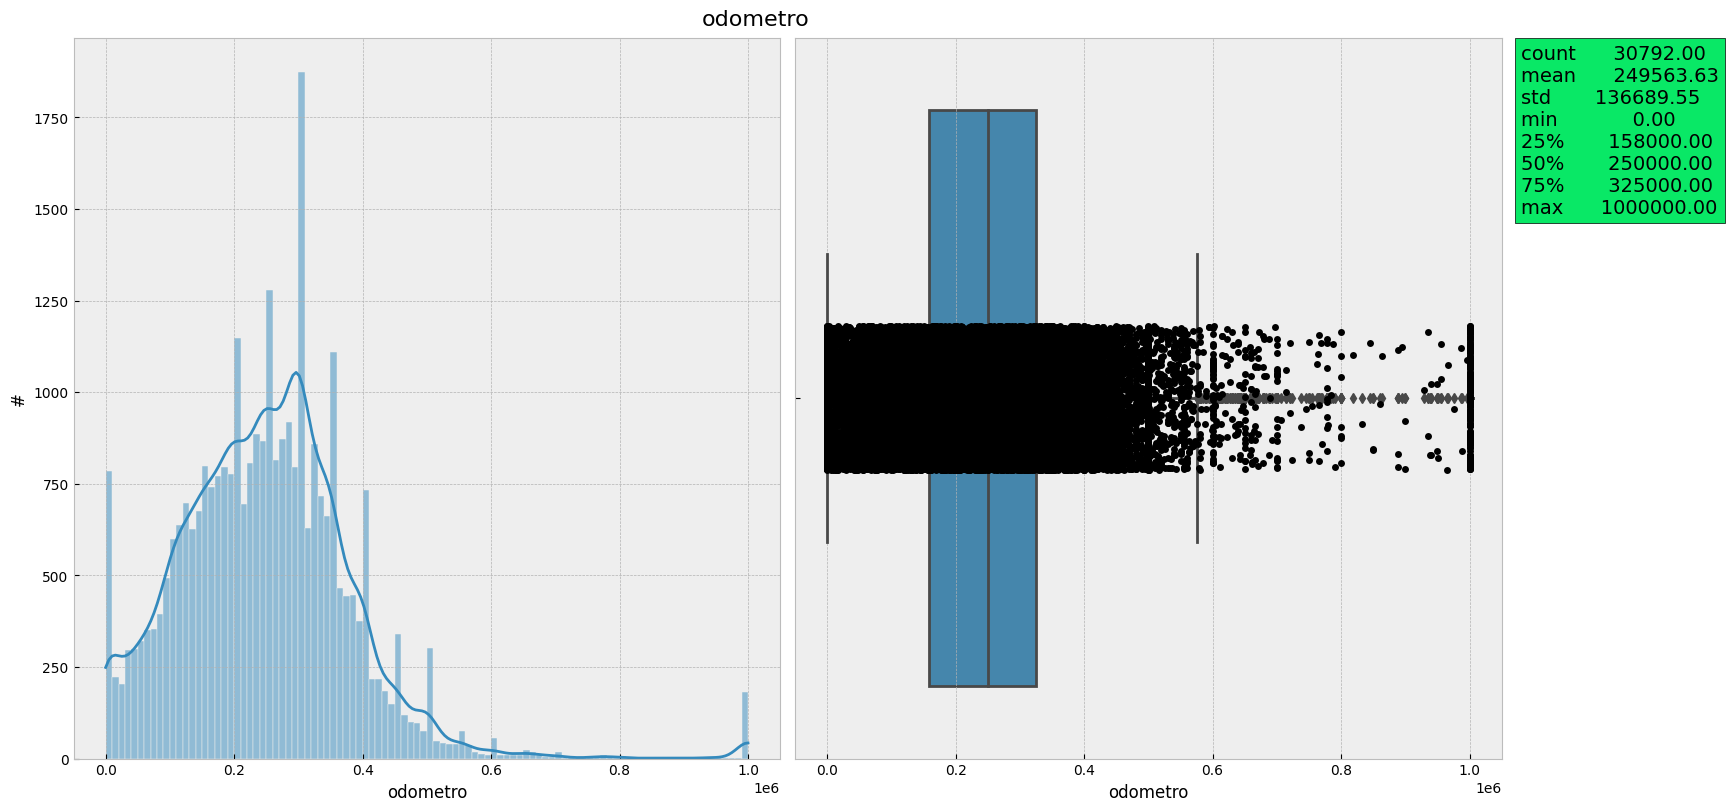

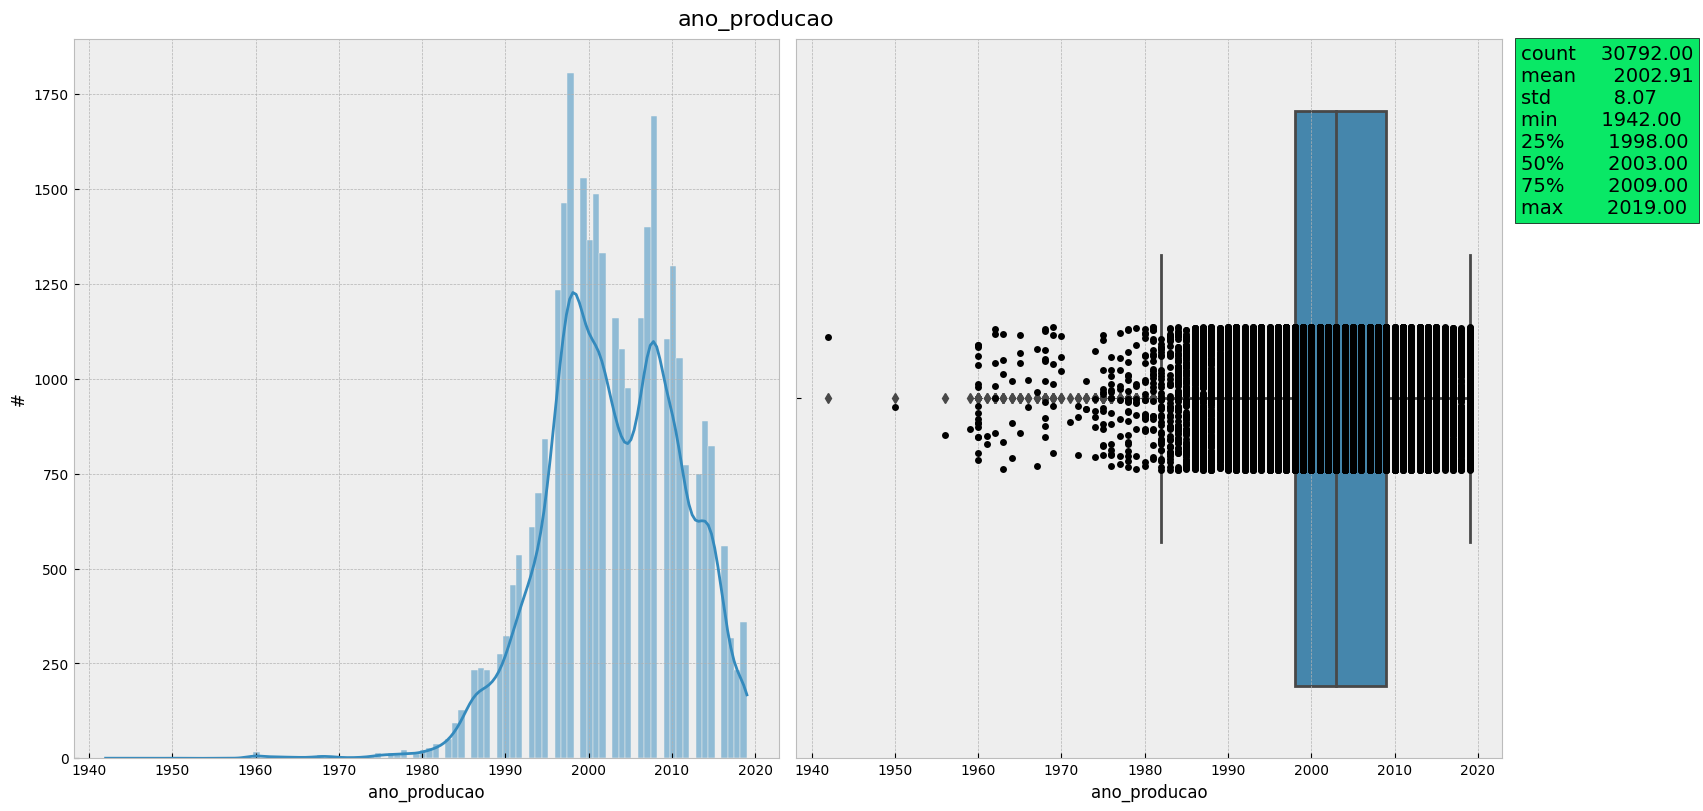

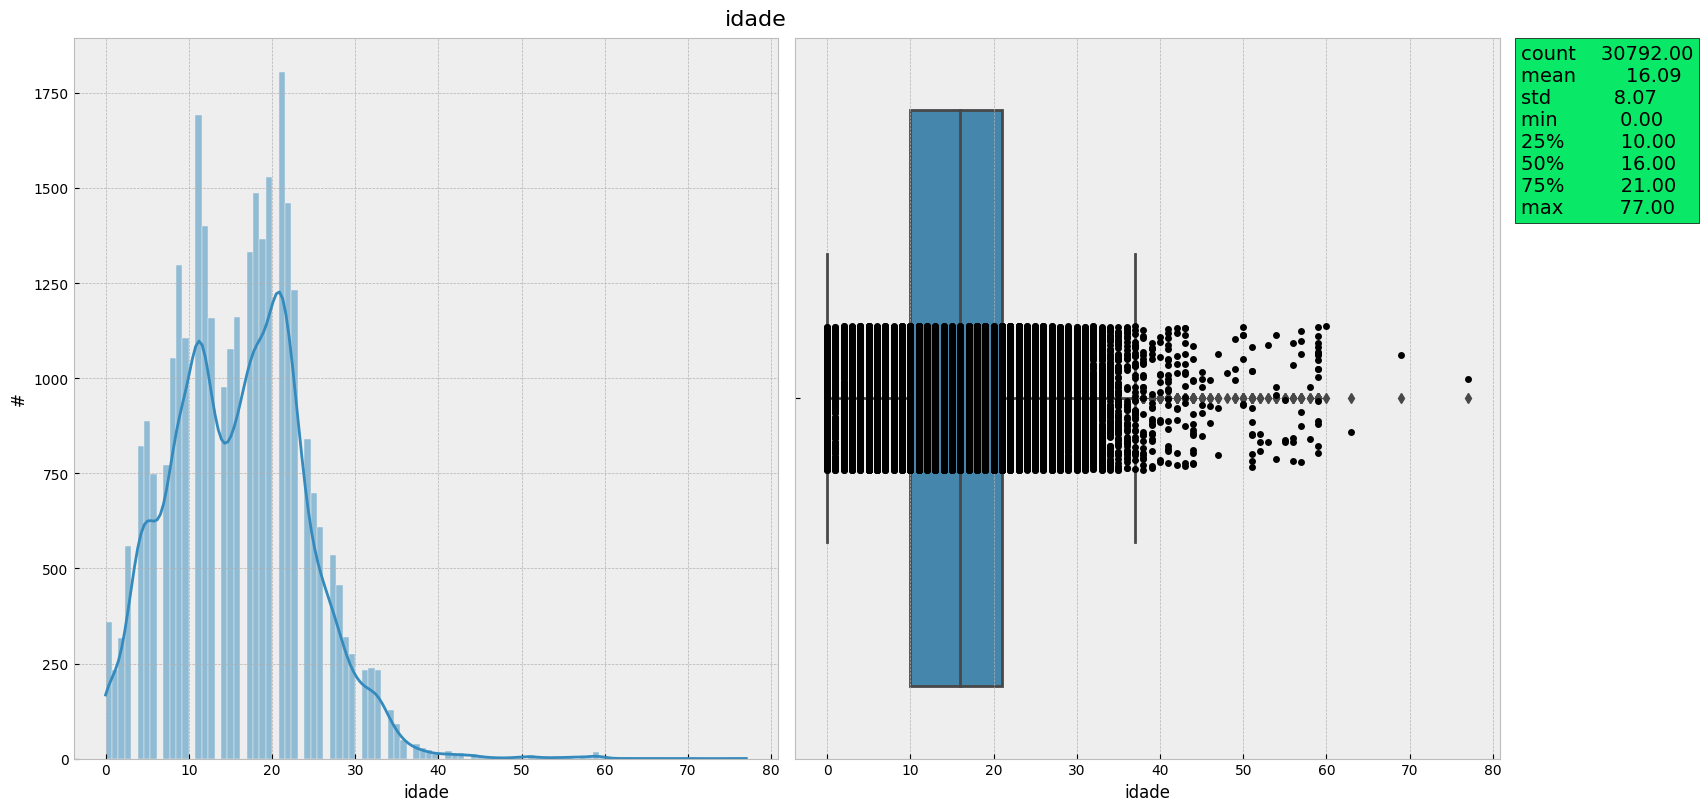

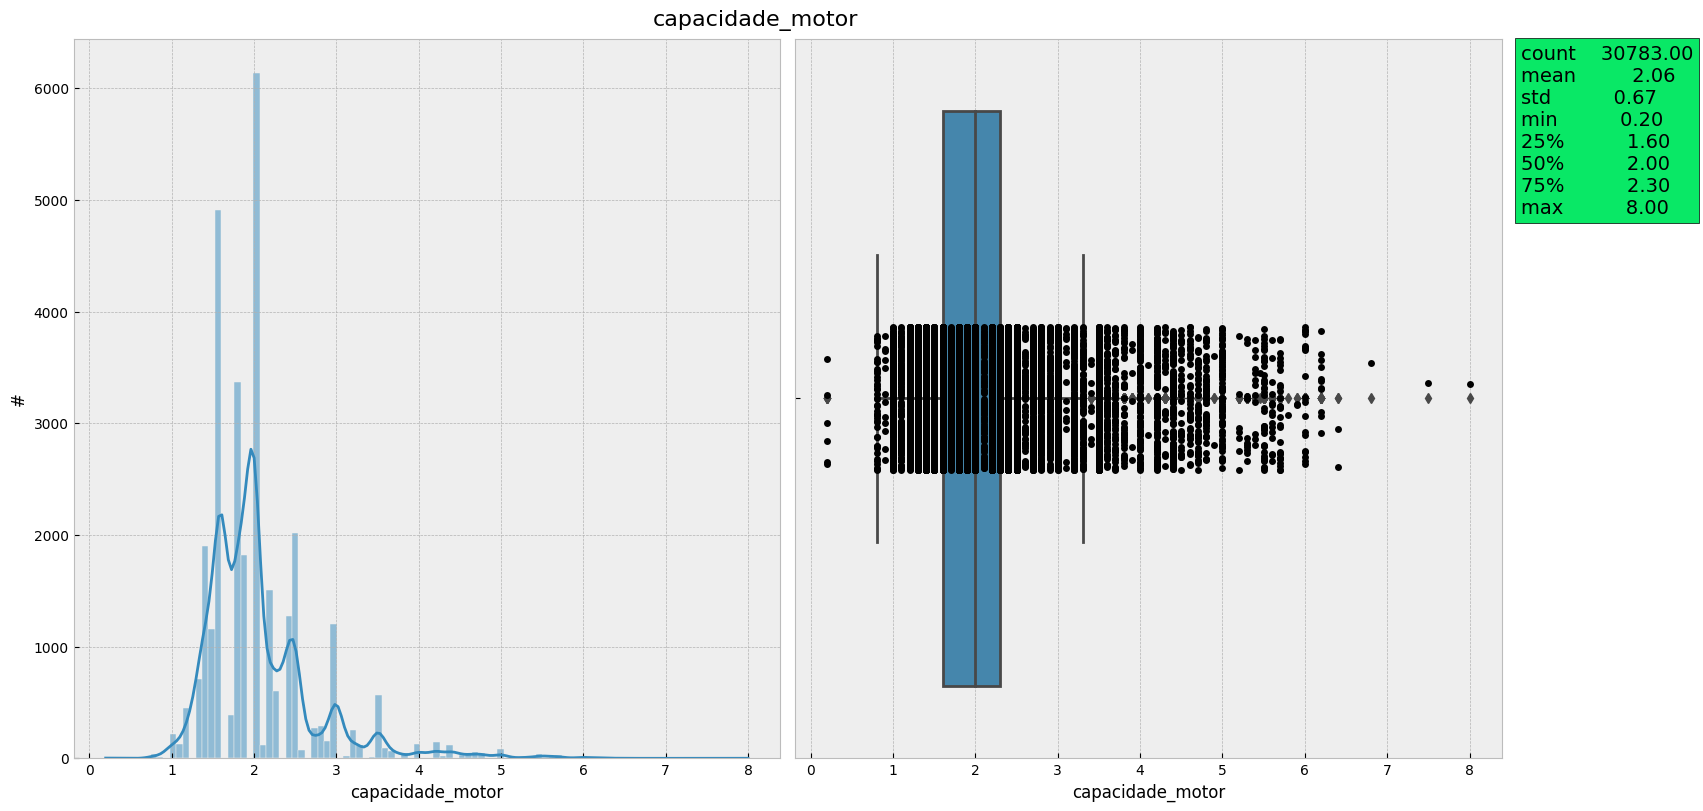

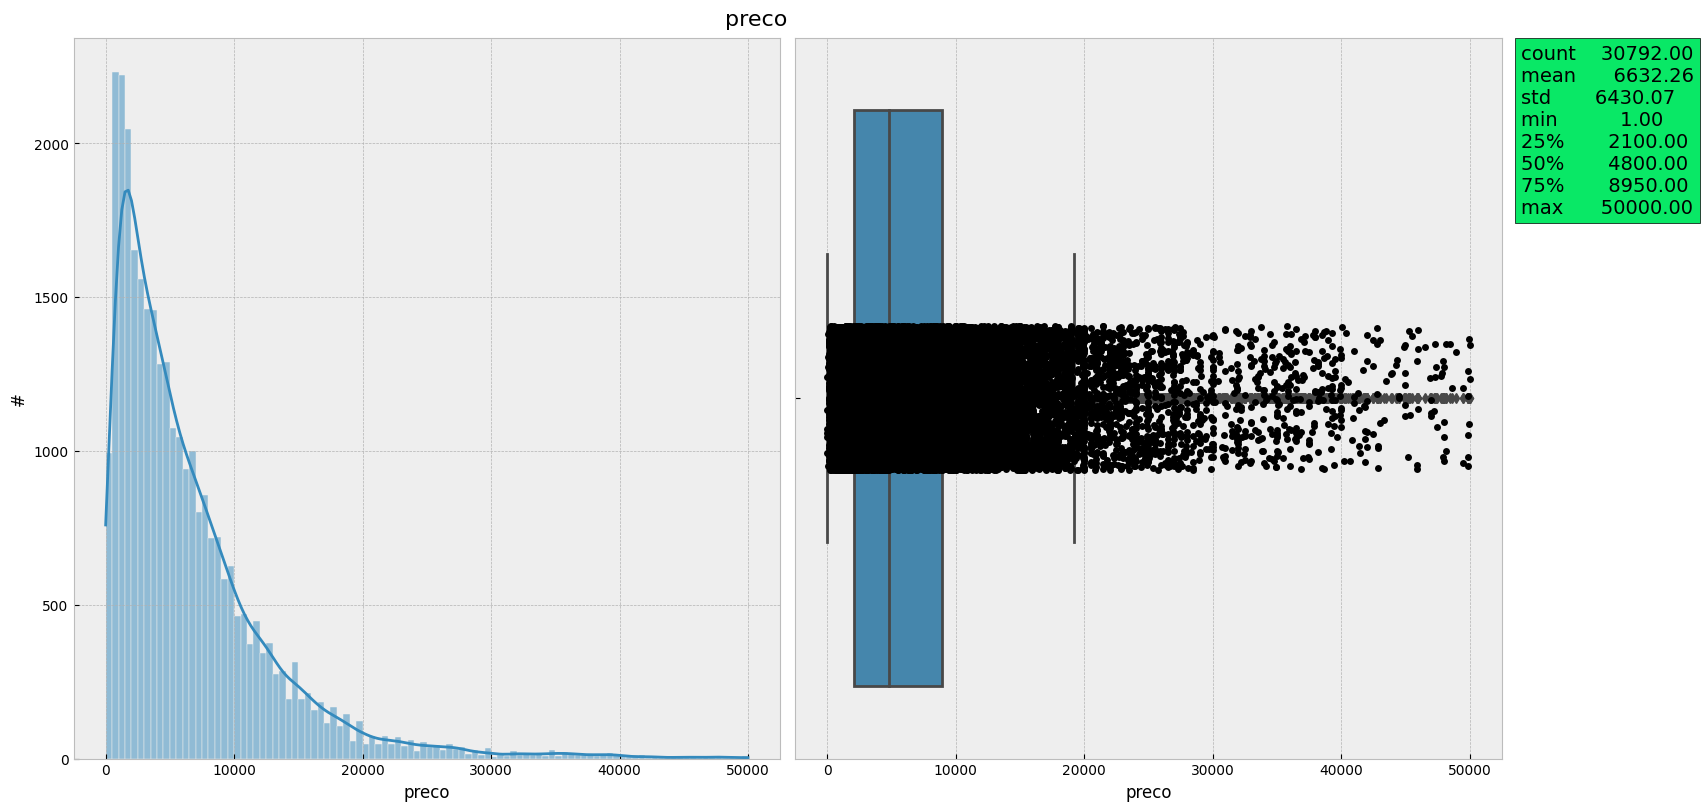

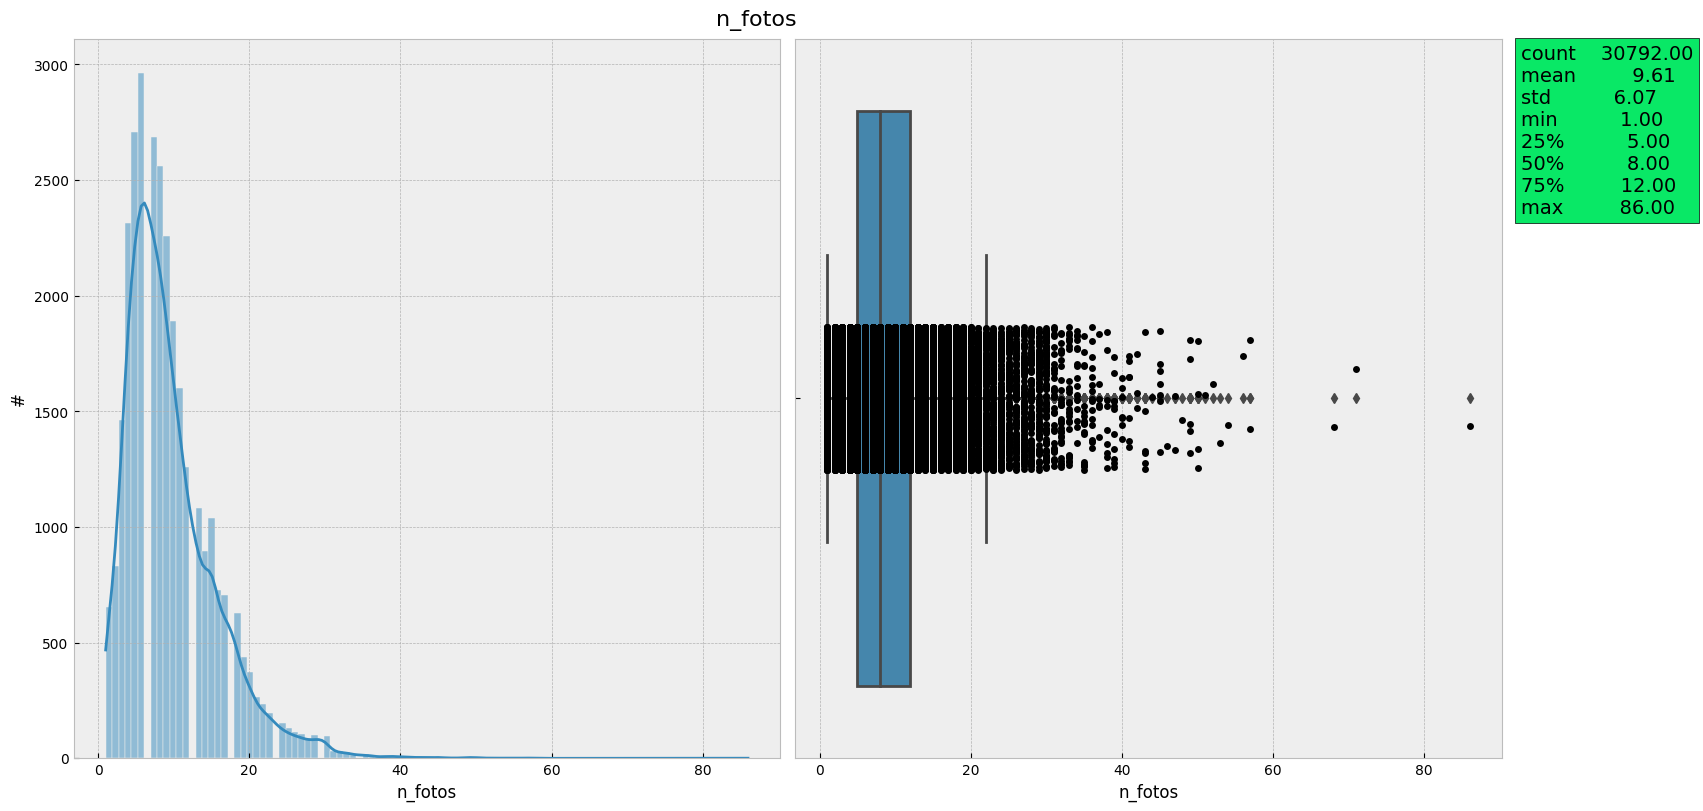

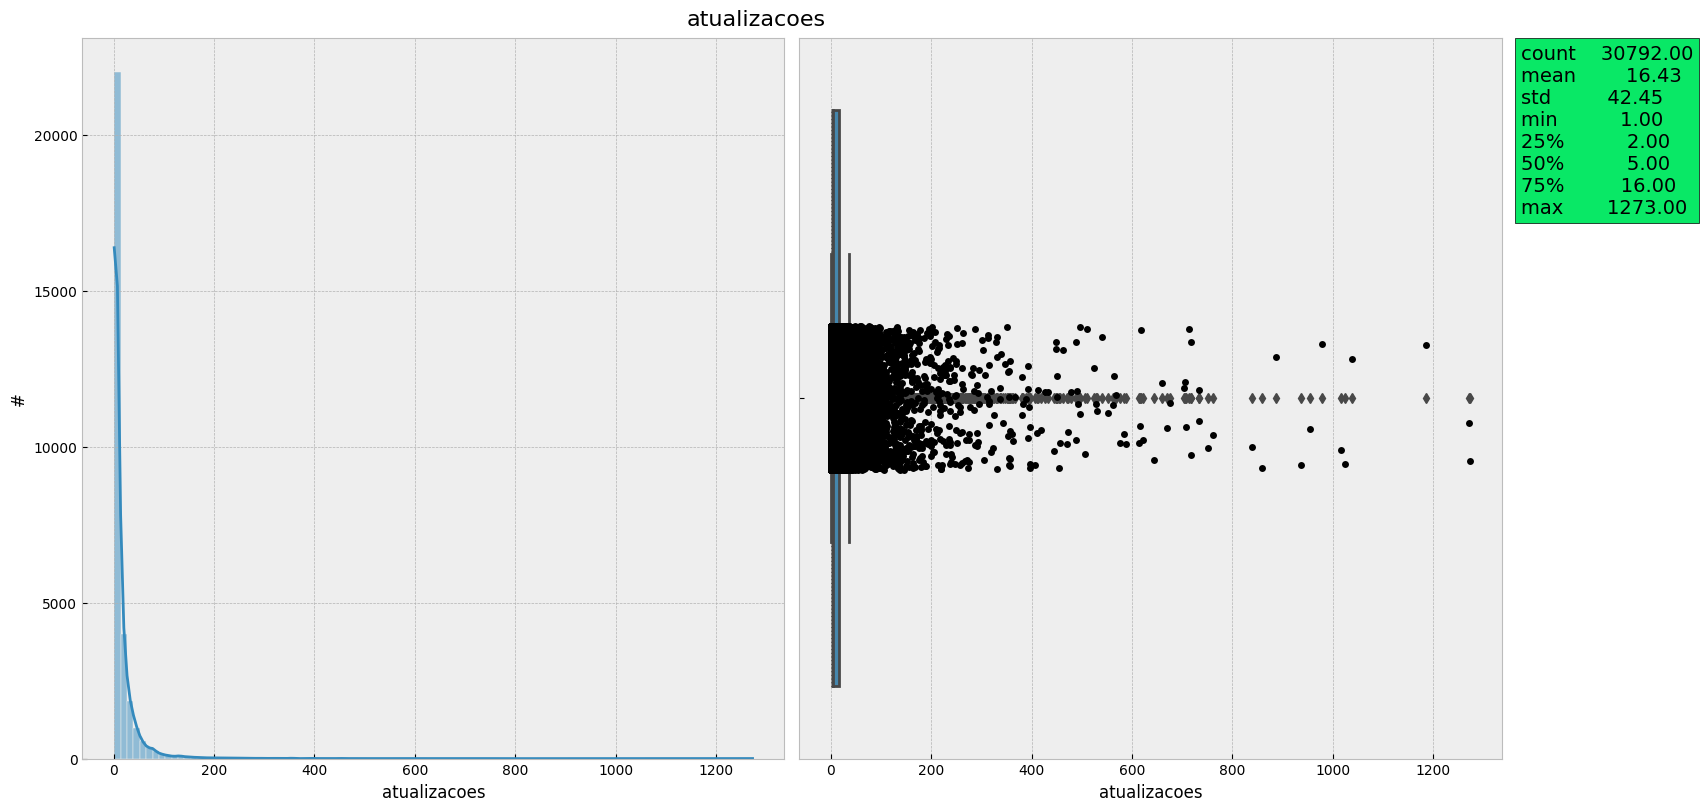

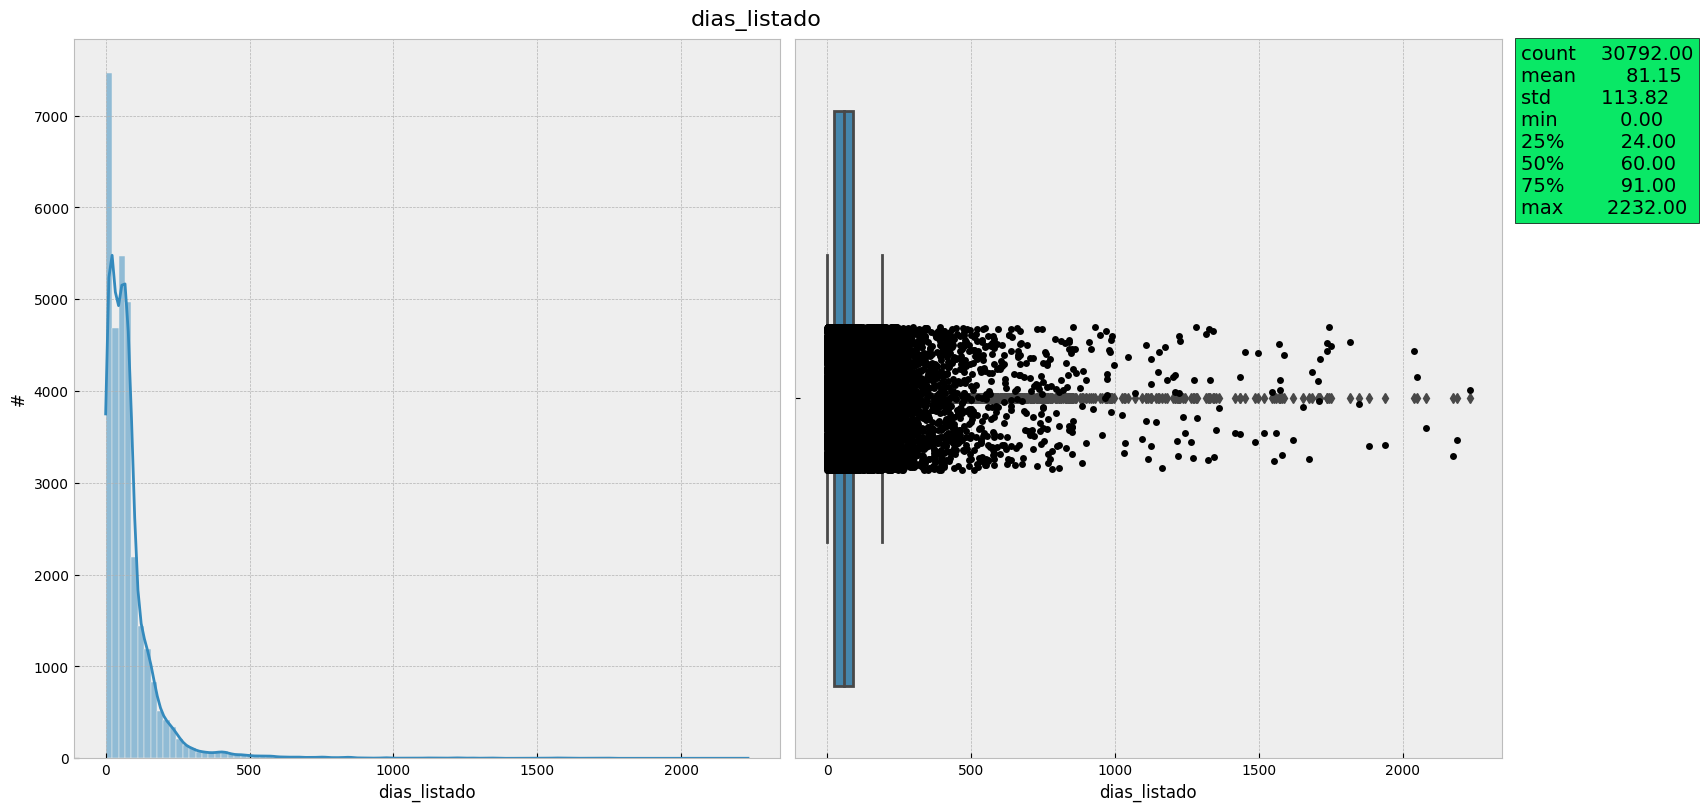

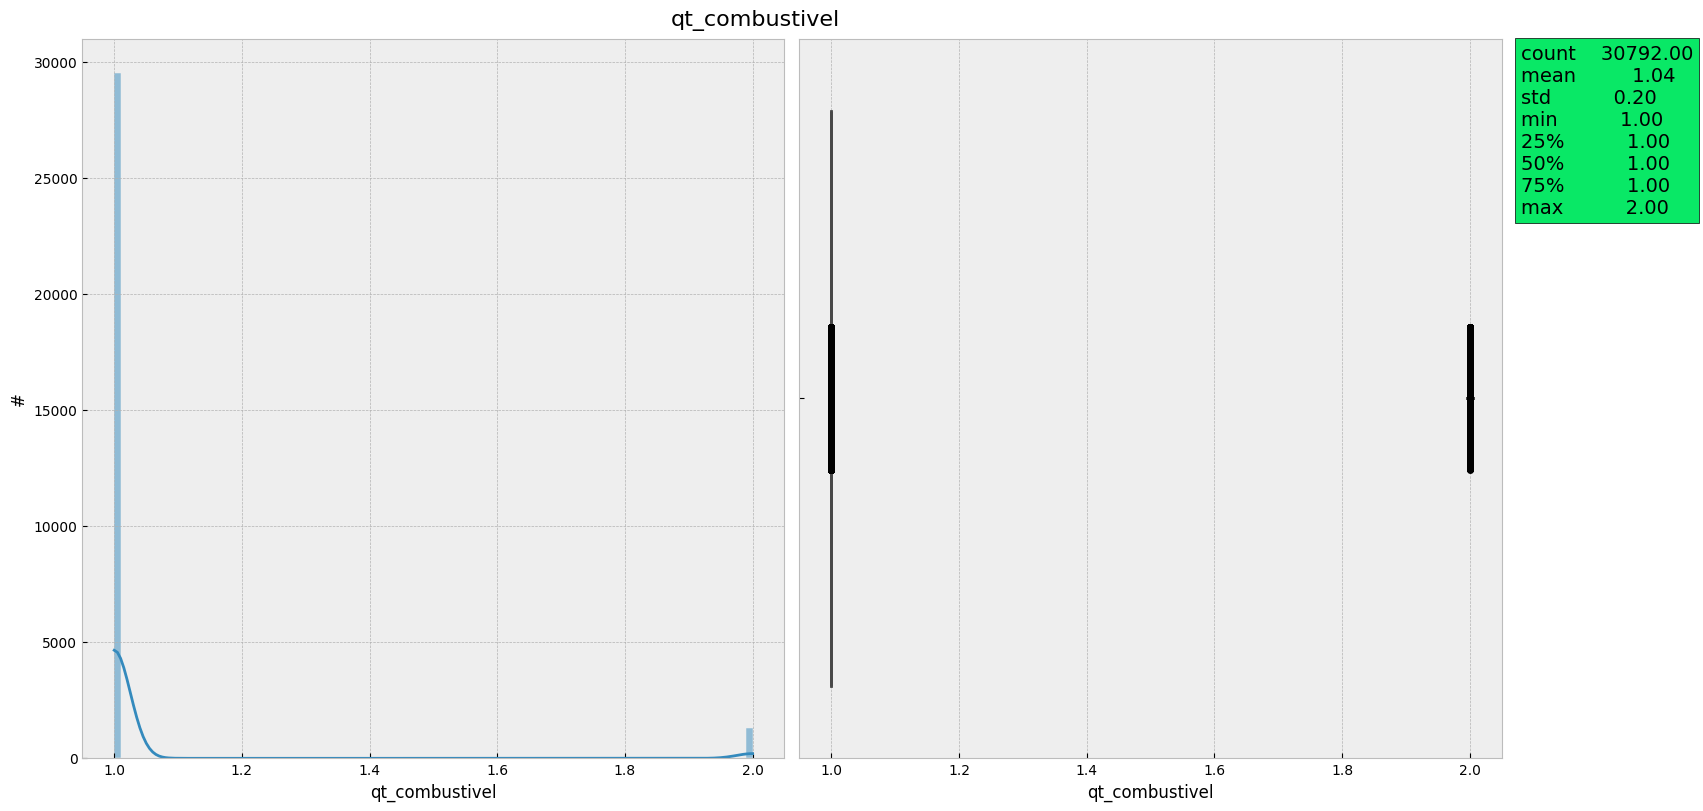

In [32]:
plt.style.use('default')
plt.style.use('bmh')
for indice,variavel in enumerate(variaveis_tipo['numerico']):
    fig, ax = plt.subplots(1,2,constrained_layout=True,figsize=(15,8))

    fig.suptitle(f'{variavel}',size=16)

    sns.histplot(data=car_train,x=variavel,kde=True,ax=ax[0],bins=100)
    sns.boxplot(data=car_train,x=variavel,ax=ax[1])
    sns.stripplot(data=car_train,x=variavel,jitter=True,color='k')

    ax[0].set_ylabel('#',size=12)
    

    texto = round(car_train[variavel].describe(),2).to_string()

    fig.text(1.01,0.74,texto,size=14,bbox=dict(boxstyle='square',ec= (0,0,0), fc= (9/255, 232/255, 102/255)))

    plt.show()

**Pontos:**

* Observa-se distribuições assimétricas para a grande maioria das variáveis numéricas;

* É clara a presença de outliers e valores que levantam dúvidas;

* Com relação aos valores duvidosos, tem-se que:

**1. Odômetro: Provavelmente a quilometragem 0 são de carros novos. Além disso, observamos veículos com 1 milhão de quilômetros rodados;**

**2. Ano de produção: Existem carros realmente antigos;**

**3. Capacidade do motor: Um carro 0.25 e um 8.0 realmente são valores que surpreende;**

**3. Preço: Um carro custando \$1 realmente é muito estranho.**

**4. E por fim os dias listados, é observado que existem carros que estão listados por mais de 2 anos e até mesmo mais de 5 anos. Por qual motivo esses carros estão a tanto tempo listados ?**

É claro que existem muitos outros pontos que poderíamos investigar, como por exemplo, a quantidade de atualizações que um veículo recebeu, o número de fotos, interação entre as features como idade versus odômetro e etc...

Agora analisaremos as variáveis categóricas através de algumas estatísticas básicas. 

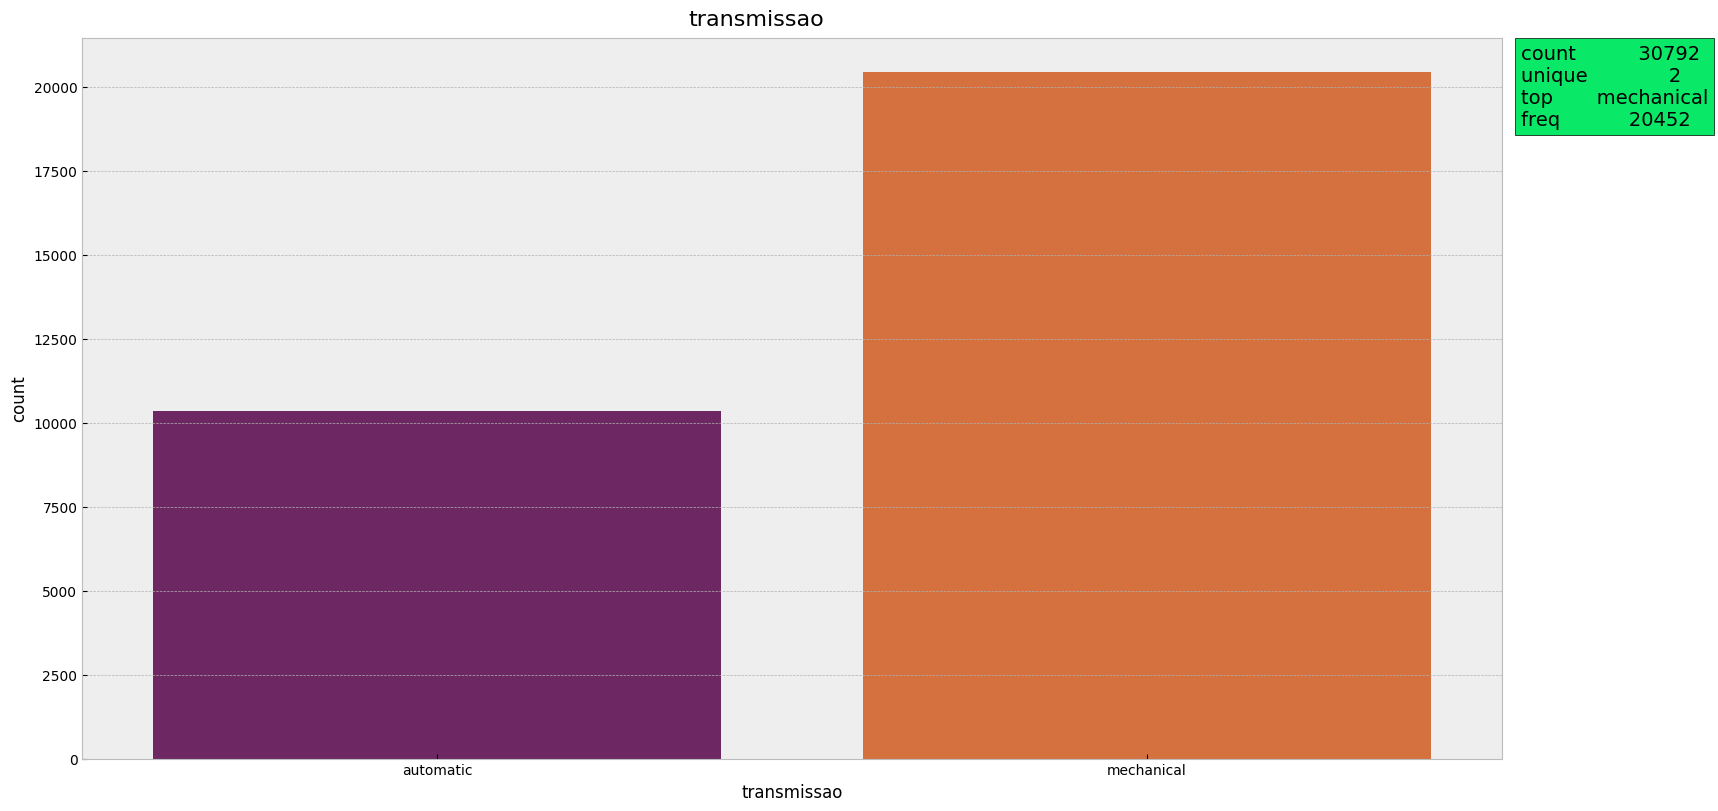

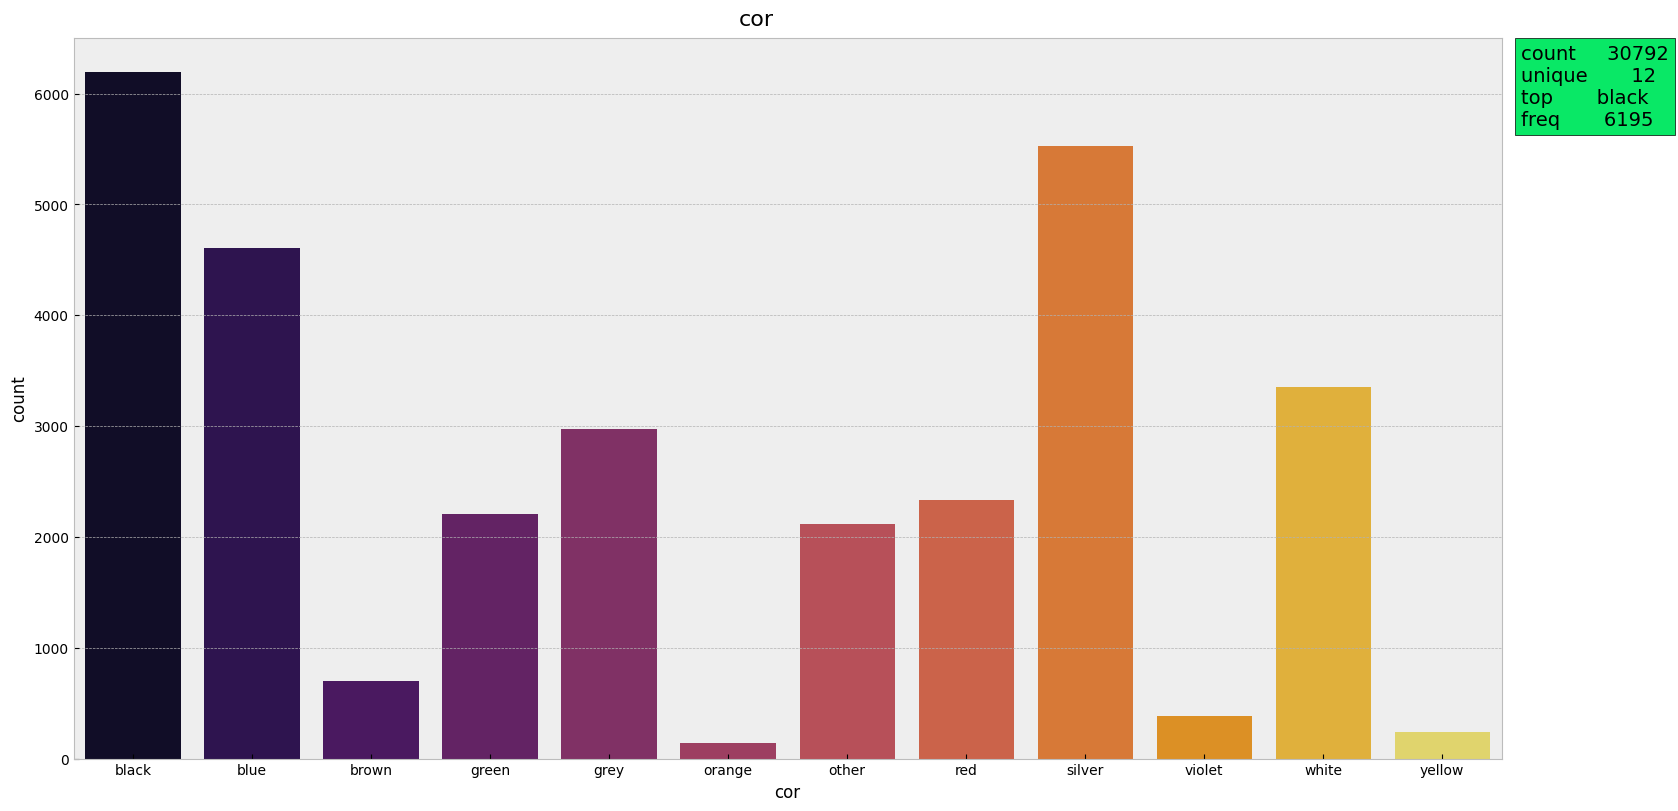

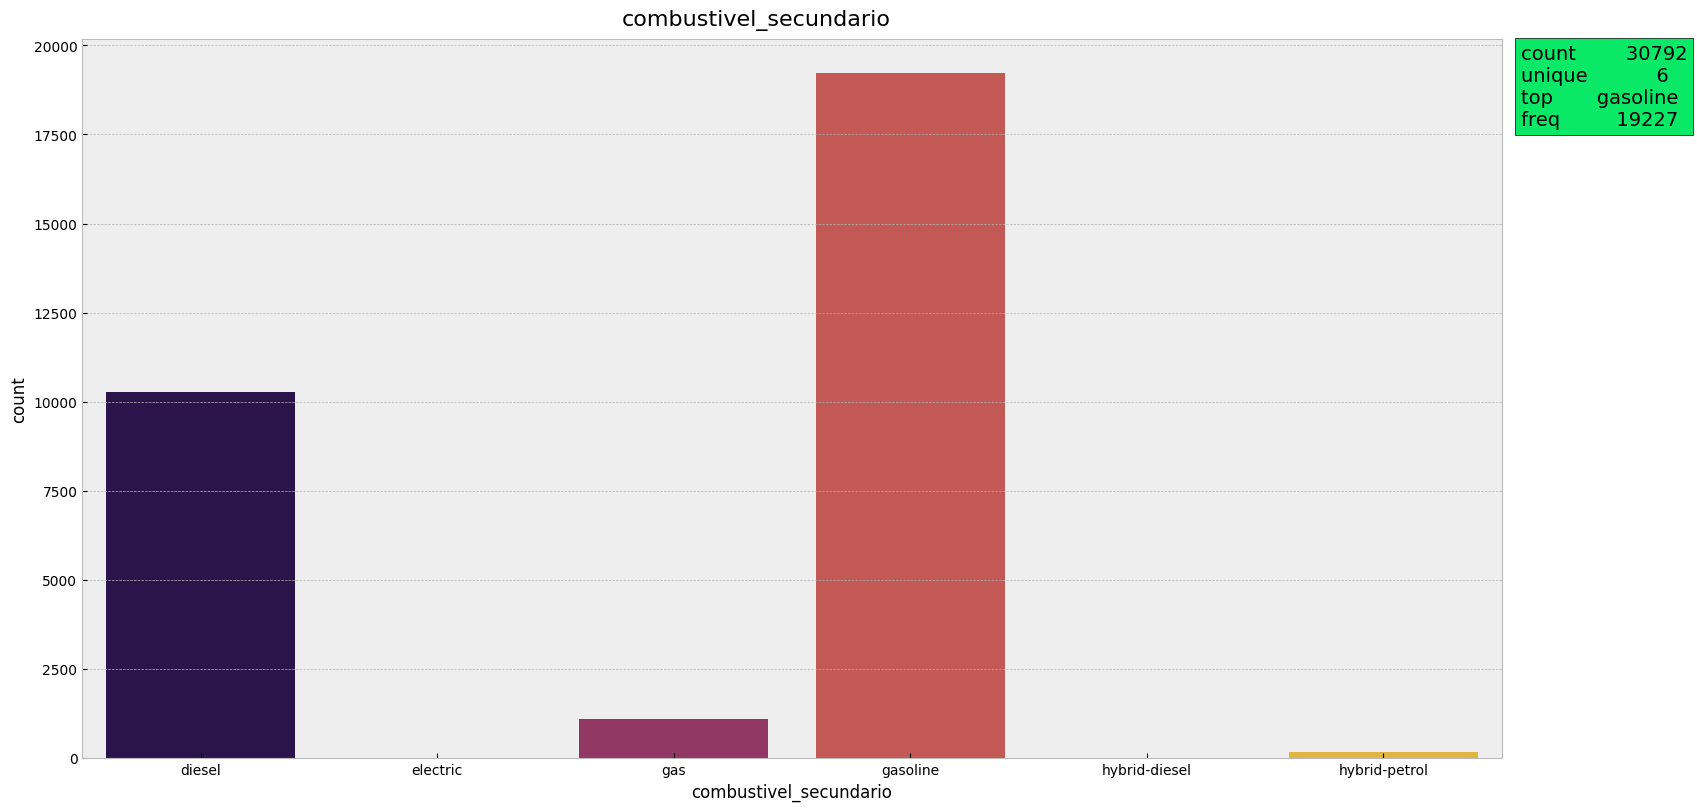

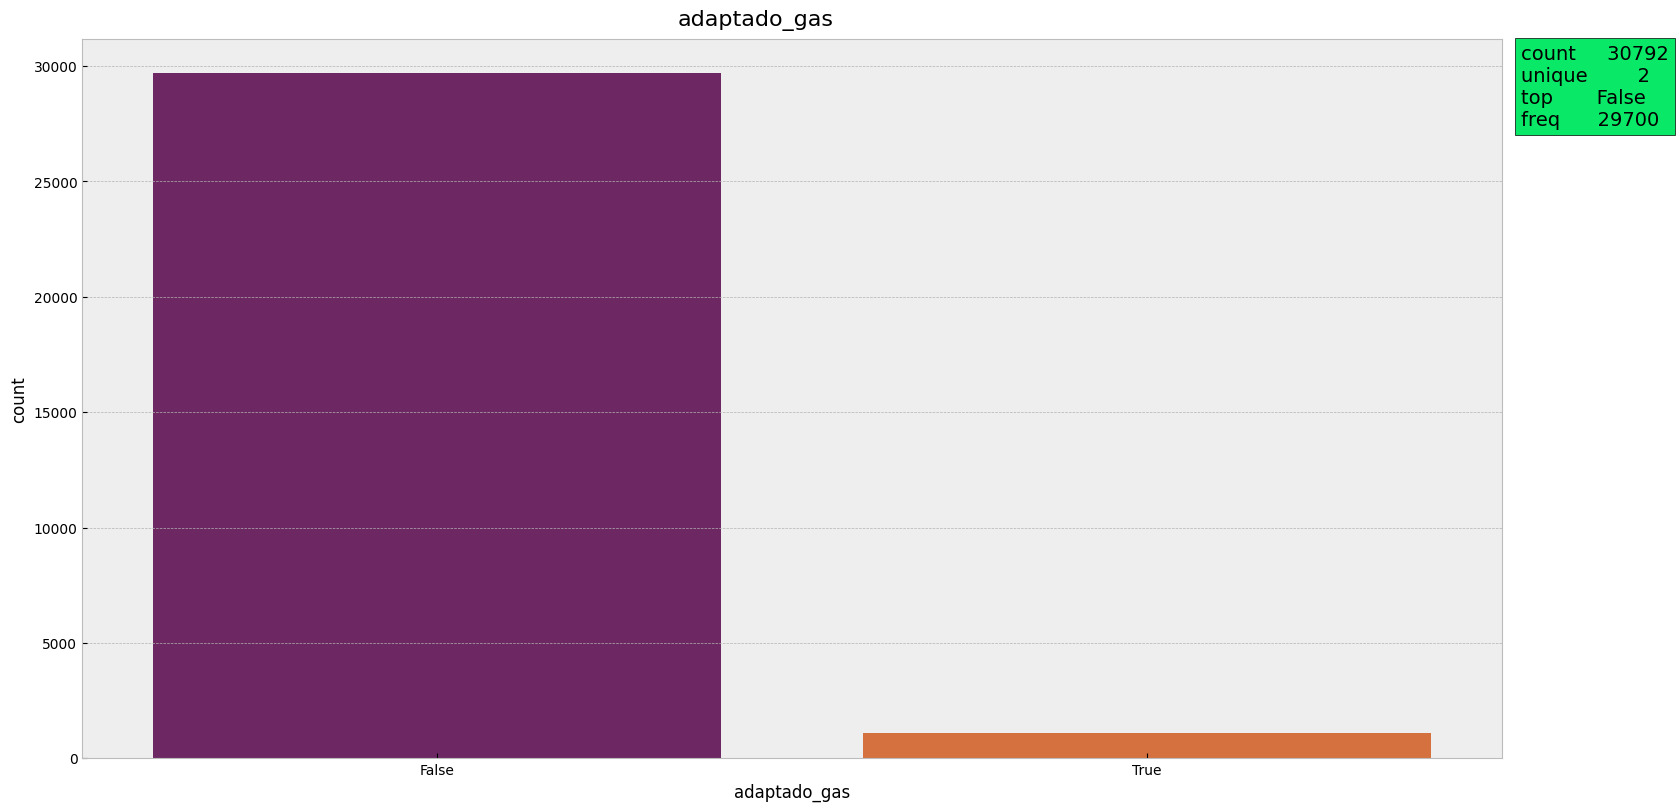

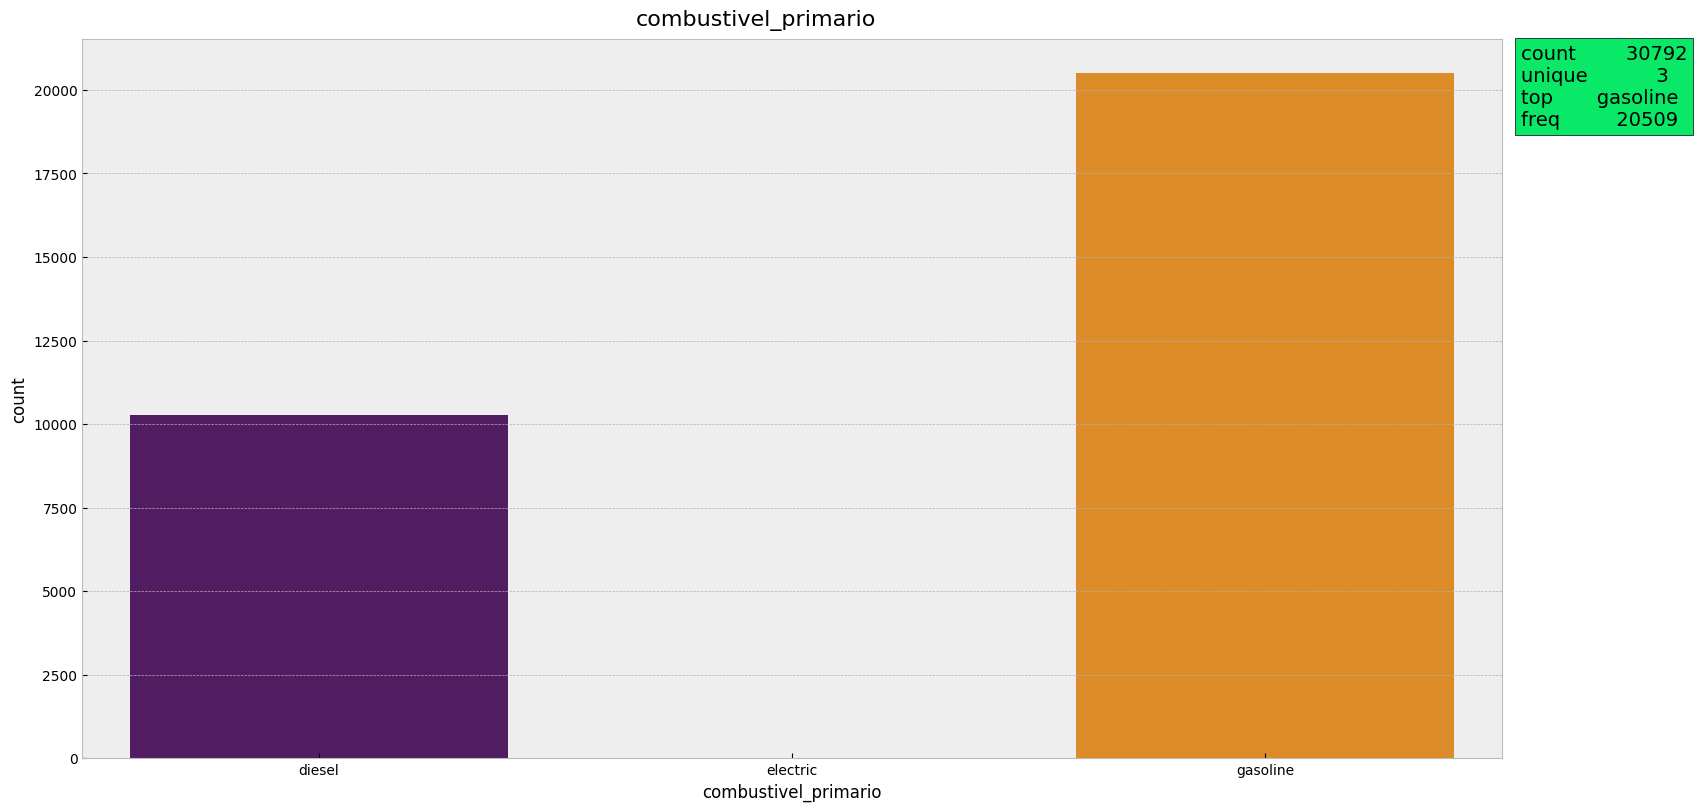

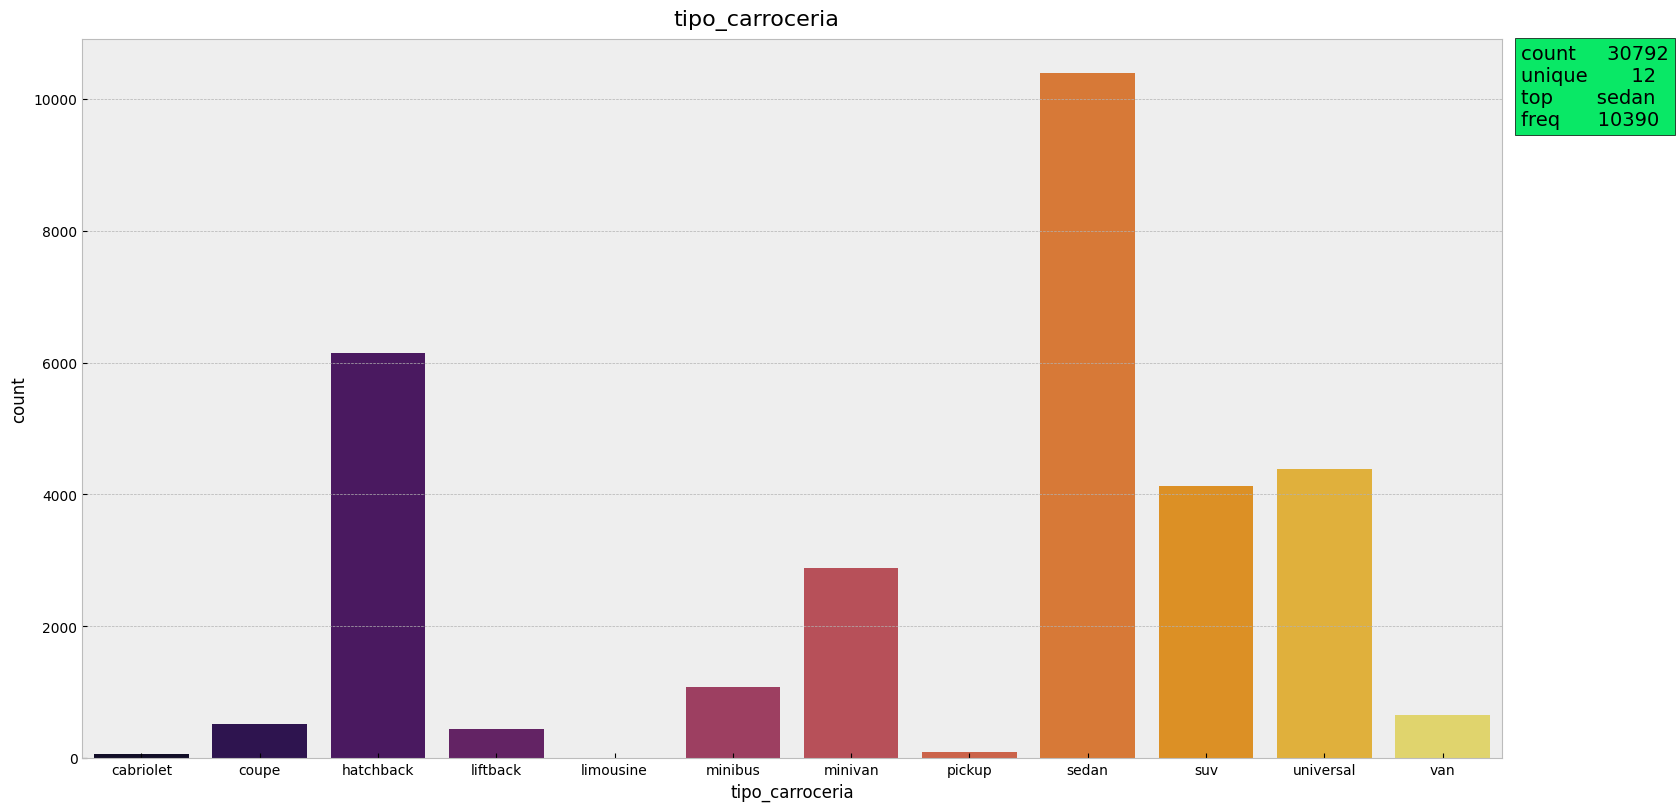

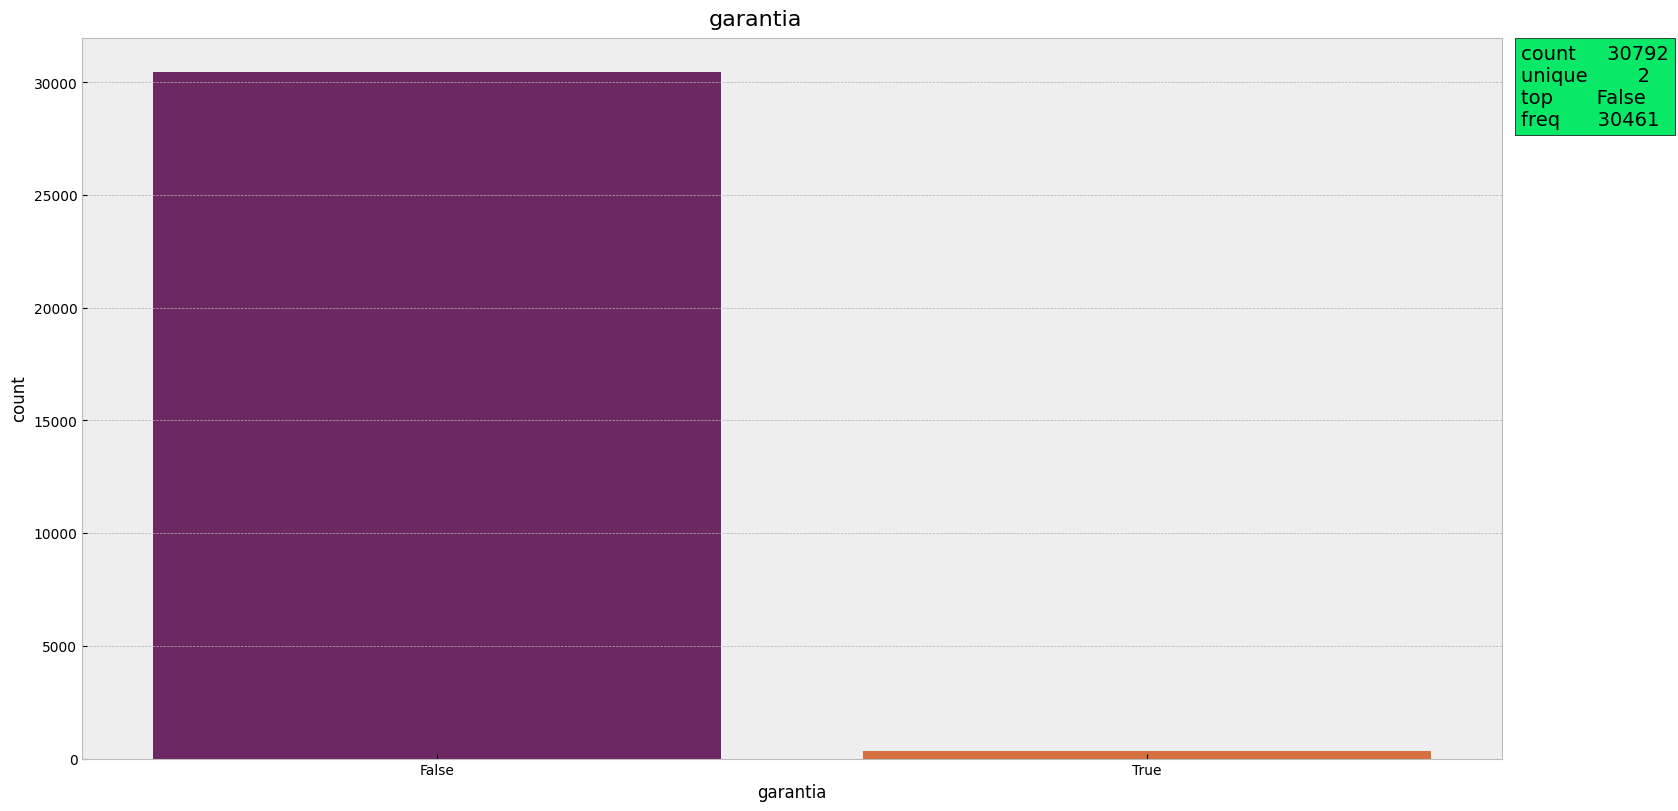

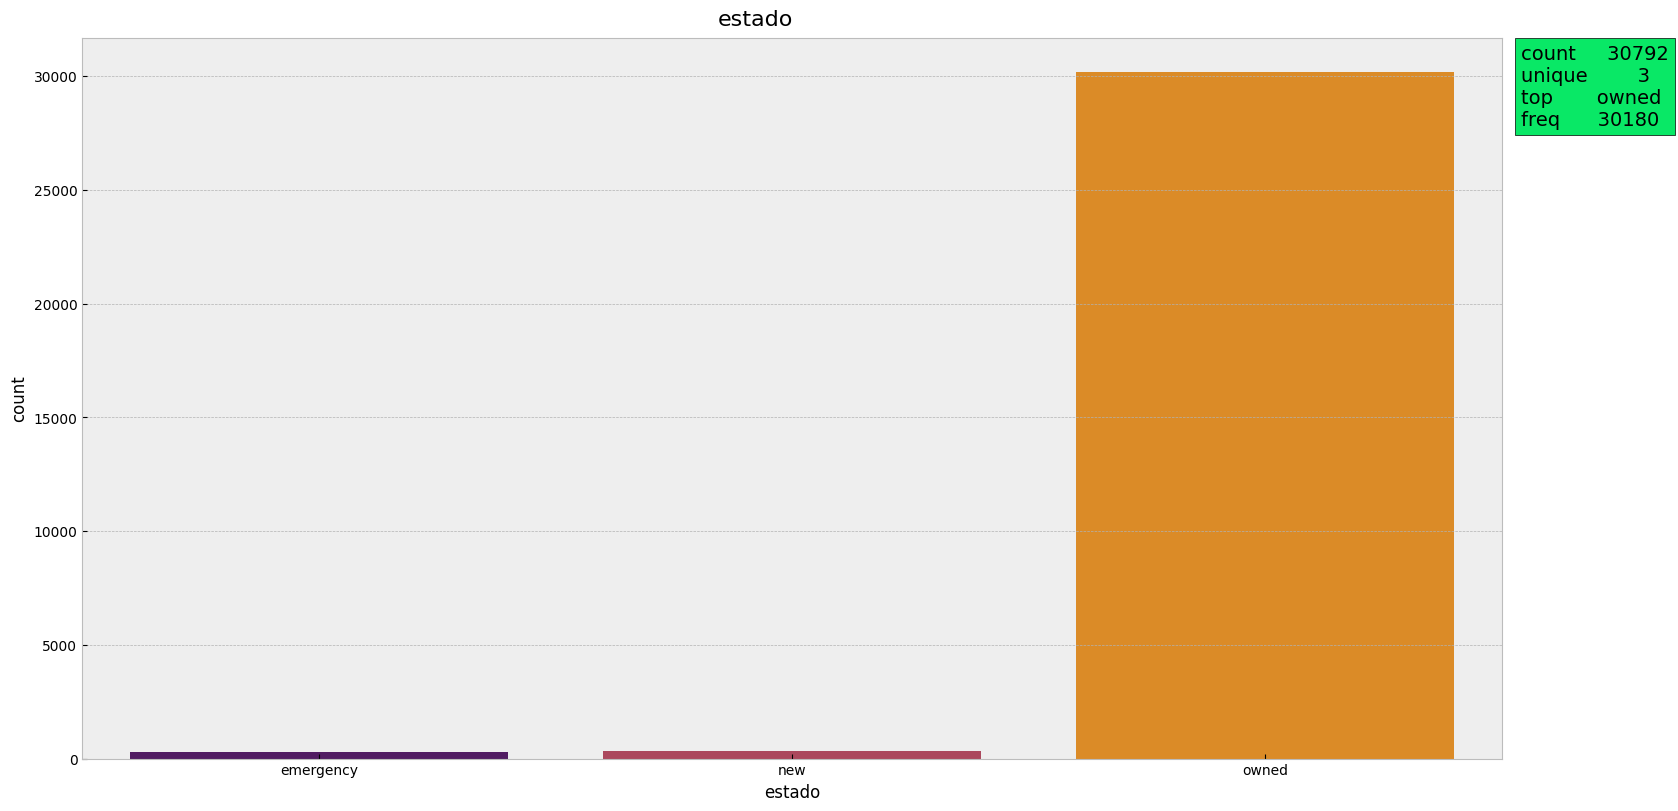

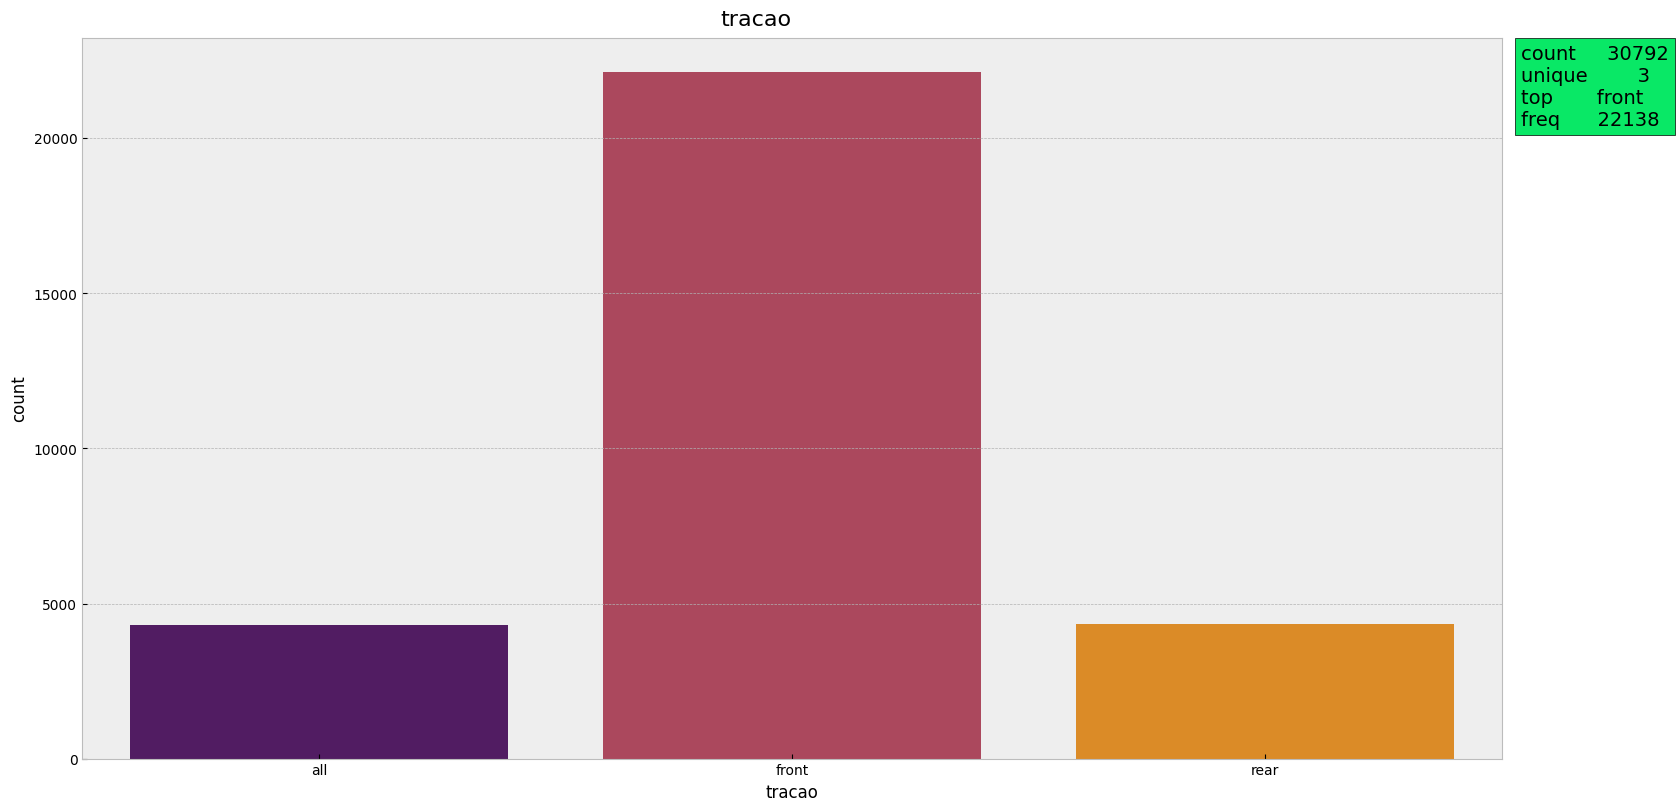

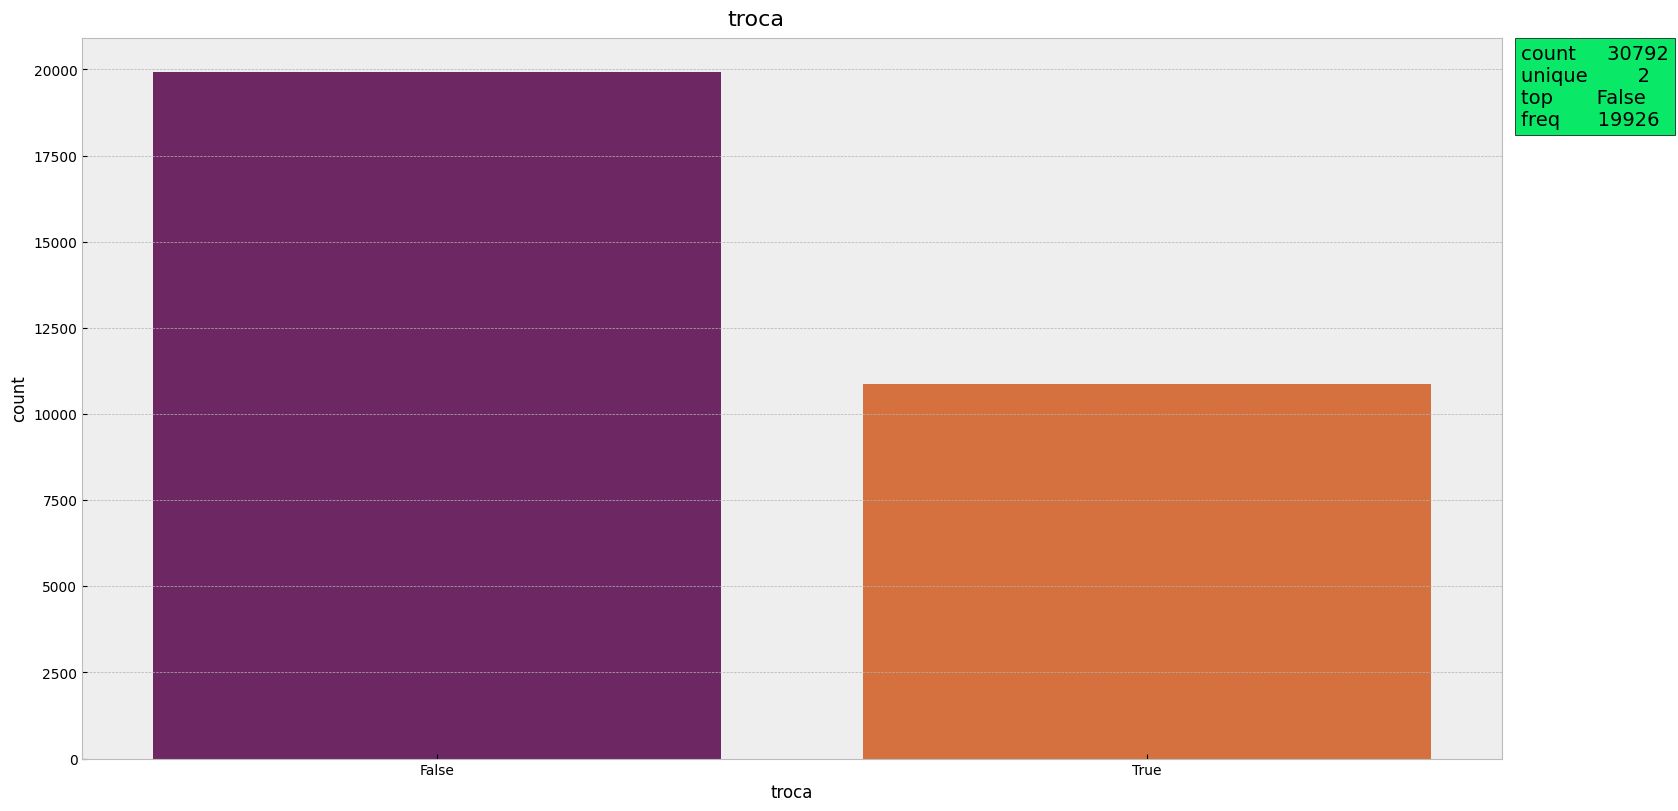

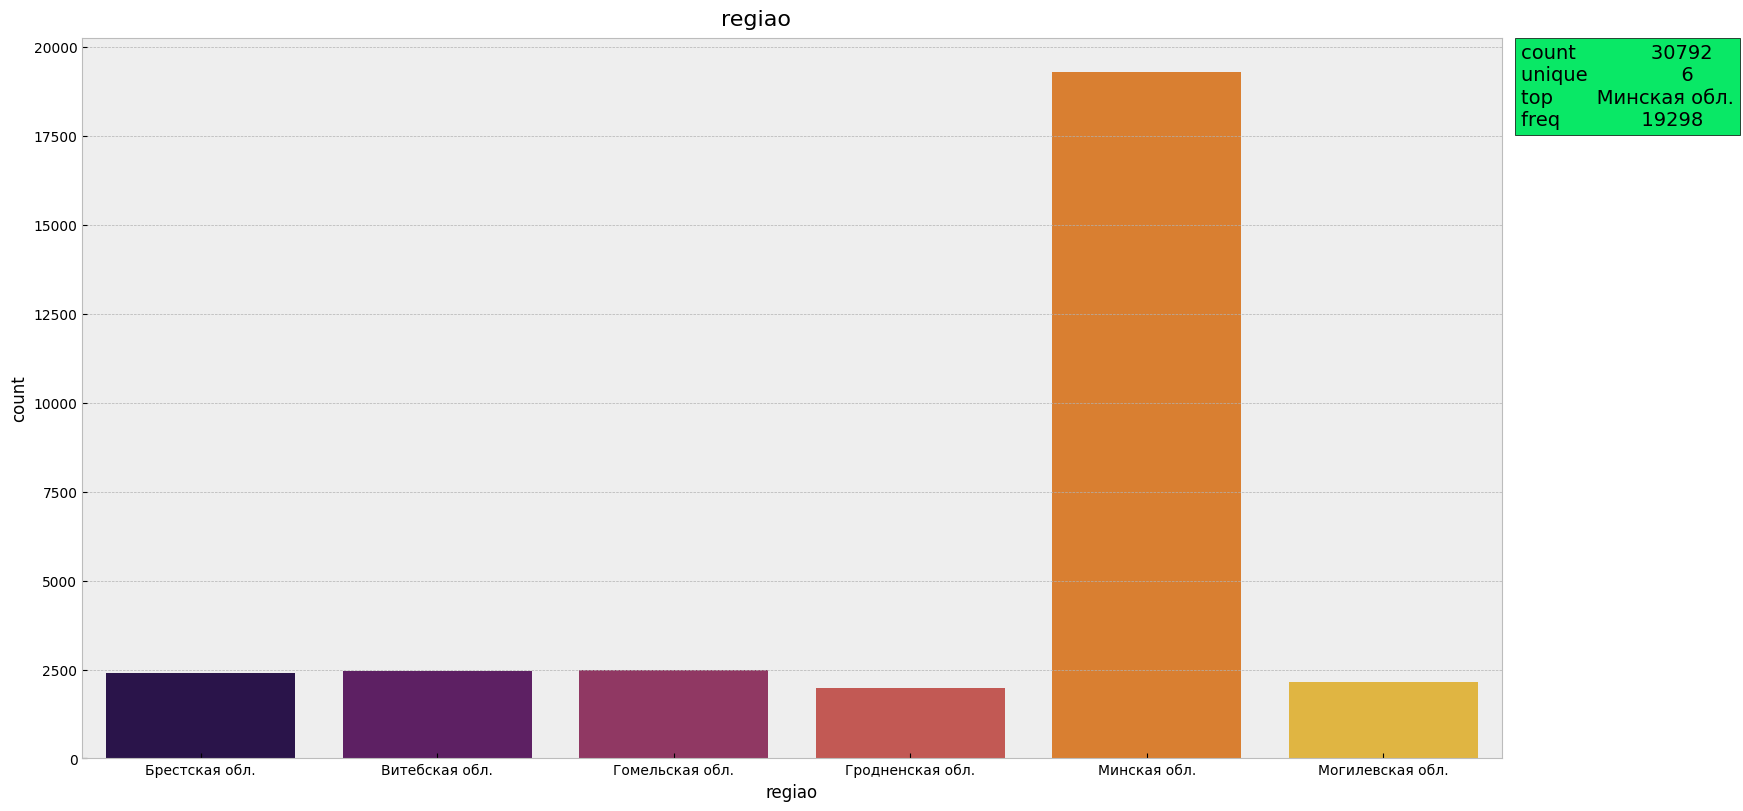

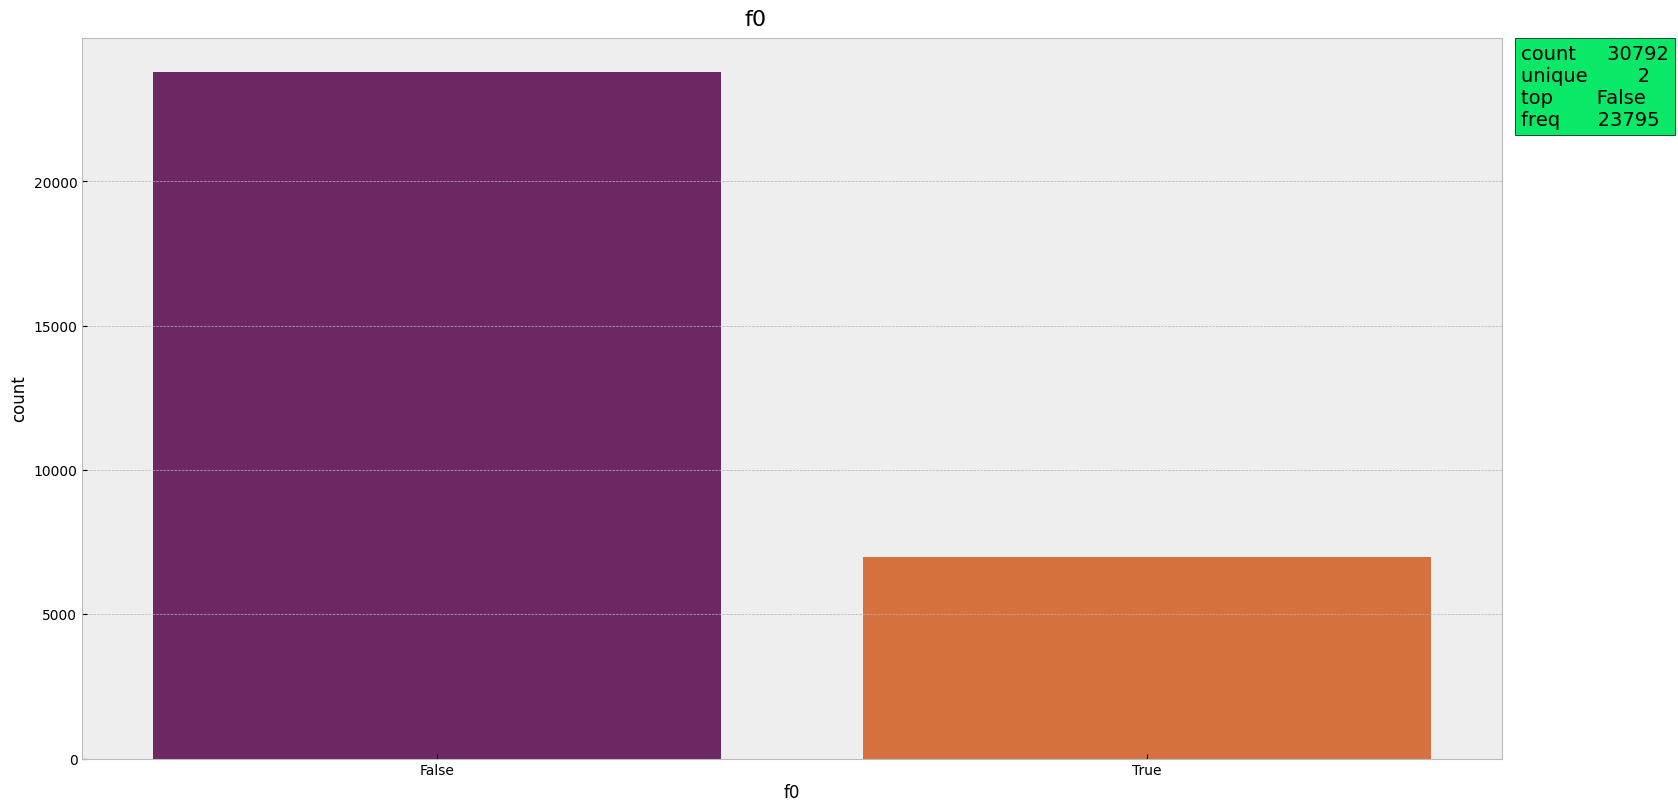

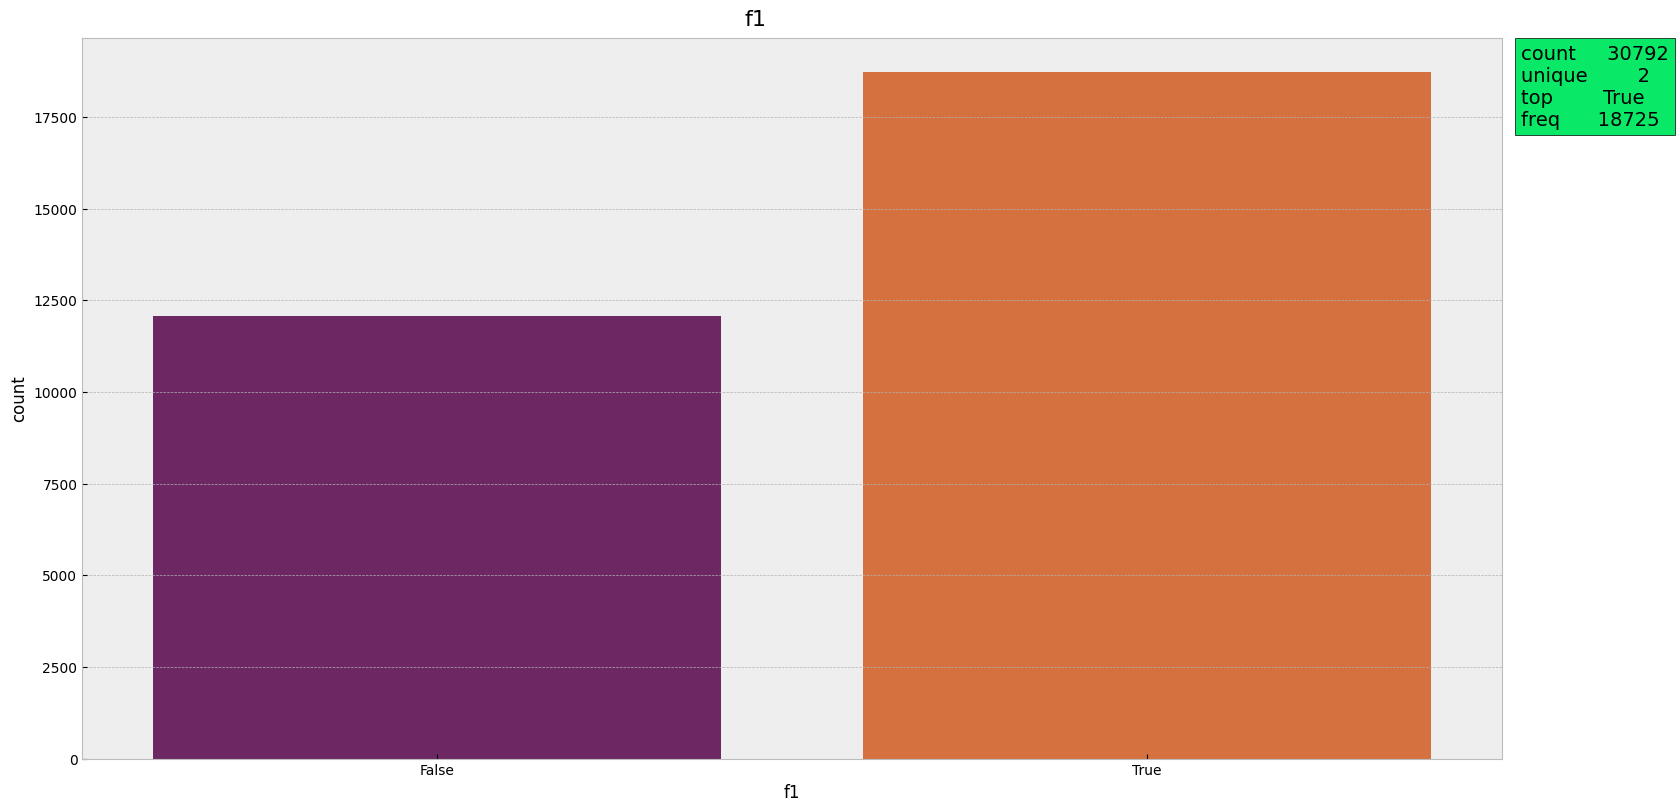

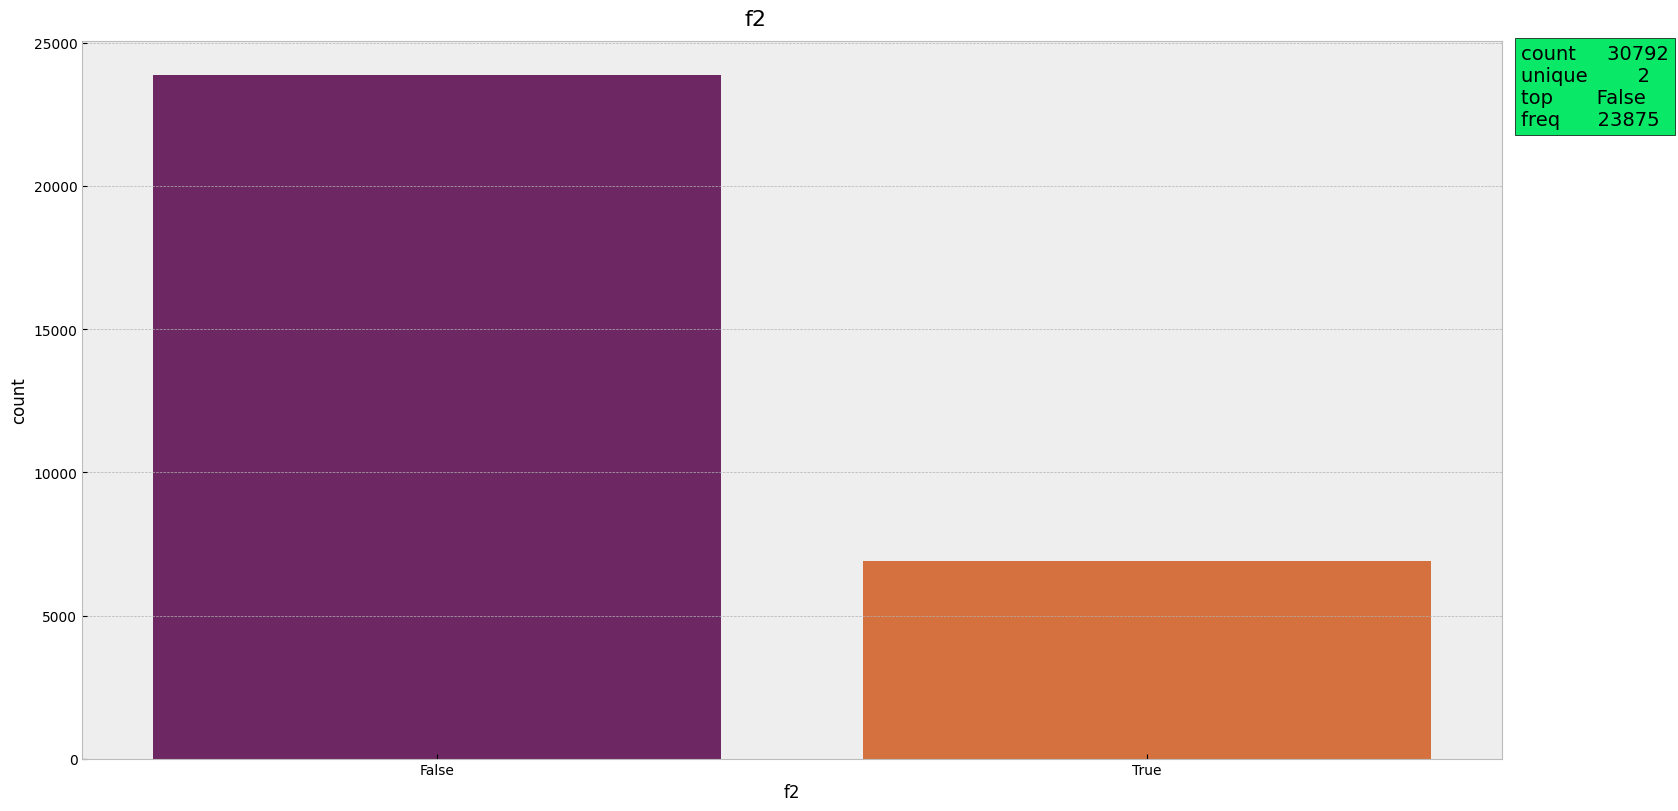

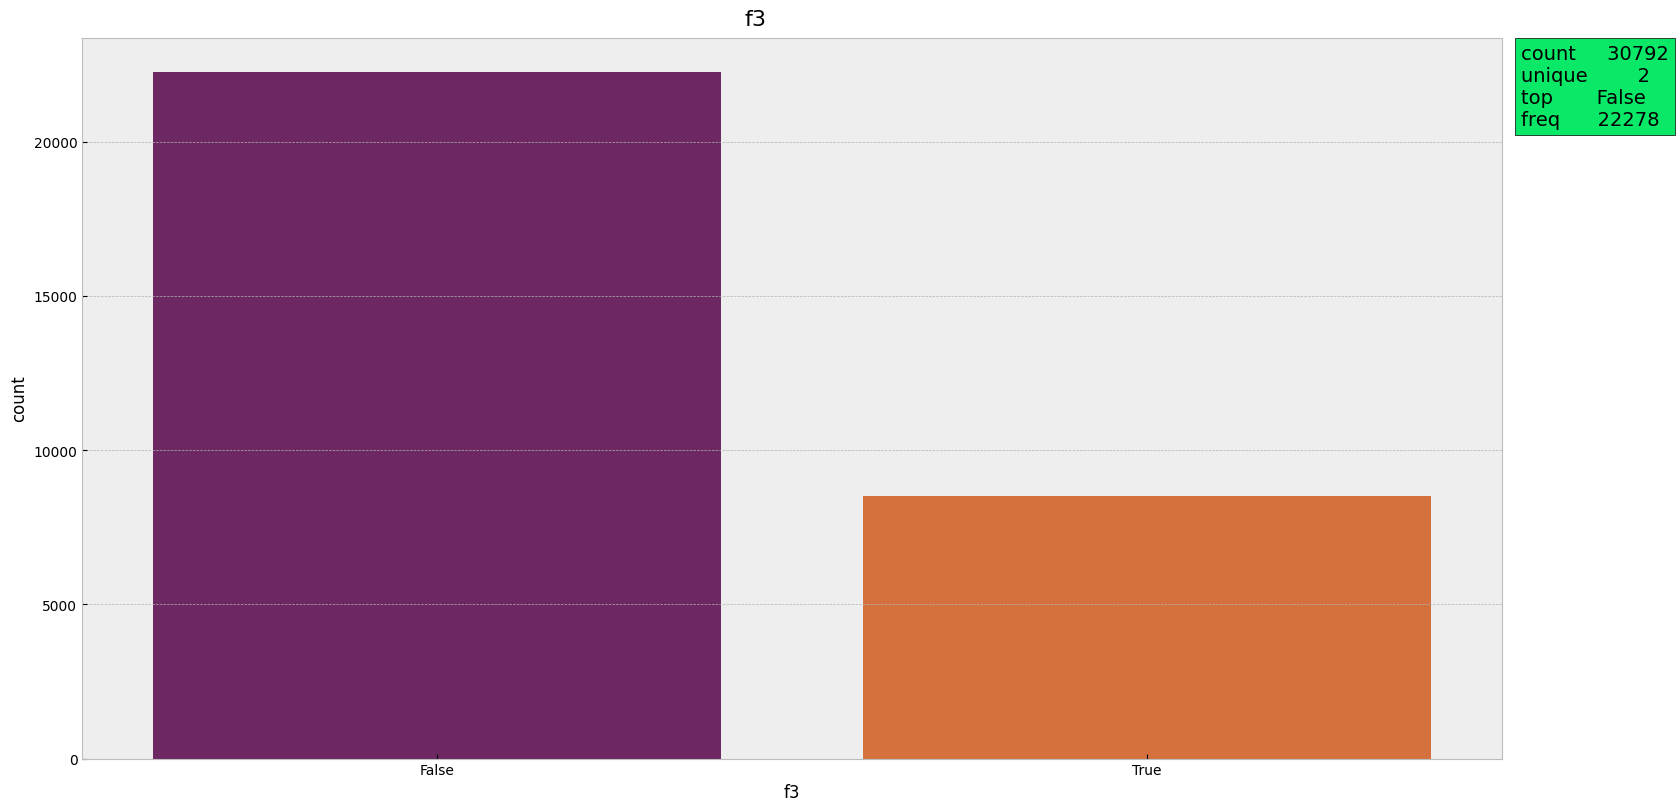

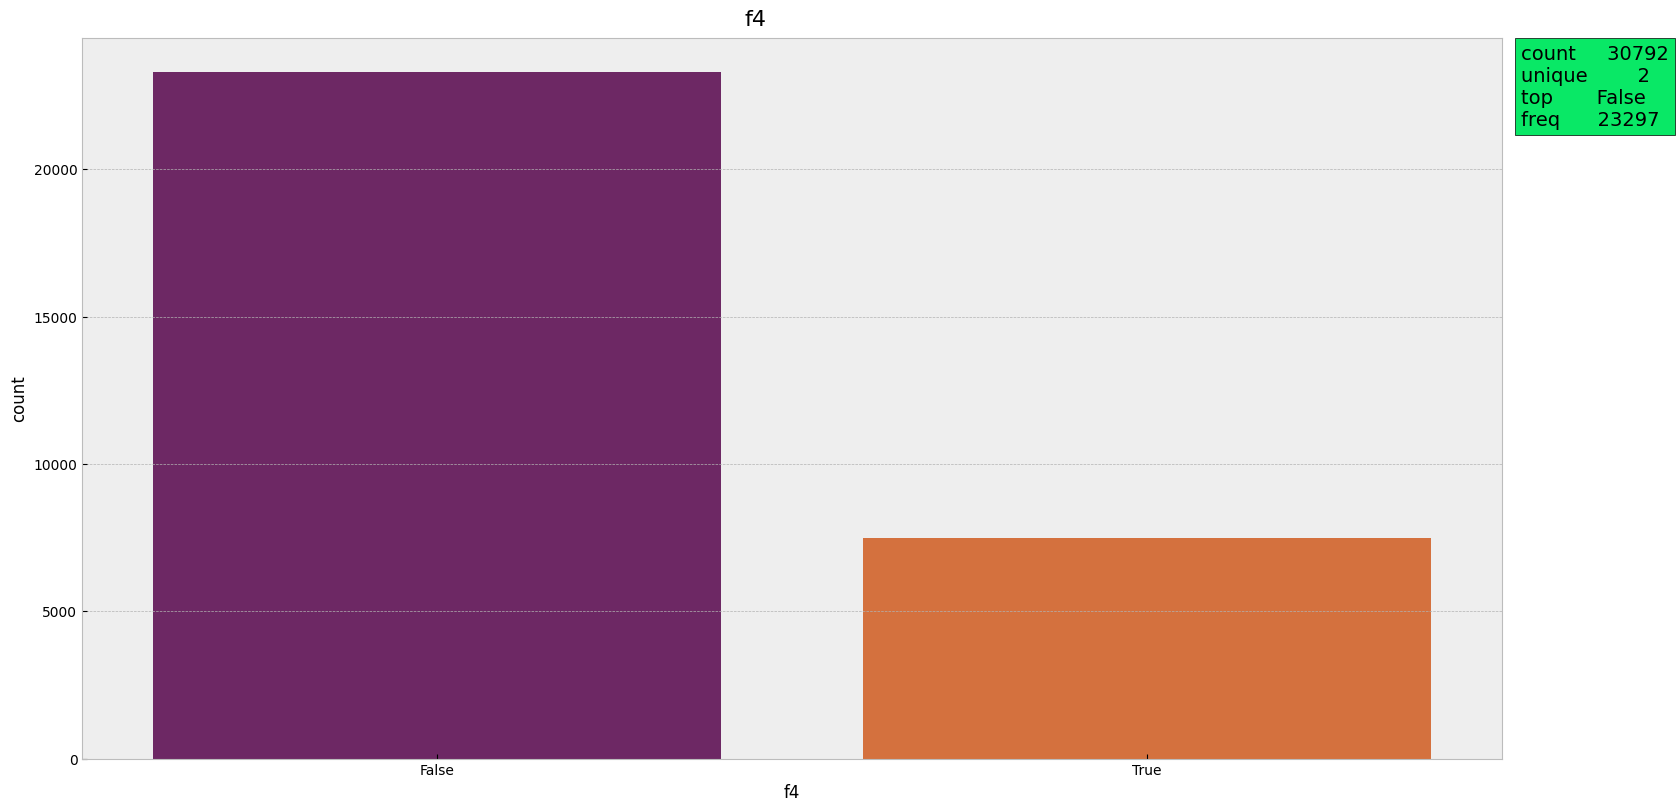

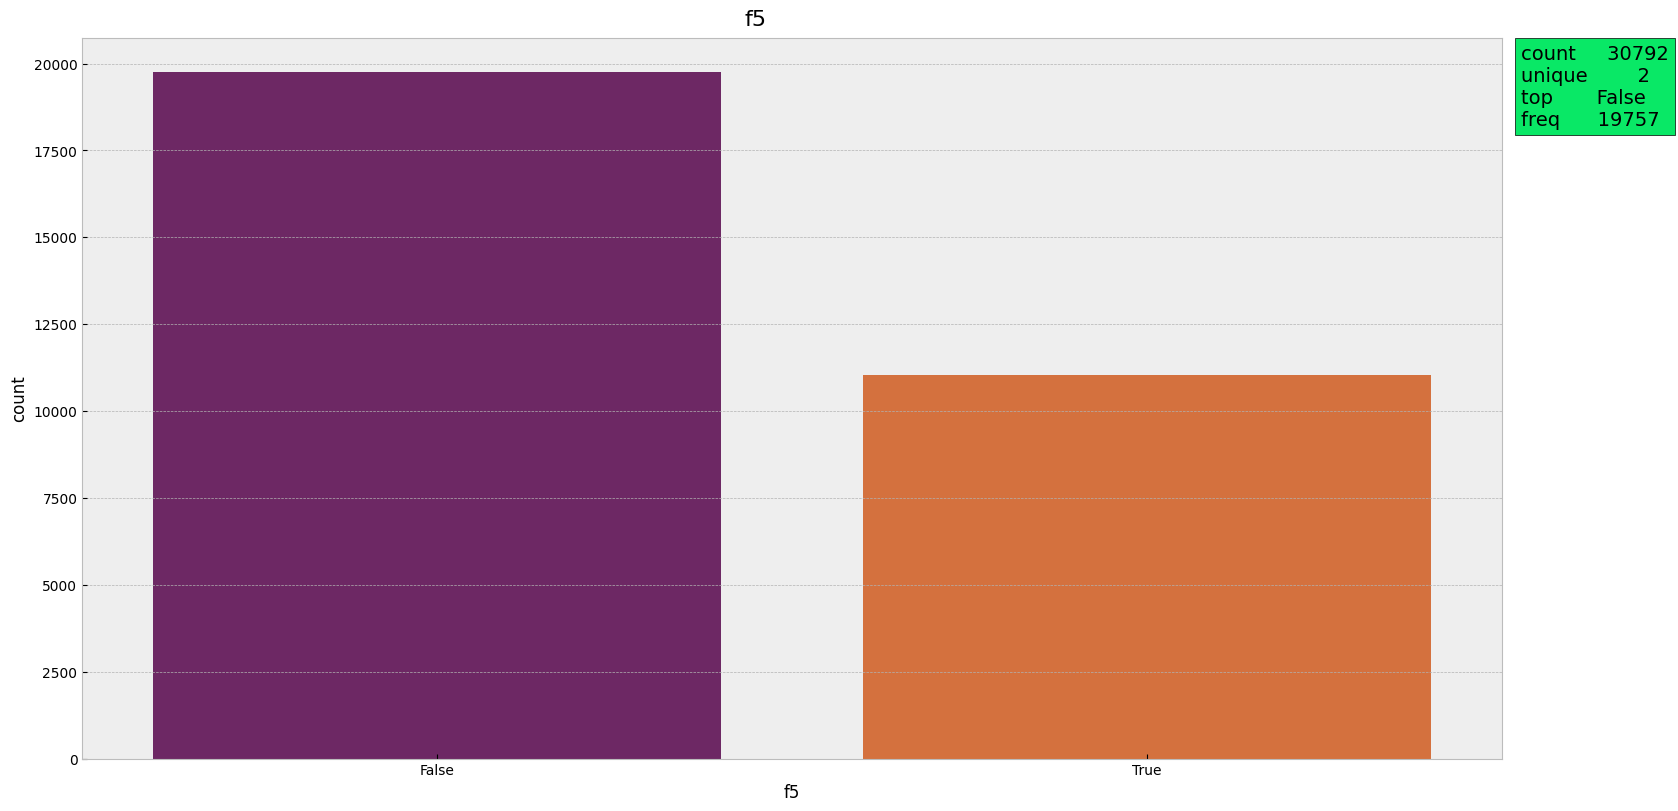

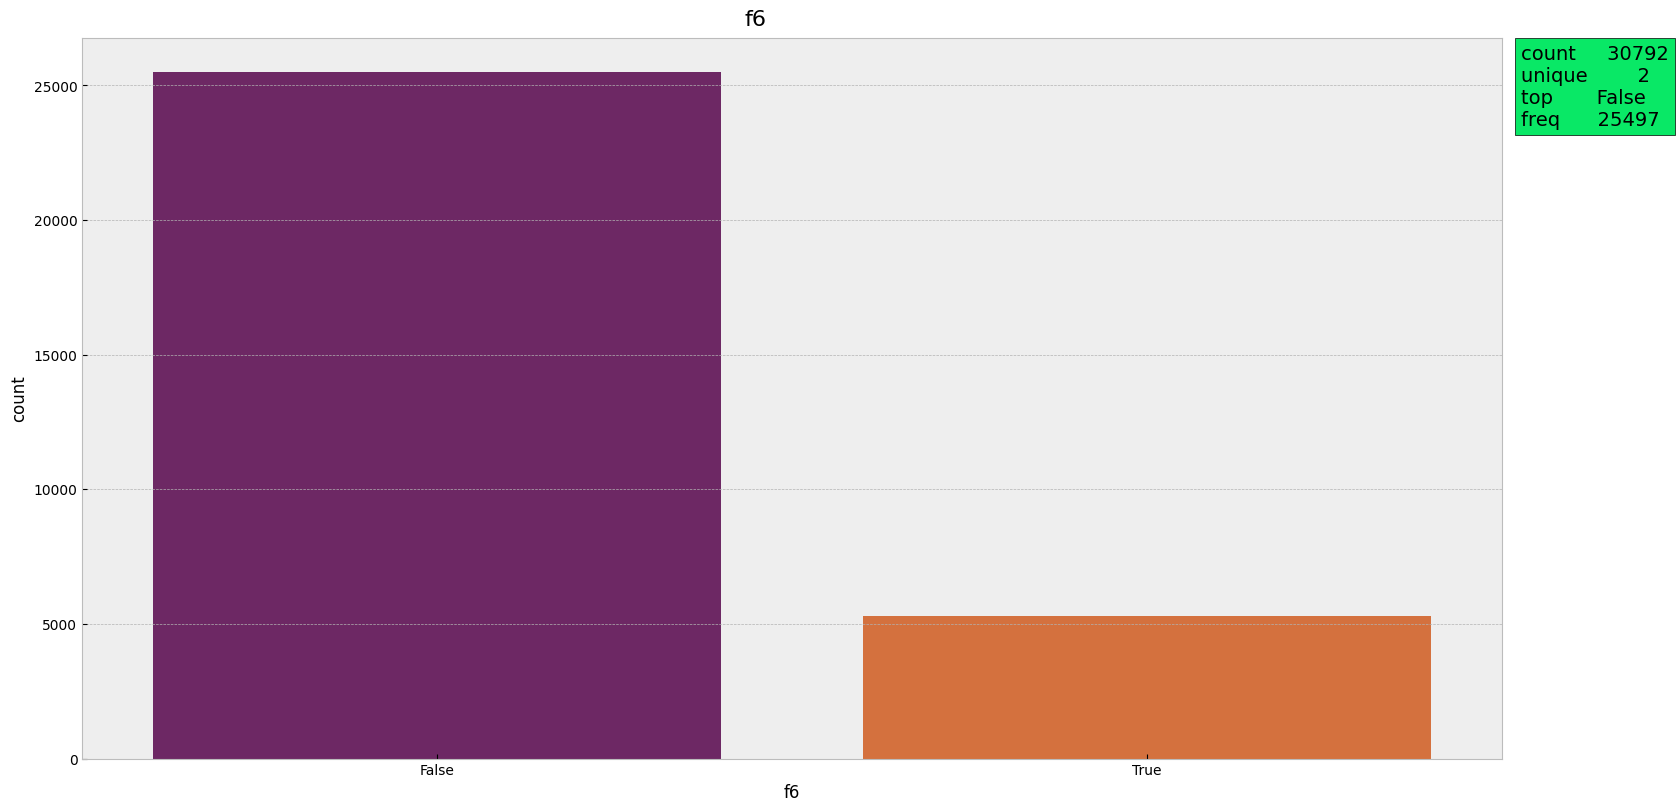

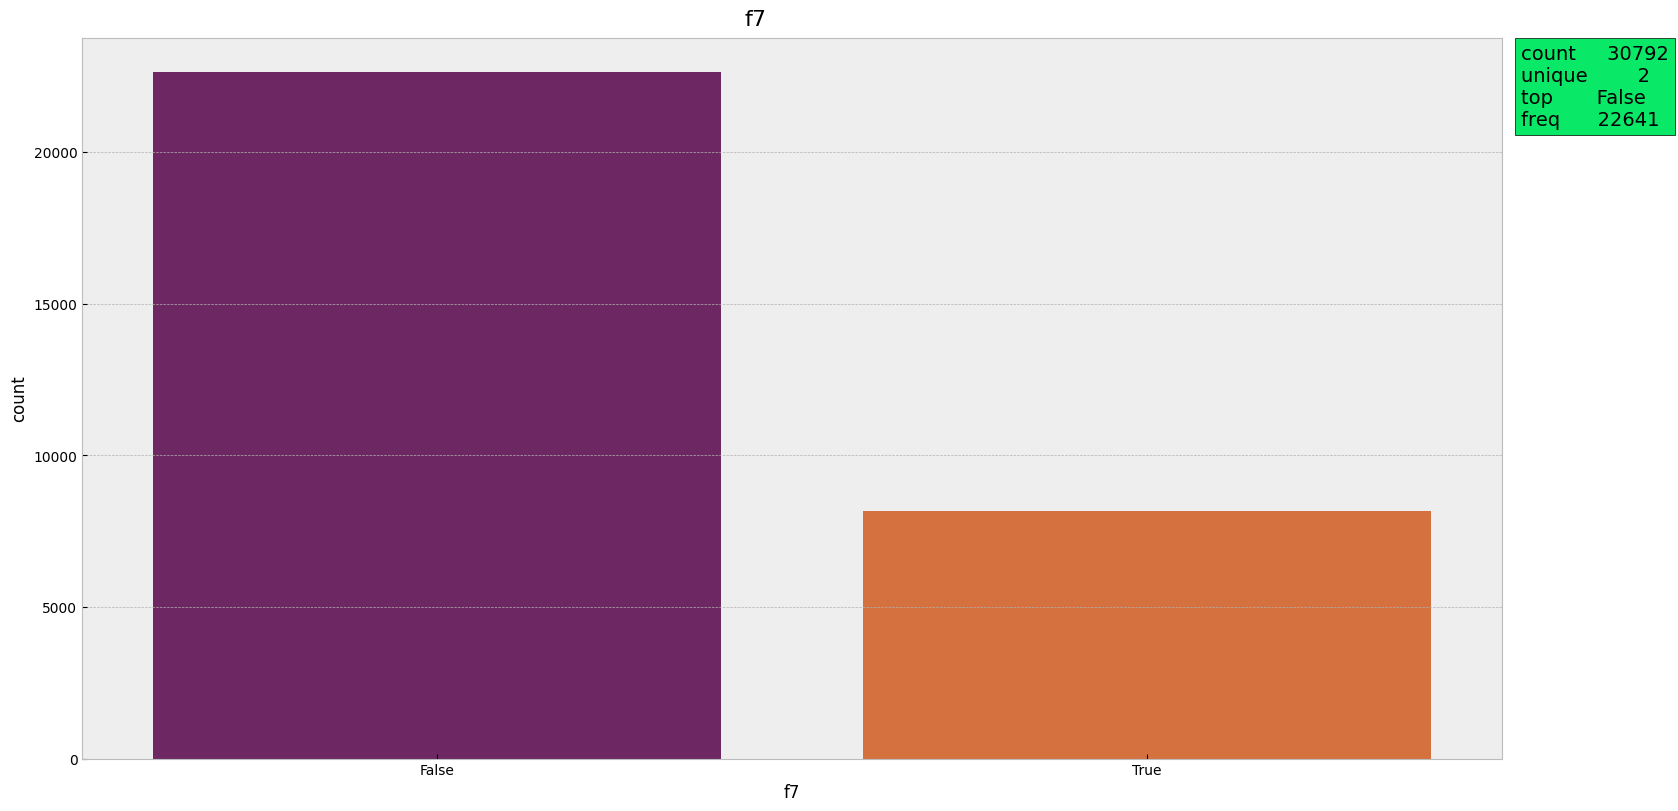

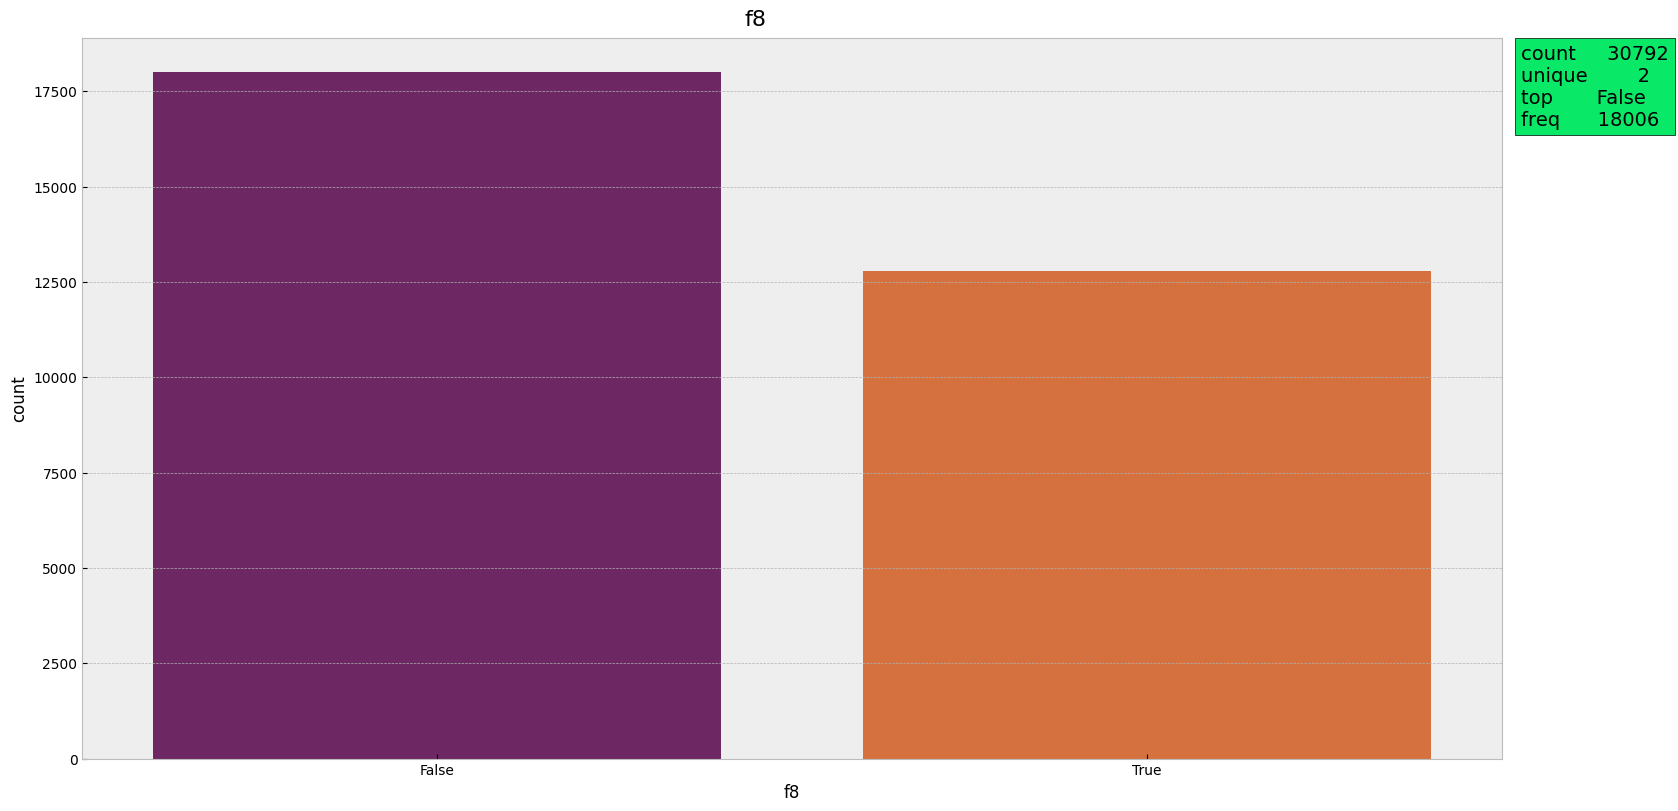

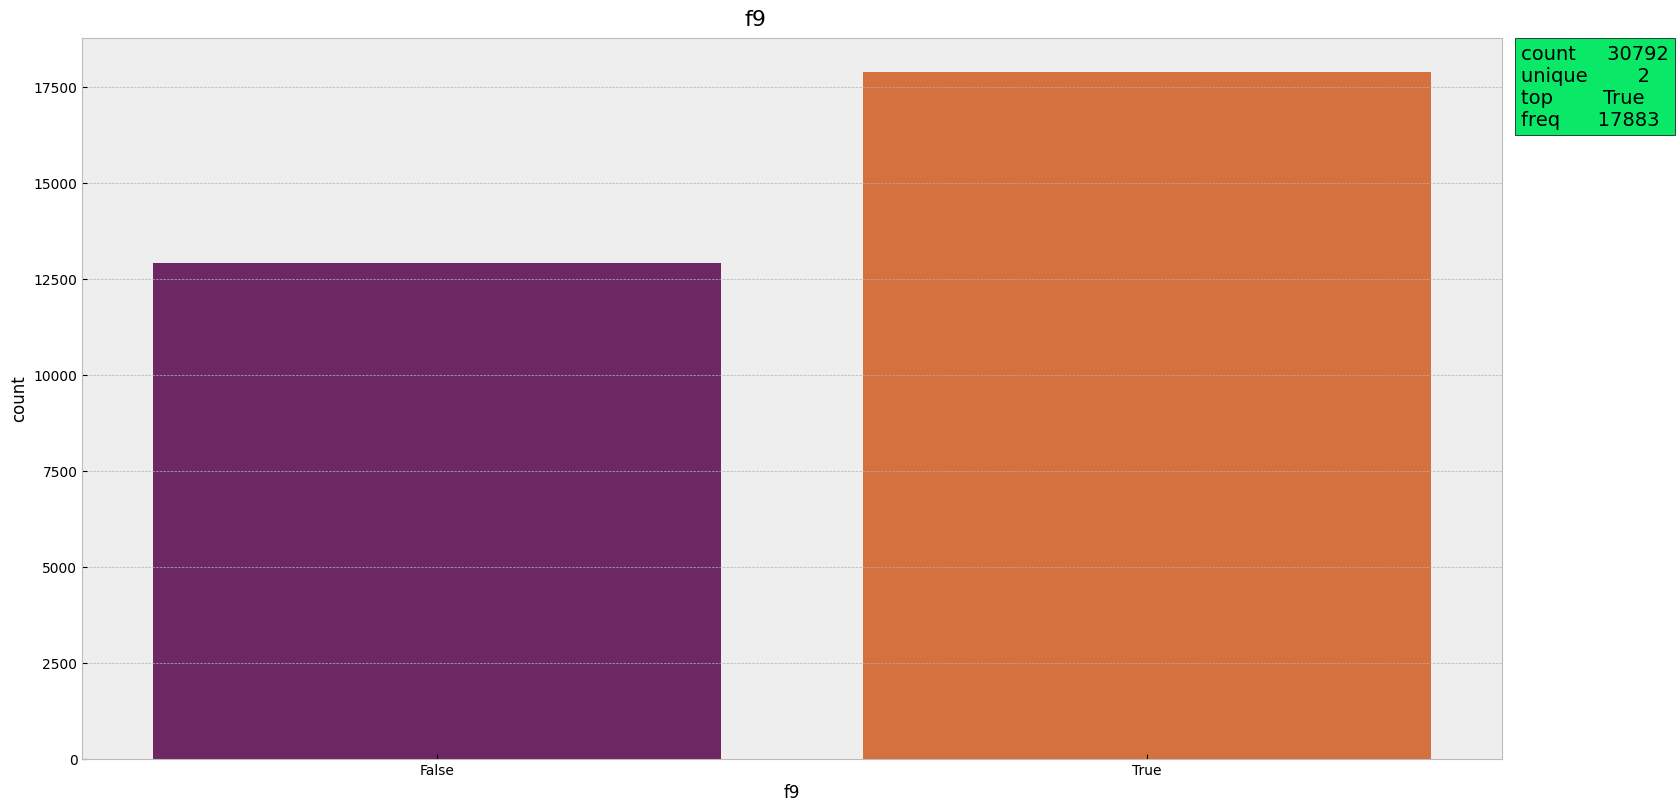

In [33]:
plt.style.use('default')
plt.style.use('bmh')
for indice,variavel in enumerate(variaveis_tipo['categorico']):

    if variavel in ['fabricante','modelo']:
        continue

    fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(15,8))

    fig.suptitle(f'{variavel}',size=16)

    sns.countplot(data=car_train,x=variavel,palette='inferno')
    

    texto = car_train[variavel].describe(include='all').to_string()
    fig.text(1.01,0.85,texto,size=14,bbox=dict(boxstyle='square',ec= (0,0,0), fc= (9/255, 232/255, 102/255)))

    plt.show()

As variáveis fabricante e modelo ficaram de fora dos gráficos pois possuem alta cardinalidade, para elas vamos mostrar os dados em texto

In [34]:
car_train['fabricante'].describe().T

count          30792
unique            55
top       Volkswagen
freq            3378
Name: fabricante, dtype: object

In [35]:
car_train['fabricante'].value_counts().sort_values(ascending=False)[:10]

Volkswagen       3378
Opel             2225
BMW              2078
Ford             2047
Renault          1991
Audi             1955
Mercedes-Benz    1792
Peugeot          1514
Citroen          1232
Nissan           1086
Name: fabricante, dtype: int64

In [36]:
car_train['modelo'].describe().T

count      30792
unique      1081
top       Passat
freq        1104
Name: modelo, dtype: object

In [37]:
car_train['modelo'].value_counts().sort_values(ascending=False)[:10]

Passat    1104
Astra      589
Golf       575
A6         551
Mondeo     514
Vectra     457
Laguna     430
A4         396
406        328
Omega      318
Name: modelo, dtype: int64

## 4.2 Análise bivariada

Neste subtópico analisaremos brevemente como o preço de cada automóvel se relaciona com as demais variáveis

/tmp/ipykernel_8849/1759801471.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_train.corr(),annot=True, fmt= ".2f", linewidths = 1.5,linecolor='black', cmap='inferno');


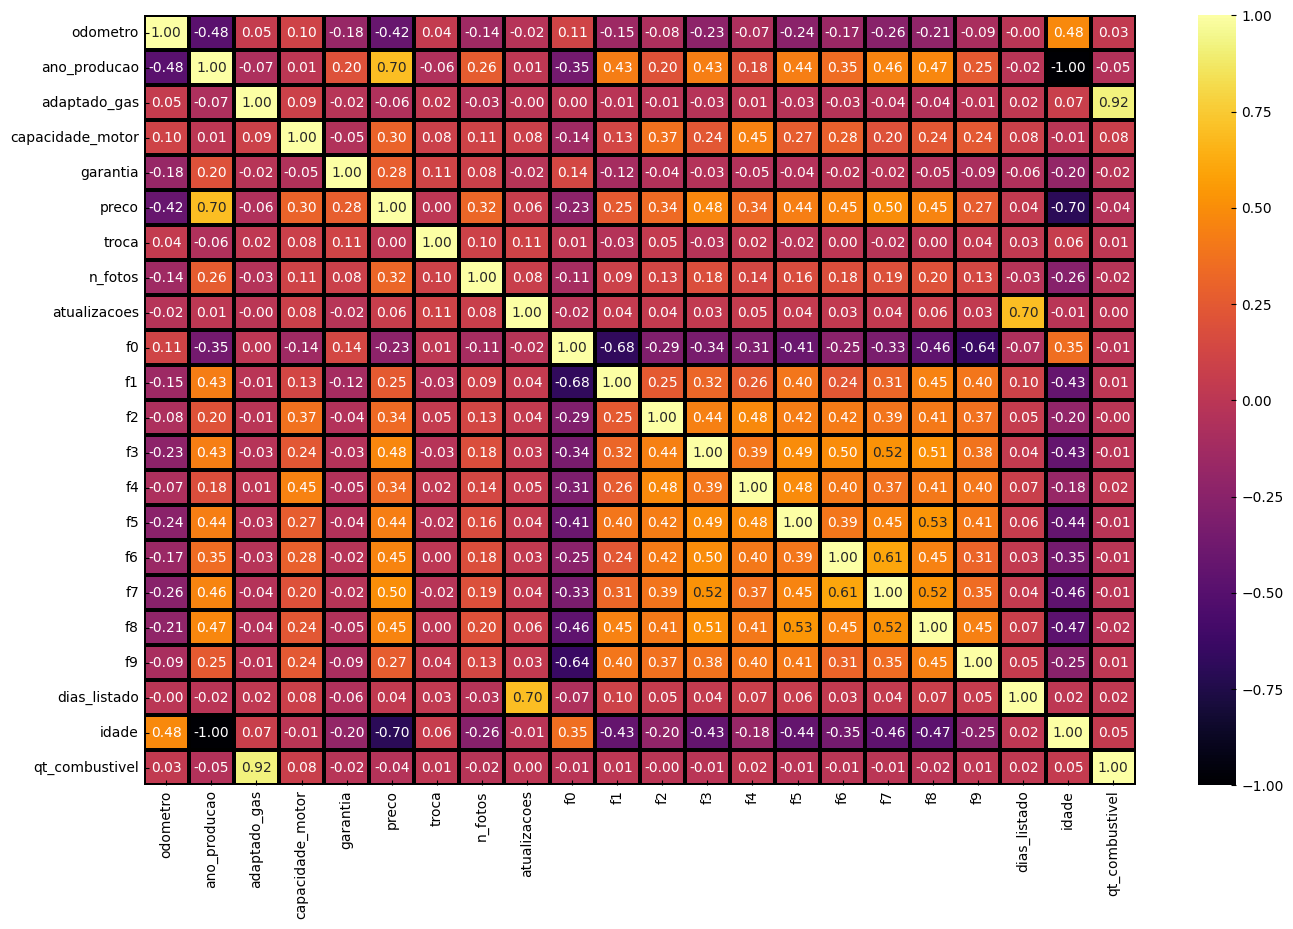

In [38]:
plt.figure(figsize=(16,10));
sns.heatmap(car_train.corr(),annot=True, fmt= ".2f", linewidths = 1.5,linecolor='black', cmap='inferno');

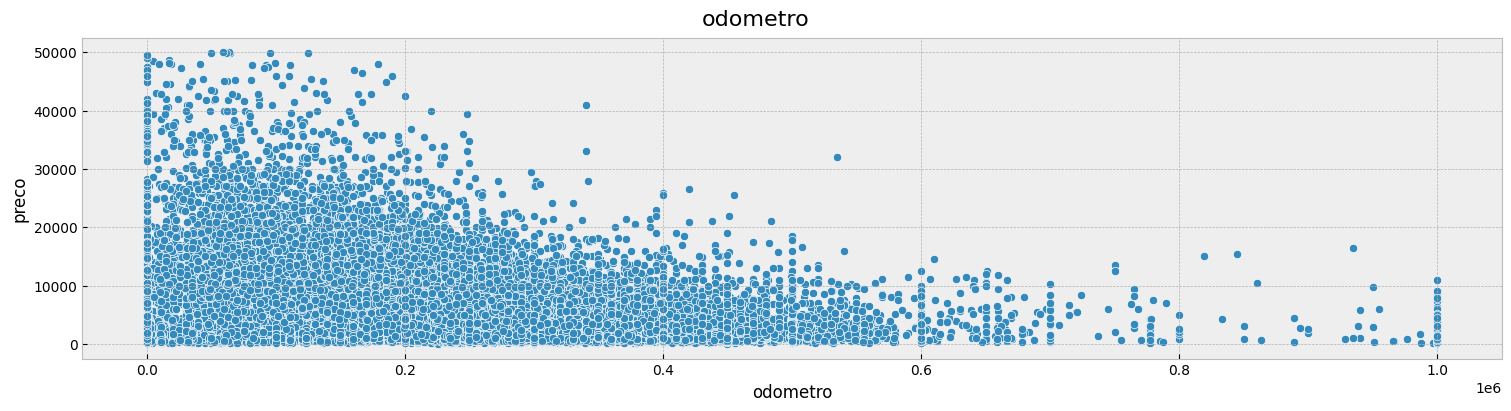

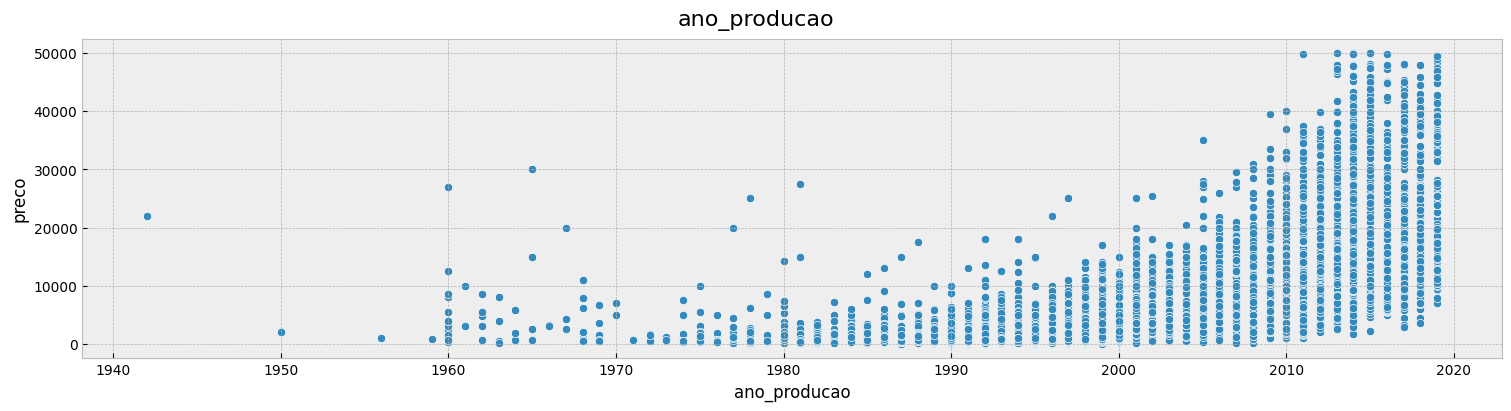

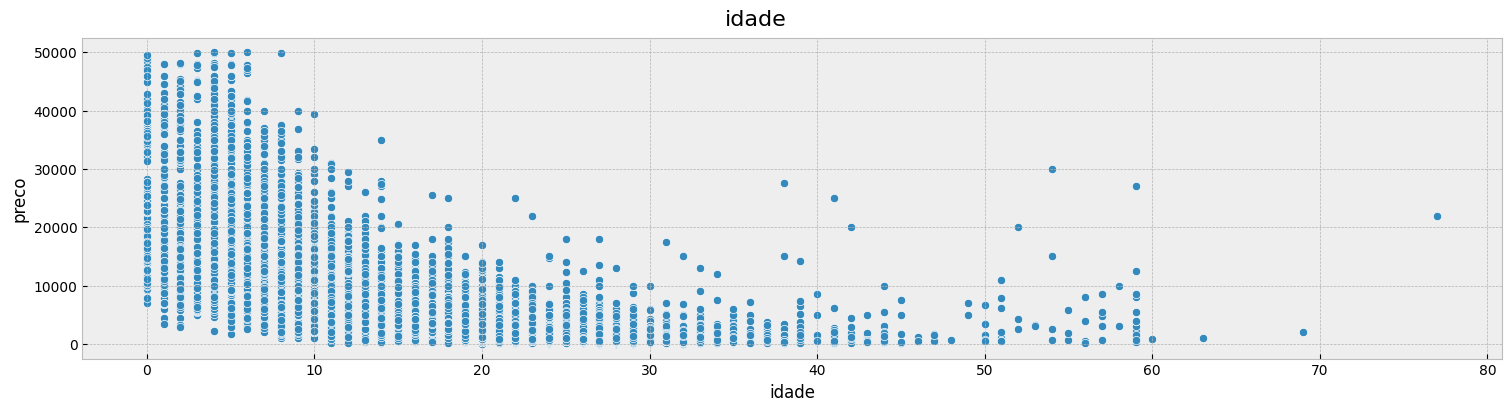

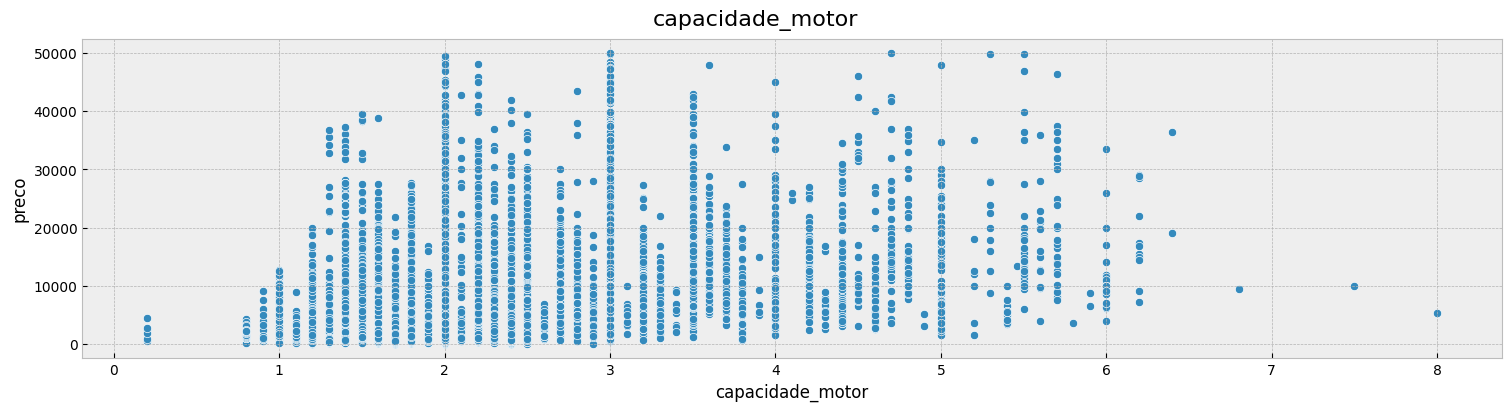

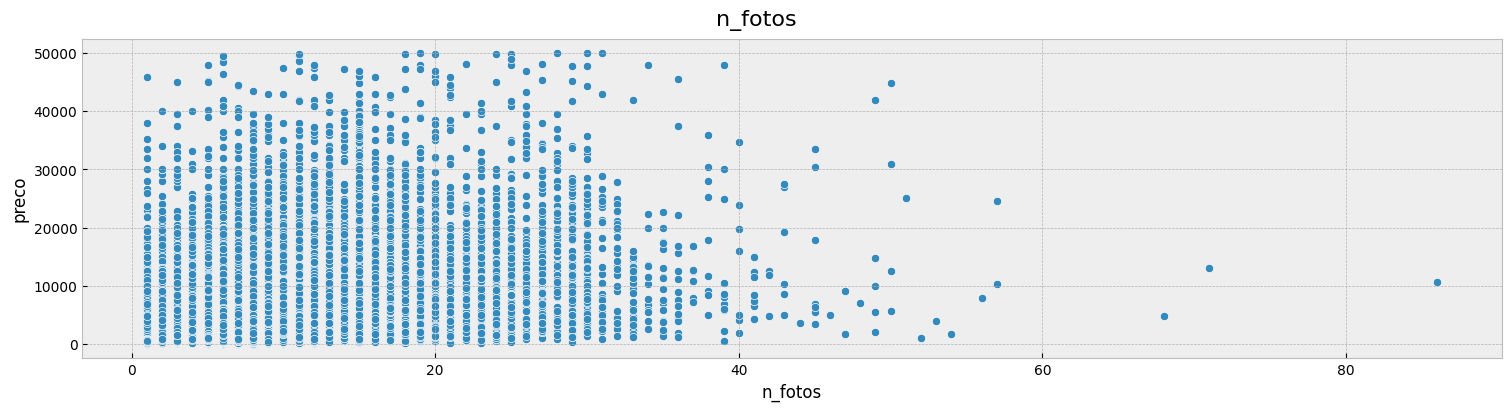

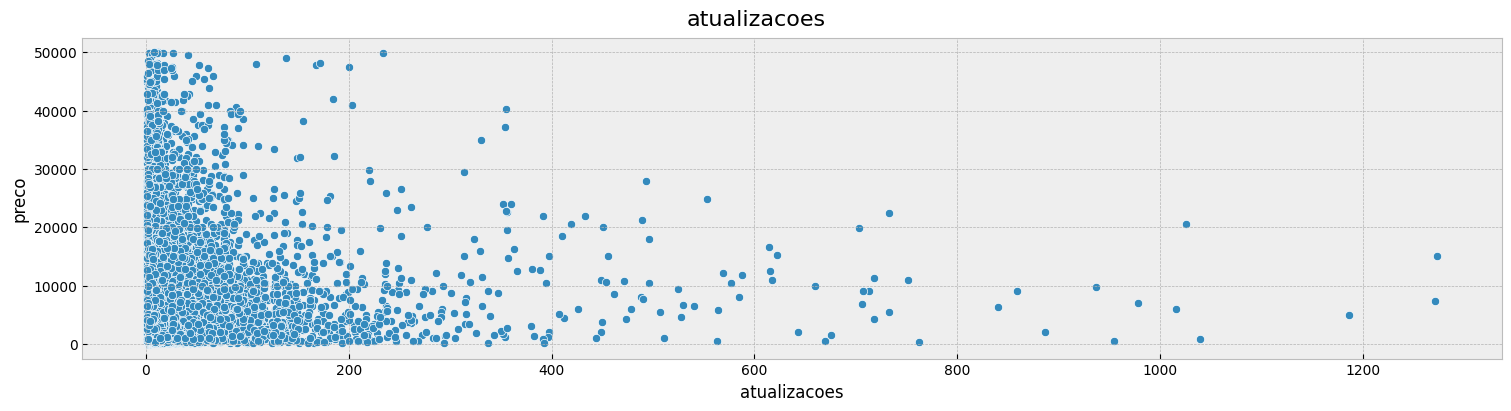

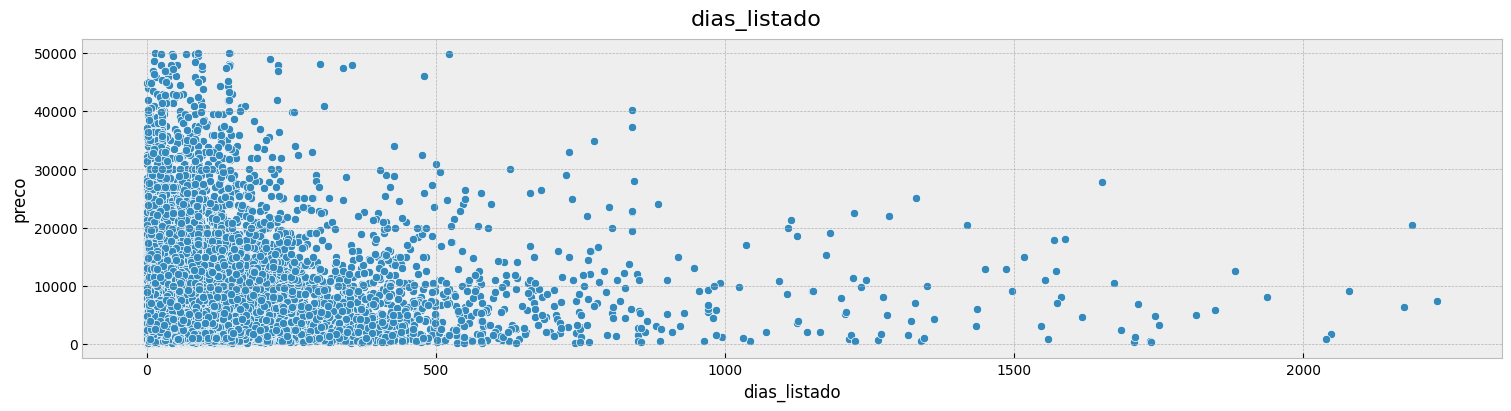

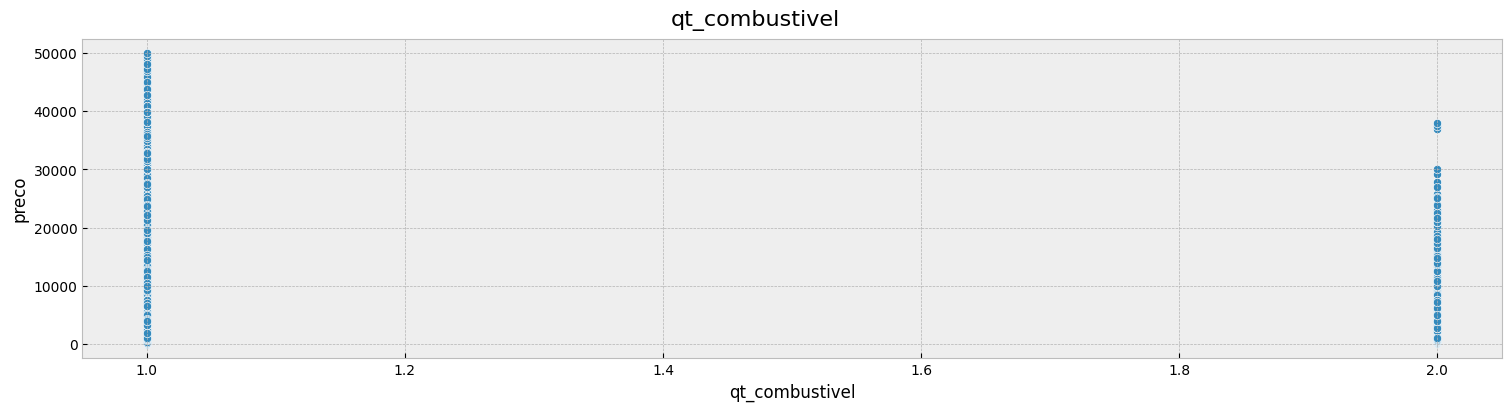

In [39]:
plt.style.use('default')
plt.style.use('bmh')
for indice,variavel in enumerate(variaveis_tipo['numerico']):

    if variavel == 'preco':
        continue
    fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(15,4))

    fig.suptitle(f'{variavel}',size=16)

    sns.scatterplot(data=car_train,x=variavel,y='preco')



    #ax[0].set_ylabel('#',size=12)
 

    plt.show()

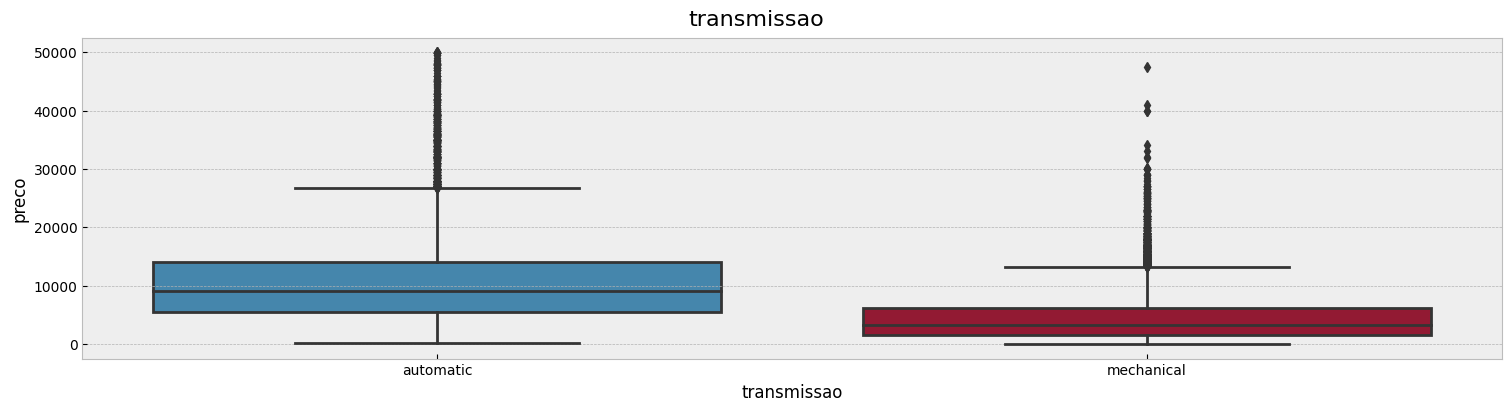

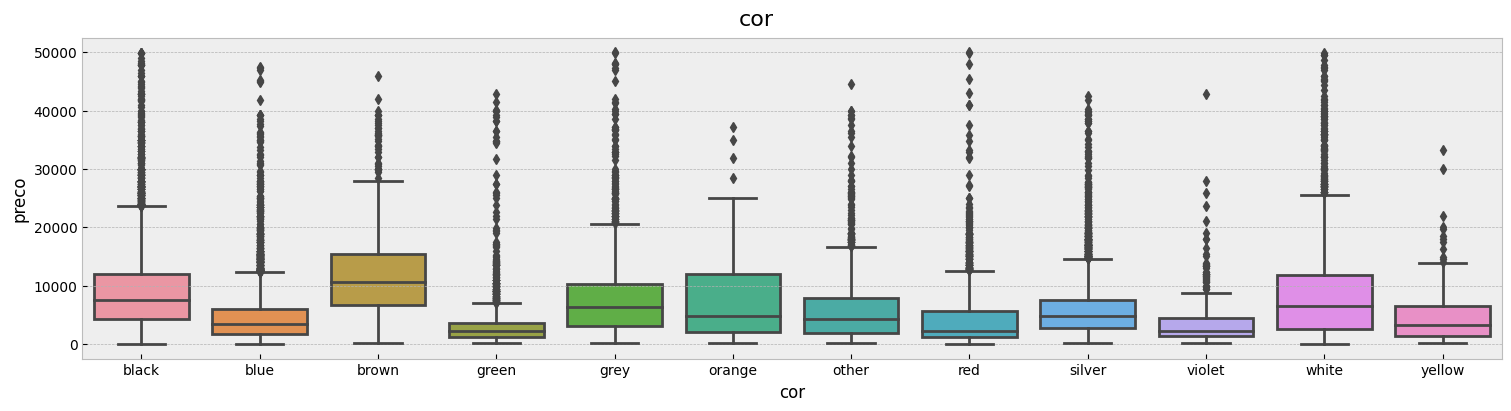

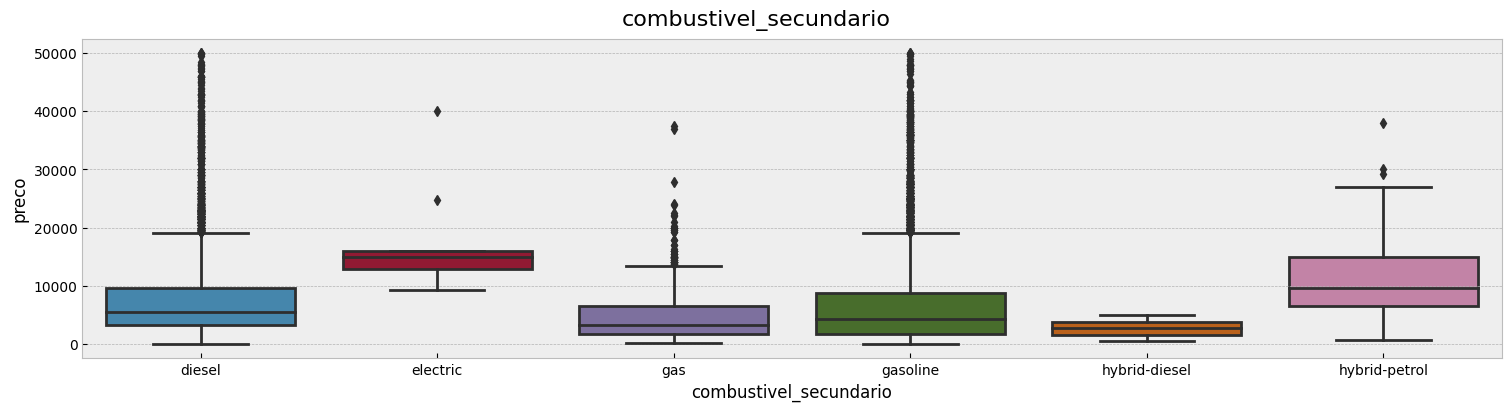

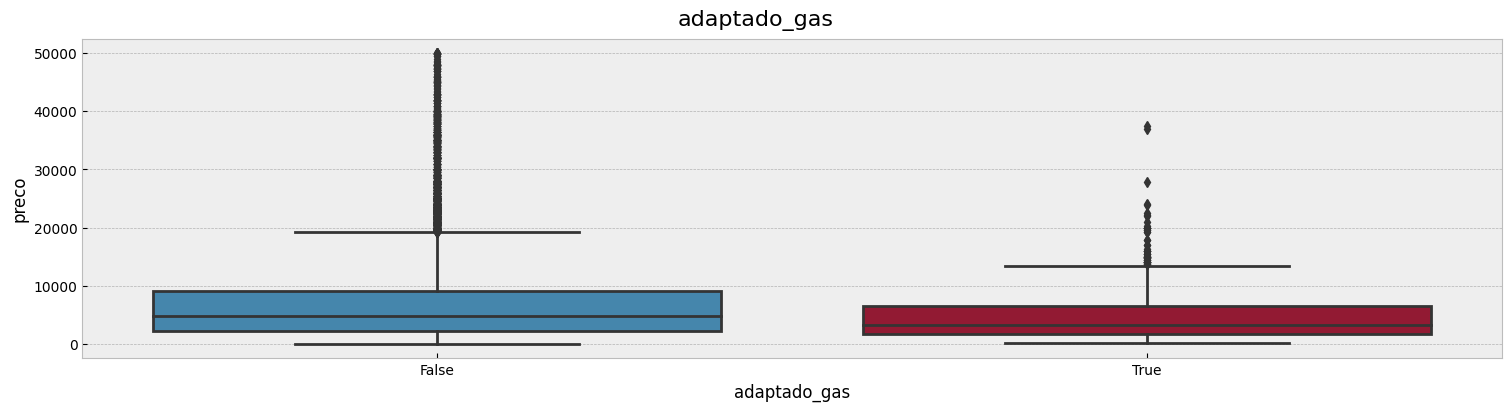

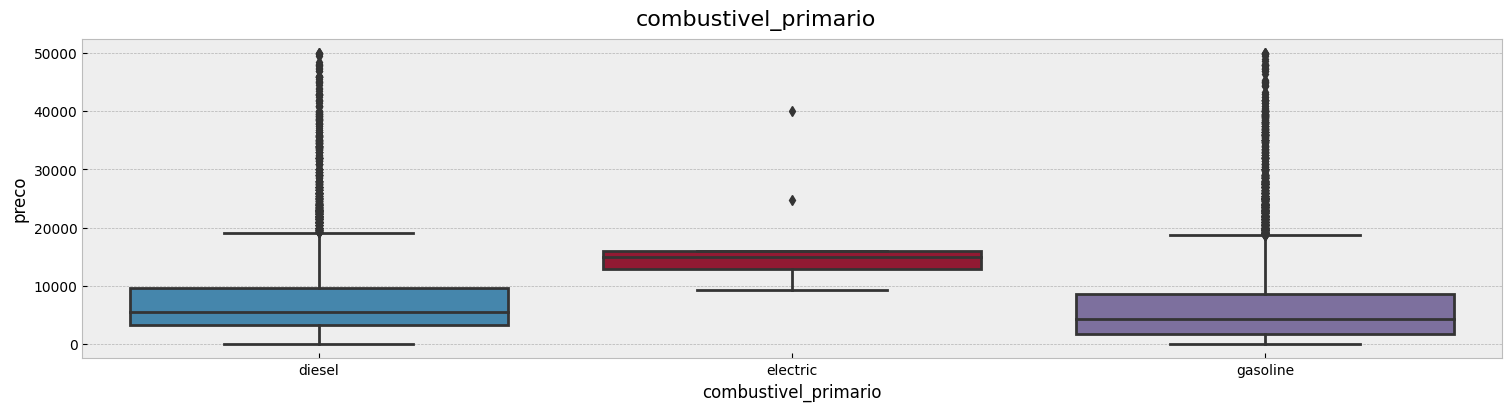

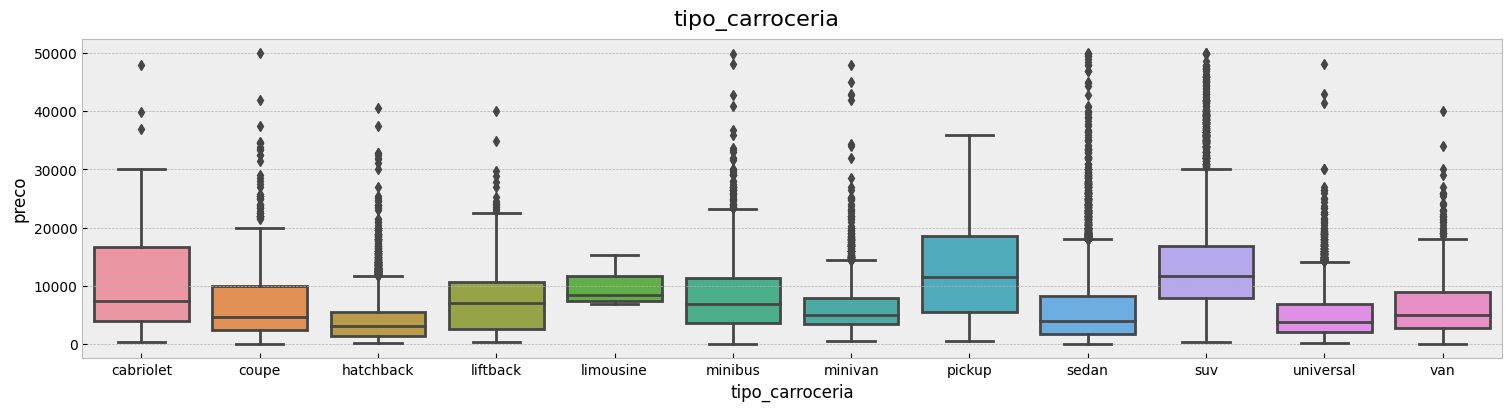

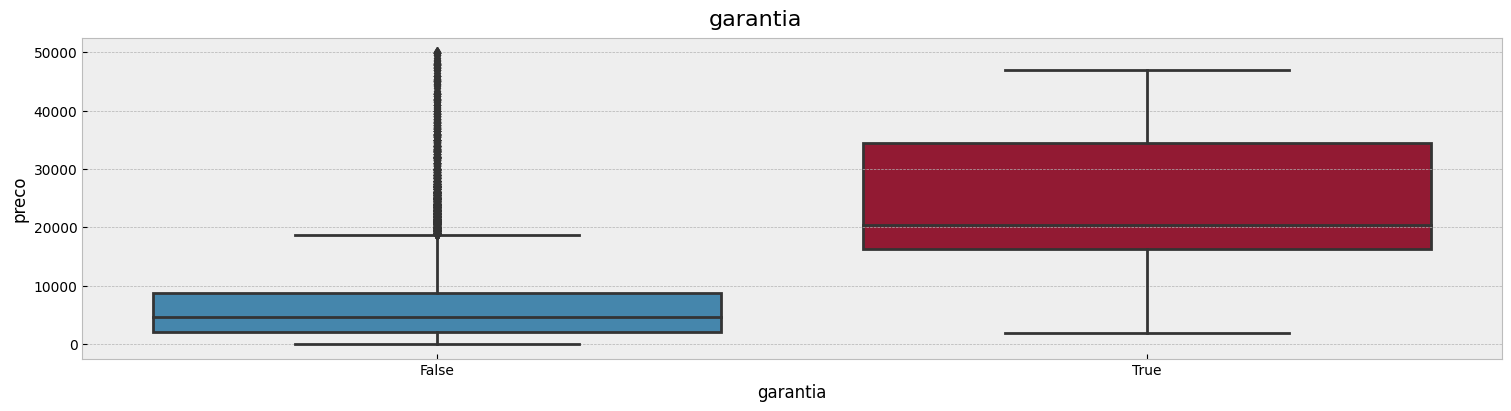

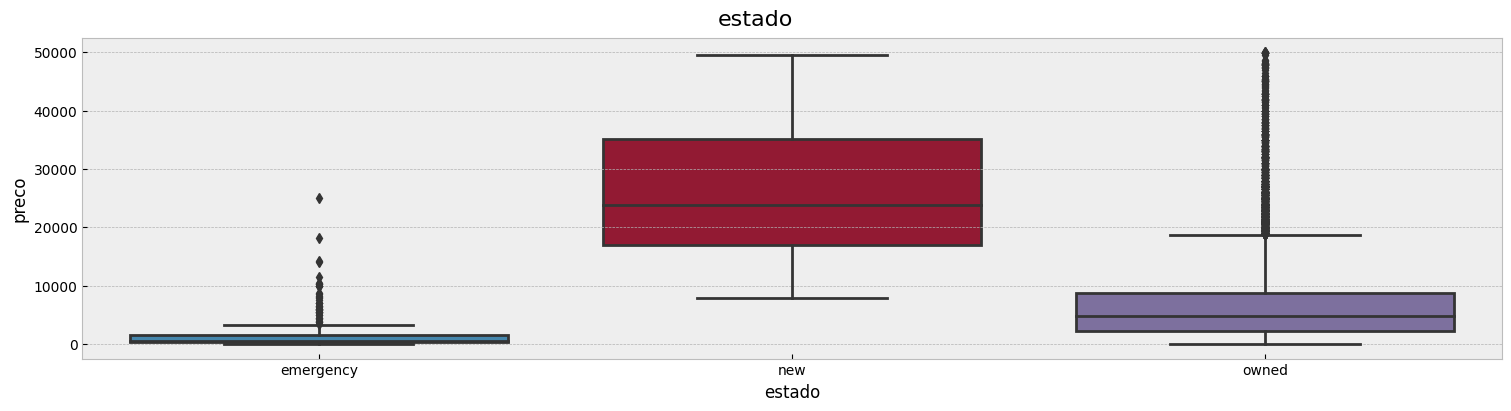

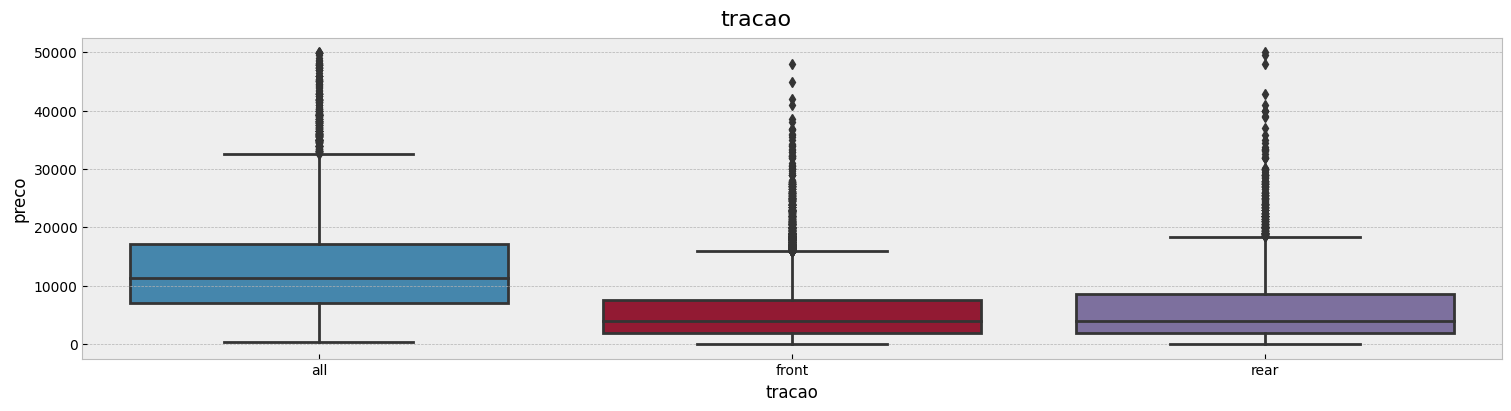

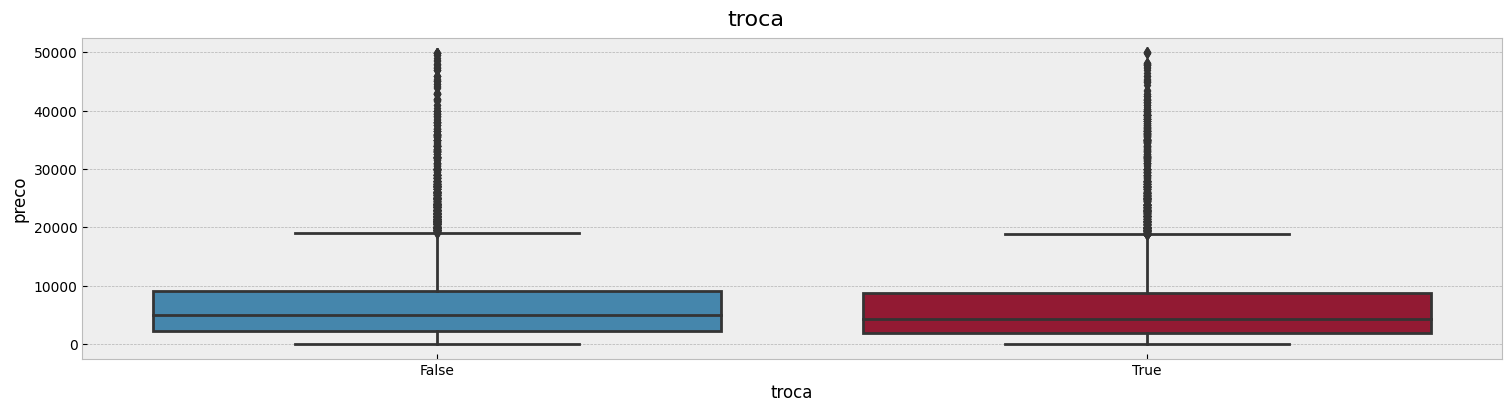

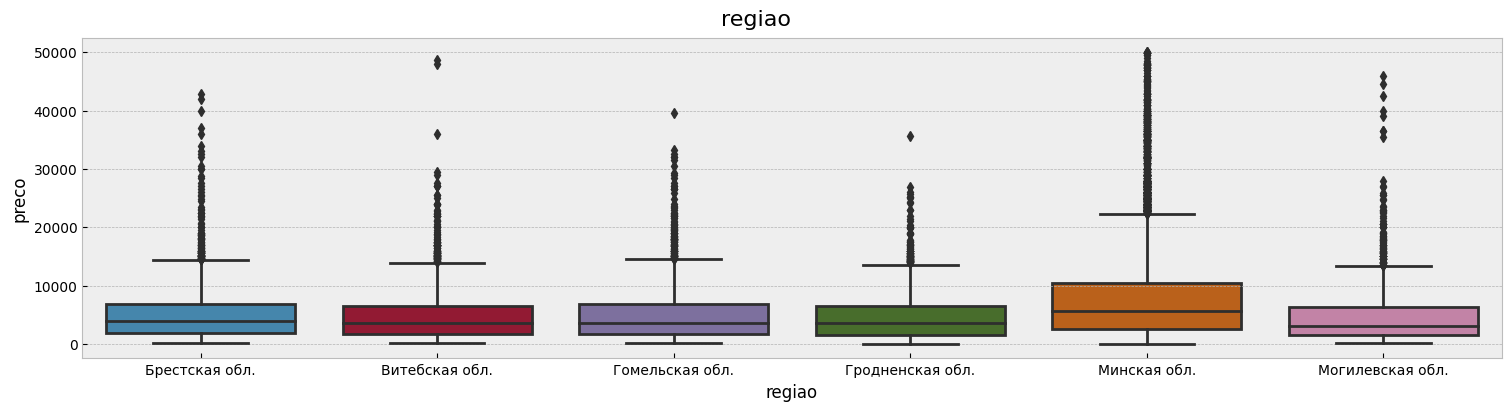

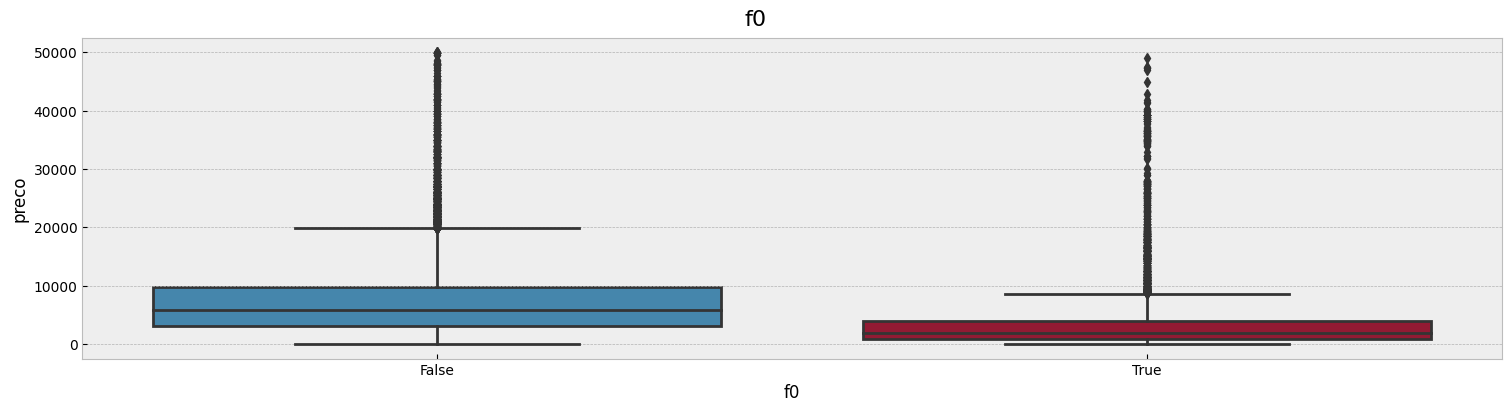

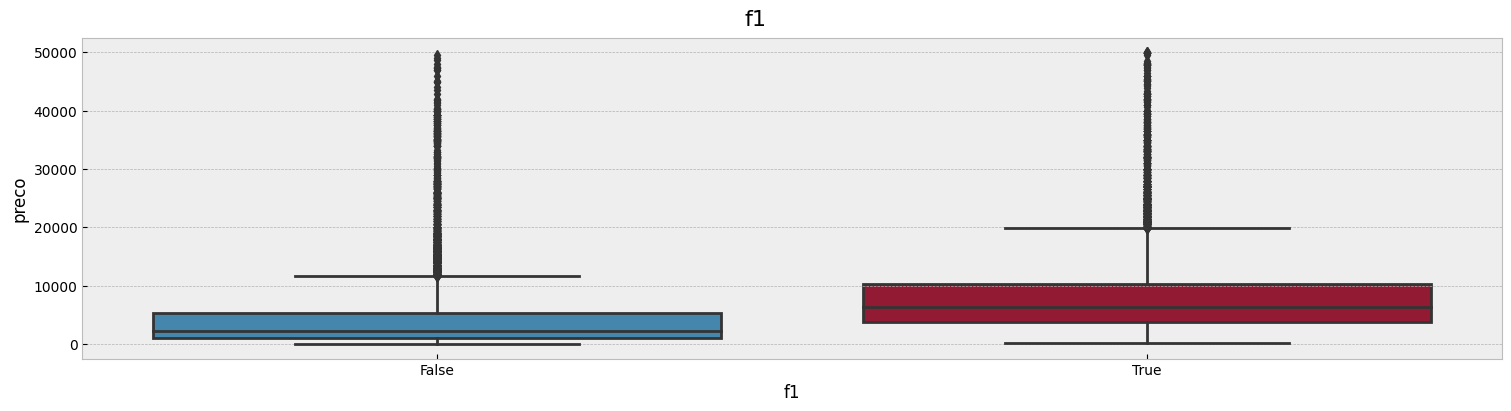

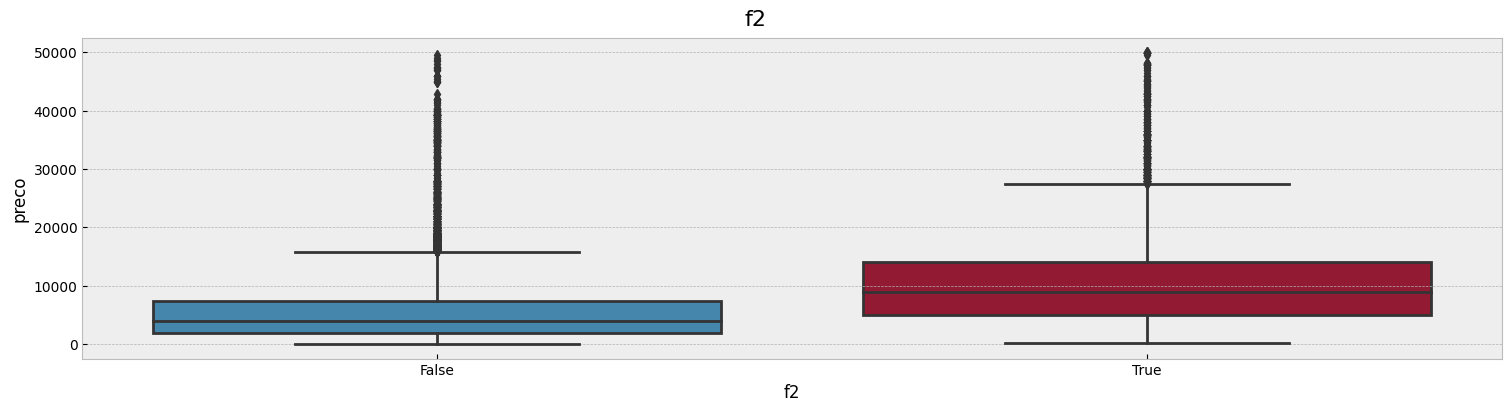

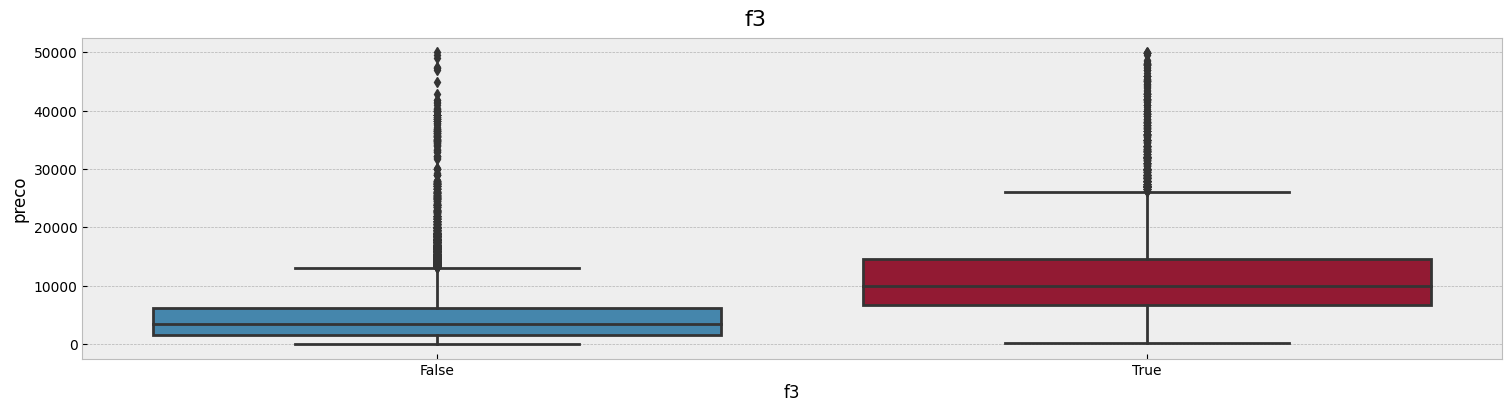

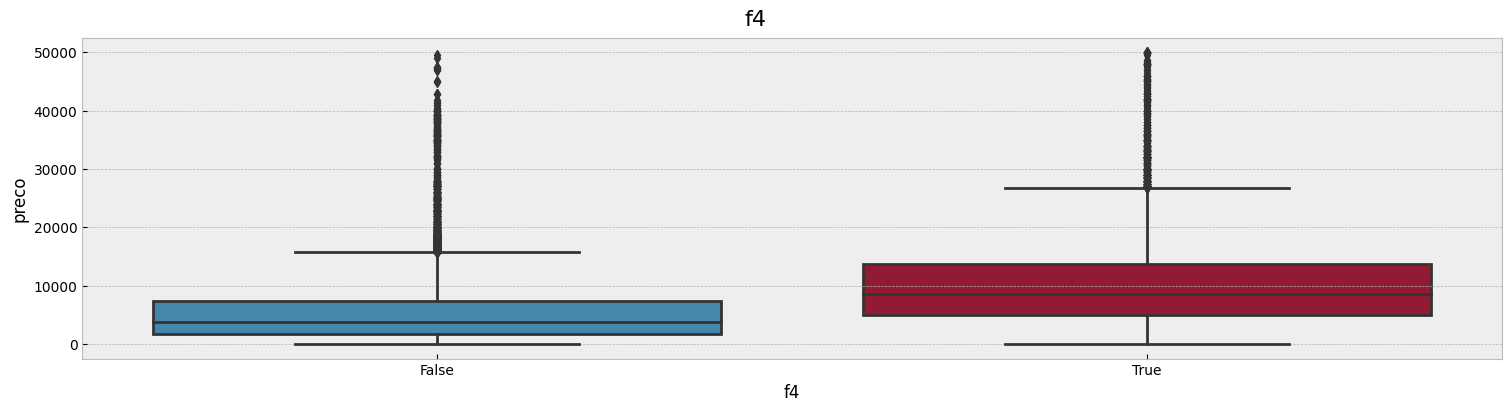

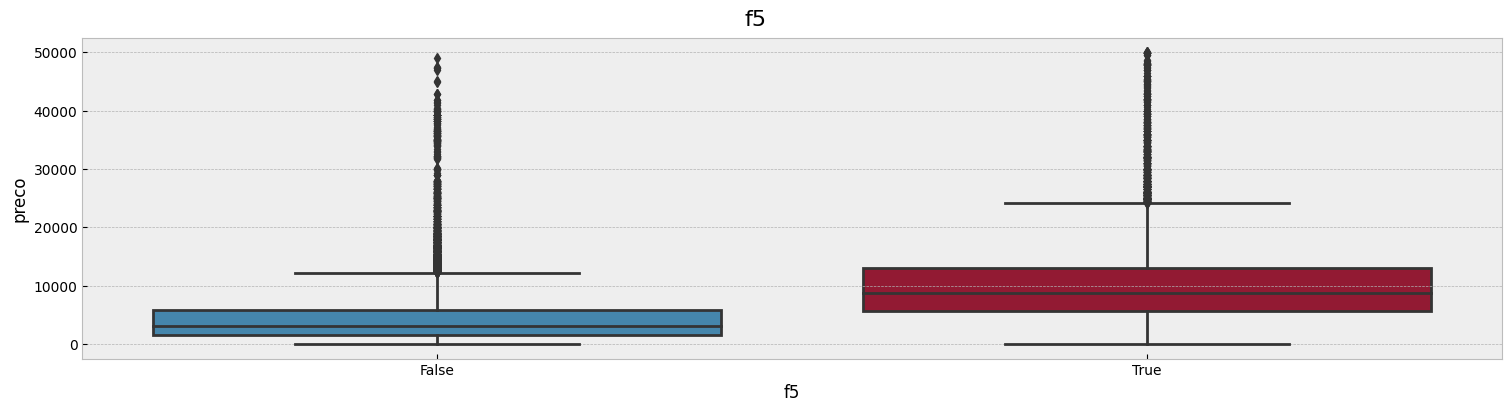

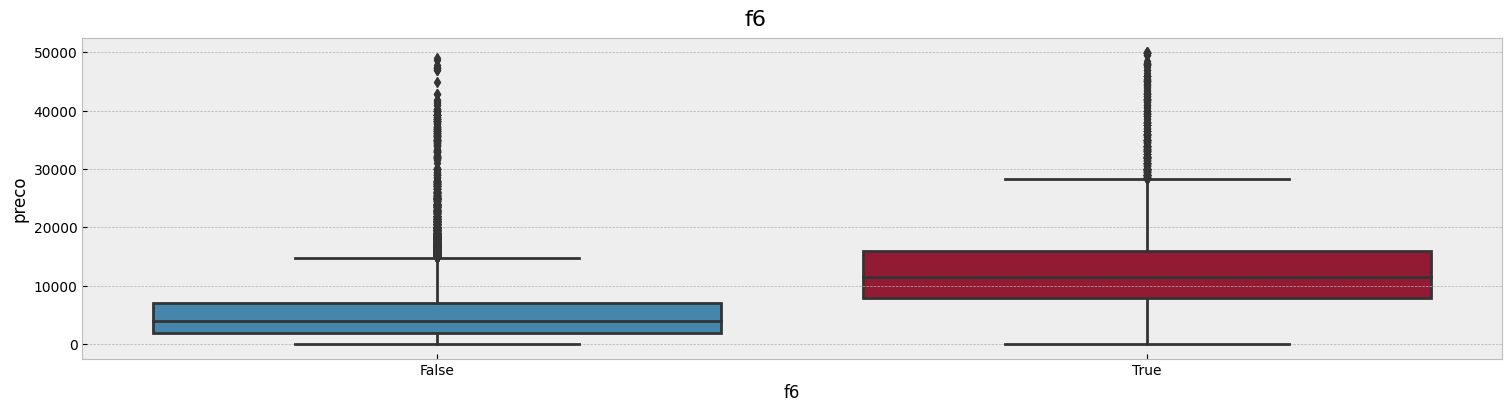

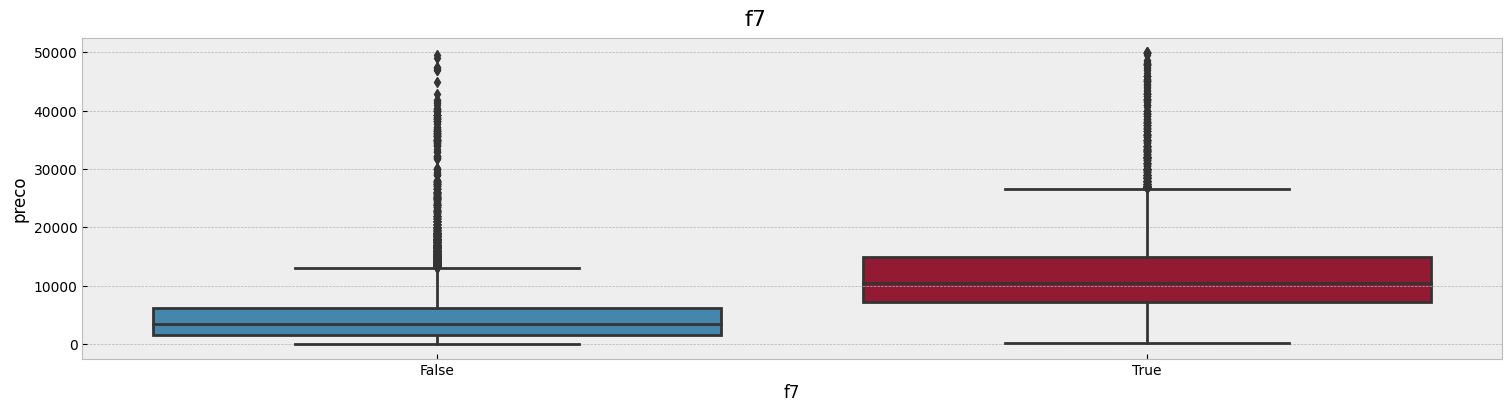

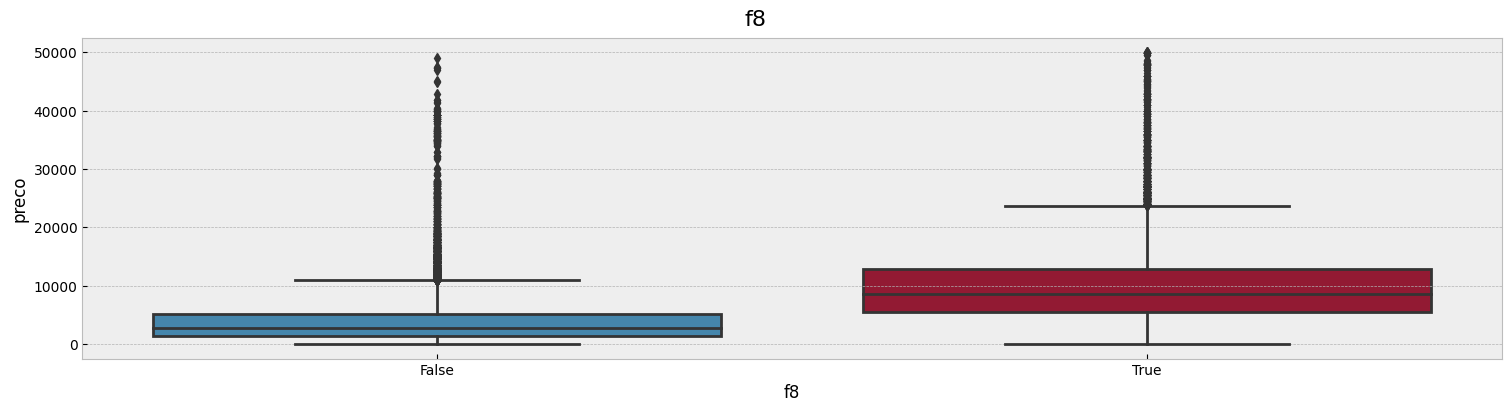

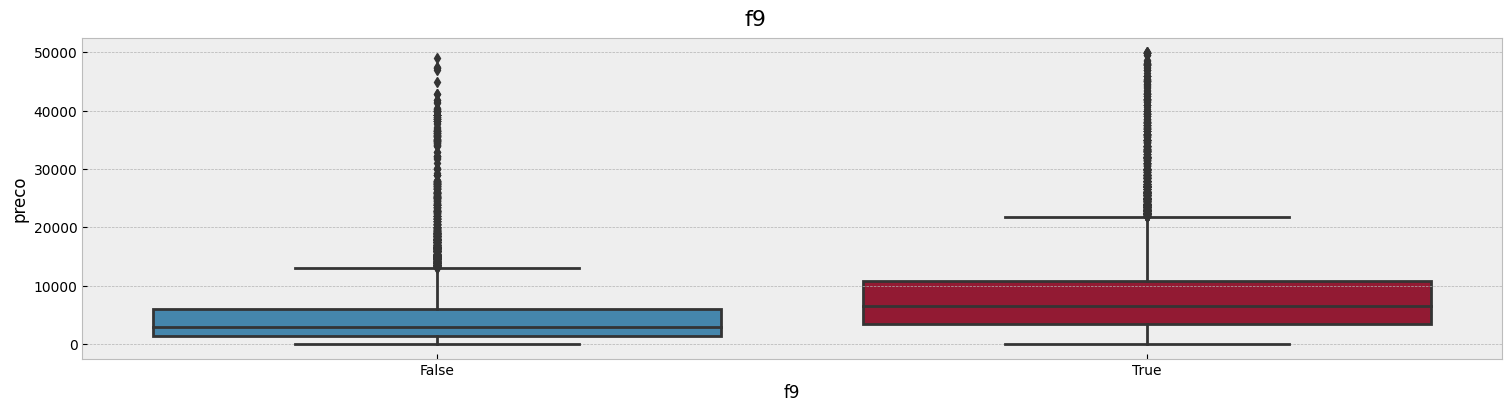

In [40]:
plt.style.use('default')
plt.style.use('bmh')
for indice,variavel in enumerate(variaveis_tipo['categorico']):

    if variavel in ['fabricante','modelo']:
        continue

    fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(15,4))

    fig.suptitle(f'{variavel}',size=16)

    sns.boxplot(data=car_train,x=variavel,y='preco')
    

    plt.show()

Não vamos discorrer acerca de todos os resultados, entretanto, é possível observar que a presença de determinadas características de fato tem alguma relação com o preço do veículo, vamos citar alguns casos a seguir:

* O veículo que tem uma transmissão automática na mediana é mais caro que um veículo com a transmissão manual

* Um veículo novo obviamente tem o preço mais elevado que o preço de um veículo usado ou com alguma avaria

* Automóveis no Oblast de Minsk são mais caros.

* Por algum motivo a presença da feature F0 está associada a carros com preços menores e as demais features com carros mais caros. Logo, a presença da feature f0 de alguma forma desvaloriza os automóveis e as demais valorizam. É claro que teríamos que ter mais informação para afirmar isso mas a nossa primeira hipótese sugere isso.

* E das numéricas é clara a dependência do preço com relação ao Odômetro e a idade do veículo.

Podemos concluir que grande parte das features de algum modo está associada ao preço dos veículos, isto é, a presença de um atributo pode estar associada a um preço mais elevado. Portanto, nosso modelo pode utilizar essas features para estimar de maneira mais acurada o preço de um veículo. 

## 4.3 Análisando inconsistências

Nas análises acima nós identificamos algumas questões duvidosas, este subtópico servirá para analisarmos mais afundo algumas dessas questões.

In [41]:
def determinar_outlier(valores: pd.Series ) -> list :
    '''Recebe uma série e retorna uma lista com os indices dos registros outliers'''


    q3: float = valores.quantile(0.75)
    q1: float = valores.quantile(0.25)
    
    iqr: float = q3-q1
    
    lim_sup: float = q3 + (1.5*iqr)
    
    lim_inf: float = q1 - (1.5*iqr)
    
    idx: list = []
    
    for ind, value in enumerate(valores):
        if value < lim_inf or value > lim_sup:
            idx.append(ind)
            
    return idx


**Questão 1:  Analisar quilometragens iguais a zero**

Dos veículos com quilometragem zero alguns são de fato novos e outros já são considerados seminovos com apenas 2 anos de idade. Os preços variam de algo em torno de 8 mil até algo em torno de 50mil dólares.

In [42]:
car_train.query('odometro == 0 and idade > 0 ')

fabricante      modelo transmissao     cor  odometro  ano_producao combustivel_secundario  adaptado_gas combustivel_primario  capacidade_motor tipo_carroceria  garantia estado tracao     preco  troca            regiao  n_fotos  atualizacoes     f0     f1     f2     f3     f4     f5     f6     f7     f8     f9  dias_listado  idade  qt_combustivel
19398        Jeep    Renegade   automatic    grey         0          2017               gasoline         False             gasoline               2.4             suv     False    new    all  40266.00   True      Минская обл.        5           355  False  False  False   True   True   True  False  False   True   True           839      2               1
15864  Volkswagen      Tiguan  mechanical   black         0          2018               gasoline         False             gasoline               1.4             suv      True    new  front  19991.00   True      Минская обл.       10             1  False  False   True  False  False   True  False   True   True   True             1      1               1
22875      Toyota     Corolla   automatic   white         0          2017               gasoline         False             gasoline               1.8           sedan     False    new  front  15000.00   True      Минская обл.       20             3   True  False  False  False  False  False  False  False  False  False            40      2               1
7628         Mini  Countryman   automatic    blue         0          2018               gasoline         False             gasoline               1.5             suv     False    new    all  38300.46   True      Минская обл.       15           155  False   True  False   True  False   True  False   True   True   True           185      1               1
19396        Jeep    Renegade   automatic  orange         0          2017               gasoline         False             gasoline               1.4             suv     False    new    all  34900.00  False      Минская обл.        9           330  False   True  False   True   True  False   True  False   True   True           773      2               1
13114     Renault     Sandero  mechanical  silver         0          2018               gasoline         False             gasoline               1.6             suv     False    new  front   9500.00  False      Минская обл.        9             1   True  False  False  False  False  False  False  False  False  False             7      1               1
25397     Hyundai    Santa Fe   automatic   black         0          2018                 diesel         False               diesel               2.2             suv     False    new    all  45954.66  False      Минская обл.        1             1  False   True  False   True   True   True   True   True   True   True            16      1               1
32570       Skoda      Kodiaq   automatic    grey         0          2018               gasoline         False             gasoline               2.0             suv     False    new    all  34000.00  False      Минская обл.        3           111  False   True   True   True   True   True   True   True   True   True           427      1               1
10496        Ford        Kuga   automatic    blue         0          2018               gasoline         False             gasoline               1.5             suv      True    new    all  23000.00   True  Могилевская обл.       13             6  False  False   True   True  False   True  False   True   True   True            27      1               1
19397        Jeep    Renegade   automatic  orange         0          2017               gasoline         False             gasoline               1.4             suv     False    new    all  37224.00   True      Минская обл.       12           354  False   True  False   True   True   True  False  False   True   True           839      2               1
7639         Mini  Countryman   automatic    grey         0          2018               gasoline      

In [43]:
car_train.query('odometro == 0').describe().T

count          mean          std      min         25%       50%         75%      max
odometro          318.0      0.000000     0.000000     0.00      0.0000      0.00      0.0000      0.0
ano_producao      318.0   2018.952830     0.265185  2017.00   2019.0000   2019.00   2019.0000   2019.0
capacidade_motor  318.0      1.687421     0.255474     1.20      1.5000      1.60      2.0000      2.5
preco             318.0  25727.856509  9660.609907  7806.13  16933.7475  23825.76  35054.8975  49500.0
n_fotos           318.0     14.336478     3.521452     1.00     15.0000     15.00     15.0000     28.0
atualizacoes      318.0     20.245283    65.110362     1.00      1.0000     10.00     12.0000    718.0
dias_listado      318.0     43.437107   138.292520     0.00      2.0000     25.00     26.0000   1221.0
idade             318.0      0.047170     0.265185     0.00      0.0000      0.00      0.0000      2.0
qt_combustivel    318.0      1.003145     0.056077     1.00      1.0000      1.00      1.0000      2.0

**Questão 2: Análisar carros antigos**

O carro mais antigo tem 77 anos de idade

In [44]:
car_train['idade'].max()

77

Esse carro foi produzido em 1942

In [45]:
car_train['ano_producao'].min()

1942

In [46]:
car_train.query('idade == 77')

fabricante modelo transmissao    cor  odometro  ano_producao combustivel_secundario  adaptado_gas combustivel_primario  capacidade_motor tipo_carroceria  garantia estado tracao     preco  troca            regiao  n_fotos  atualizacoes    f0     f1     f2     f3     f4     f5     f6     f7     f8     f9  dias_listado  idade  qt_combustivel
23312        ГАЗ    А22  mechanical  green    105000          1942               gasoline         False             gasoline               3.3          pickup     False  owned   rear  22011.76  False  Гродненская обл.        1             1  True  False  False  False  False  False  False  False  False  False             2     77               1

Foi difícil encontrar alguma imagem desse carro e eu não tenho muita certeza se é de fato o modelo de 1942, entretanto, segue a imagem de como ele deve se parecer:

<link src= h/>

<a href="https://ic.pics.livejournal.com/kaa_nsk/81897289/71942/71942_original.jpg">
        Clique aqui para ver a imagem
    </a>


**Questão 3: Análisar a capacidade do motor, tem carros 8.0 e outros 0.25**

In [47]:
car_train['capacidade_motor'].describe()

count    30783.000000
mean         2.057969
std          0.674626
min          0.200000
25%          1.600000
50%          2.000000
75%          2.300000
max          8.000000
Name: capacidade_motor, dtype: float64

Abaixo temos o veículo com o alegado motor 8.0 e sua foto.

In [48]:
car_train.query('capacidade_motor == 8')

fabricante modelo transmissao    cor  odometro  ano_producao combustivel_secundario  adaptado_gas combustivel_primario  capacidade_motor tipo_carroceria  garantia estado tracao    preco  troca        regiao  n_fotos  atualizacoes     f0     f1     f2     f3     f4     f5     f6    f7     f8    f9  dias_listado  idade  qt_combustivel
23344        ГАЗ     69  mechanical  green        60          1980               gasoline         False             gasoline               8.0             suv     False  owned    all  5216.72   True  Минская обл.        6           120  False  False  False  False  False  False  False  True  False  True           930     39               1

<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/GAZ-69_%28UAZ%29.jpg/305px-GAZ-69_%28UAZ%29.jpg />

In [49]:
car_train.query('capacidade_motor == 0.2')

fabricante     modelo transmissao     cor  odometro  ano_producao combustivel_secundario  adaptado_gas combustivel_primario  capacidade_motor tipo_carroceria  garantia estado tracao    preco  troca            regiao  n_fotos  atualizacoes     f0     f1     f2     f3     f4     f5     f6     f7     f8     f9  dias_listado  idade  qt_combustivel
12979        Renault     Scenic  mechanical     red       320          1999               gasoline         False             gasoline               0.2         minivan     False  owned  front  2299.00  False    Брестская обл.       11             2  False   True  False  False  False  False  False  False  False   True             8     20               1
34685  Mercedes-Benz        190  mechanical   white    340000          1985                    gas          True             gasoline               0.2           sedan     False  owned   rear   500.00  False  Гродненская обл.        2            12   True  False  False  False  False  False  False  False  False  False            22     34               2
11937           Ford     Mondeo  mechanical   green    350000          1995               gasoline         False             gasoline               0.2       universal     False  owned  front   853.65   True      Минская обл.        3             3  False   True  False  False  False  False  False  False  False  False           139     24               1
5932      Mitsubishi  Outlander   automatic  silver    206000          2006               gasoline         False             gasoline               0.2             suv     False  owned    all  4500.00   True      Минская обл.        2             2  False   True   True  False   True   True  False  False   True   True           160     13               1
30295          Mazda        626  mechanical     red    152369          1993                 diesel         False               diesel               0.2           sedan     False  owned  front  1850.00  False      Минская обл.       10             2  False  False  False  False  False  False  False  False  False   True             2     26               1
35508  Mercedes-Benz       E200  mechanical     red    547869          1986                 diesel         False               diesel               0.2           sedan     False  owned   rear  2800.00   True    Брестская обл.       10            10   True  False  False  False  False  False  False  False  False  False            47     33               1

* **Amostrei aleatoriamente um veículo da tabela acima e o chatgpt me deu a seguinte resposta:** 

   * Mercedes-Benz 190 1985: A capacidade do motor informada por você é 0.2 litro. No entanto, isso parece ser um equívoco ou uma informação incorreta. O Mercedes-Benz 190, produzido entre 1982 e 1993, tinha opções de motores com capacidades variadas, mas todos acima de 1.0 litro. Os modelos mais comuns eram equipados com motores de 1.8 litro, 2.0 litros ou 2.3 litros. Não há registros de uma versão com motor de 0.2 litro para o Mercedes-Benz 190.

* **Além disso perguntei a ele qual é a menor capacidade de motor que ele conhece e a resposta dele foi a seguinte:** 

   * A menor capacidade de motor produzida em massa para veículos de passeio geralmente está na faixa de 0.6 a 0.8 litro. Existem alguns exemplos de carros com motores de 0.6 litro, como o Mitsubishi i-MiEV e o Smart ForTwo com motor de 0.6 litro.

   * No entanto, é importante mencionar que existem veículos ainda menores, como microcarros e quadriciclos, que podem ter motores de capacidades ainda mais reduzidas, como 0.2 ou 0.3 litro. Esses veículos são projetados principalmente para uso urbano e podem ter restrições de velocidade e tamanho em alguns países.

   * Em resumo, embora motores com capacidades abaixo de 0.6 litro sejam incomuns em carros de passeio tradicionais, eles podem ser encontrados em veículos ultra-compactos e de categoria especializada, como microcarros e quadriciclos.

* **Para finalizar pedi ao chatgpt me dizer qual o carro mais antigo com a menor capacidade de motor:**
   
   * Um exemplo de um carro antigo com uma das menores capacidades de motor é o Fiat 500 Topolino, que foi produzido pela Fiat na década de 1930 e 1940. O modelo inicial, lançado em 1936, era equipado com um motor de apenas 0.6 litro. O Fiat 500 Topolino é conhecido como um dos primeiros carros populares da Fiat e se tornou um ícone do design italiano. Sua pequena capacidade de motor contribuiu para sua economia de combustível e popularidade como um veículo urbano compacto na época.

**Conclusão:**

É claro que algumas capacidades de motor devem estar erradas, e de acordo com o chatgpt as quantidades menores que 0.6 são questionáveis. Além disso, pode ser que existam carros com motores modificados e esse pode ser o caso do carro com capacidade de 8.0 que de acordo com o chatgpt esse veículo tinha uma capacidade de 7.0. Portanto, ao invés de remover esses valores, podemos apenas setar valores abaixo de 0.6 para null e realizar o input posteriormente.

________________________________________

Nosso principal objetivo com esse projeto é o desenvolvimento de um modelo que seja capaz de predizer corretamente os preços dos veículos, portanto, estaremos terminando a análise de dados exploratório por agora. Pode ser que futuramente voltemos as analises afim de tratar melhor a base para melhorar nosso modelo. 

Vale lembrar que ainda existe muito o que analisar no presente dataset, só não faremos isso pois esse não é exatamente o foco e também levaria bastante tempo analisar cuidadosamente questão por questão.

Ao final do projeto podemos levantar mais análises afim de gerar mais valor para o nosso cliente, mas nosso foco principal é a elaboração do modelo preditivo.

Deixaremos esse notebook somente para a análise e faremos a modelagem no arquivo **modelagem.ipynb** apenas por organização. Para facilitar, vamos salvar as bases de treino e teste!

In [50]:
car_train.to_csv('treino.csv',index = None)
car_test.to_csv('teste.csv'  ,index = None)

________

# Análises motivadas pela modelagem

As próximas células são apenas uma explicação de um tema abordado no momento da modelagem.

Aqui vamos demonstrar como algumas variáveis se comportam quando aplicamos o logaritmo na variável preço.

Por exemplo, a variável idade e odômetro ficam mais lineares ao aplicarmos o log na variável preço e vimos que essa transformação melhorou os resultados dos modelos lineares

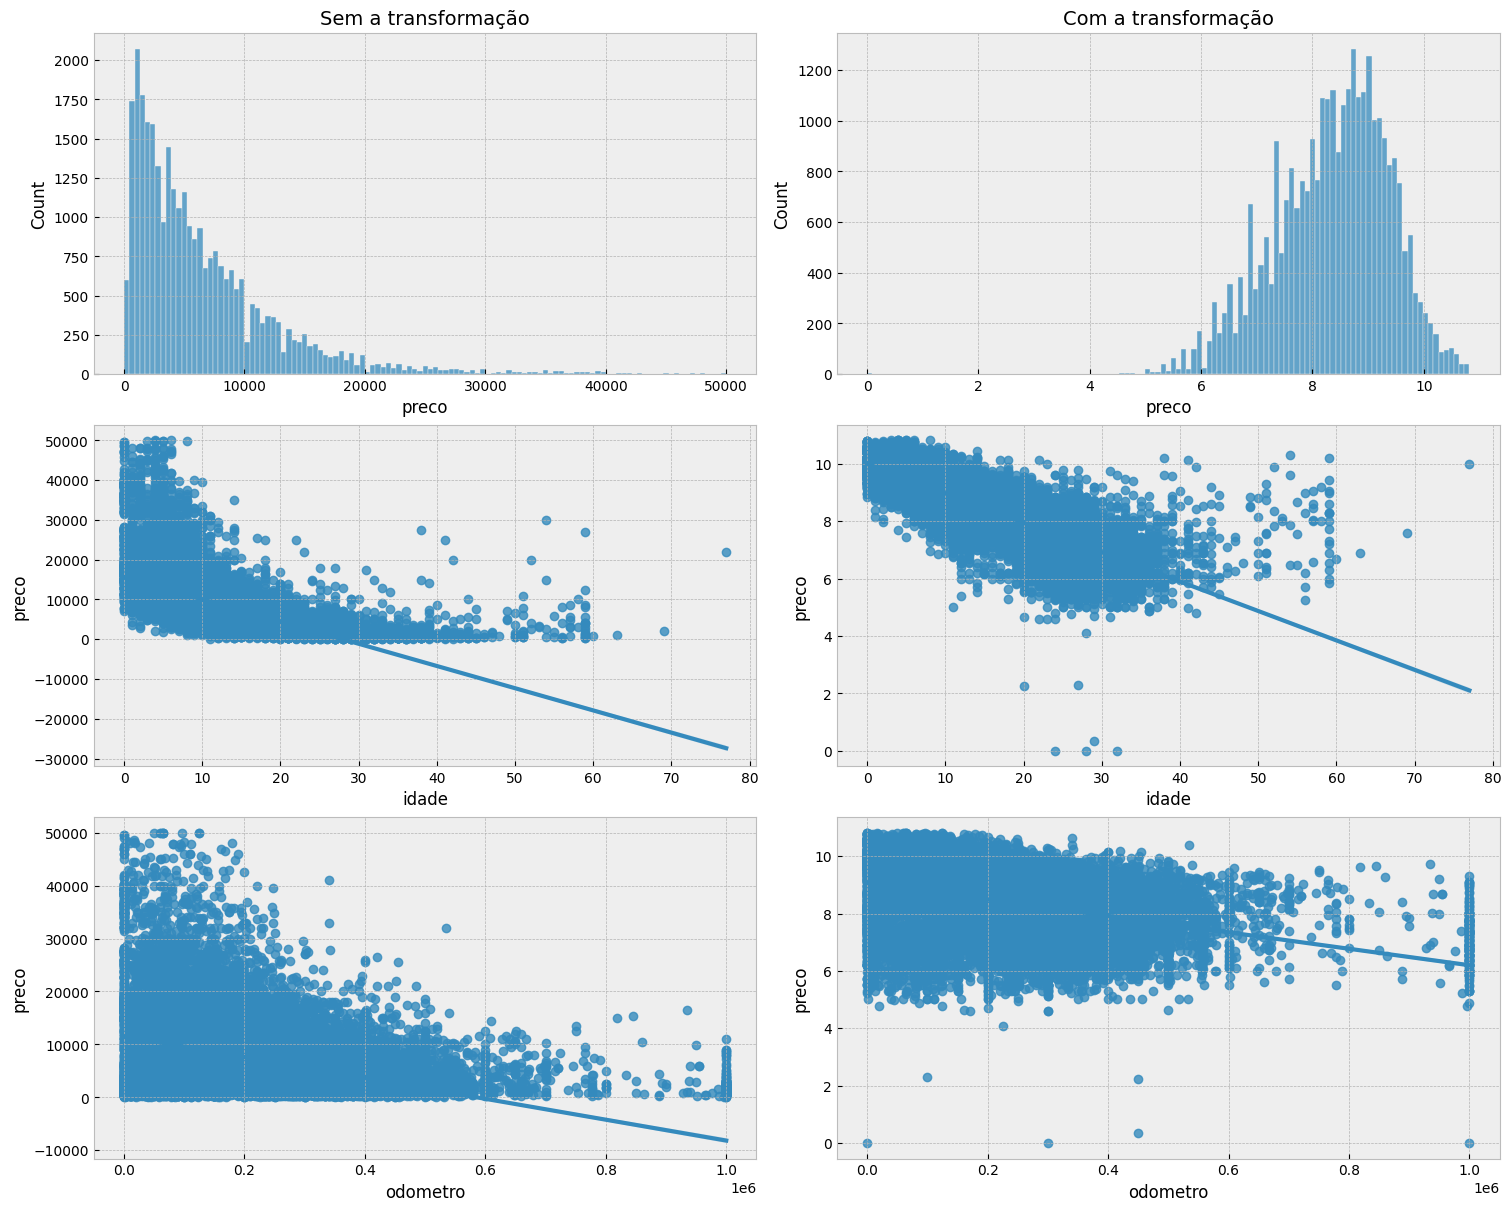

In [56]:
fig, ax = plt.subplots(3,2,constrained_layout=True,figsize=(15,12))

ax[0,0].set_title("Sem a transformação",size=14)
ax[0,1].set_title("Com a transformação",size=14)

sns.histplot(x=car_train['preco'],ax=ax[0,0])
sns.histplot(x=car_train['preco'].apply(np.log),ax=ax[0,1])

sns.regplot(x=car_train['idade'],y=car_train['preco'],ax = ax[1,0])
sns.regplot(x=car_train['idade'],y=car_train['preco'].apply(np.log),ax = ax[1,1])

sns.regplot(x=car_train['odometro'],y=car_train['preco'],ax = ax[2,0])
sns.regplot(x=car_train['odometro'],y=car_train['preco'].apply(np.log),ax = ax[2,1]);

In [52]:
car_train['log_preco'] = np.log(car_train['preco'])

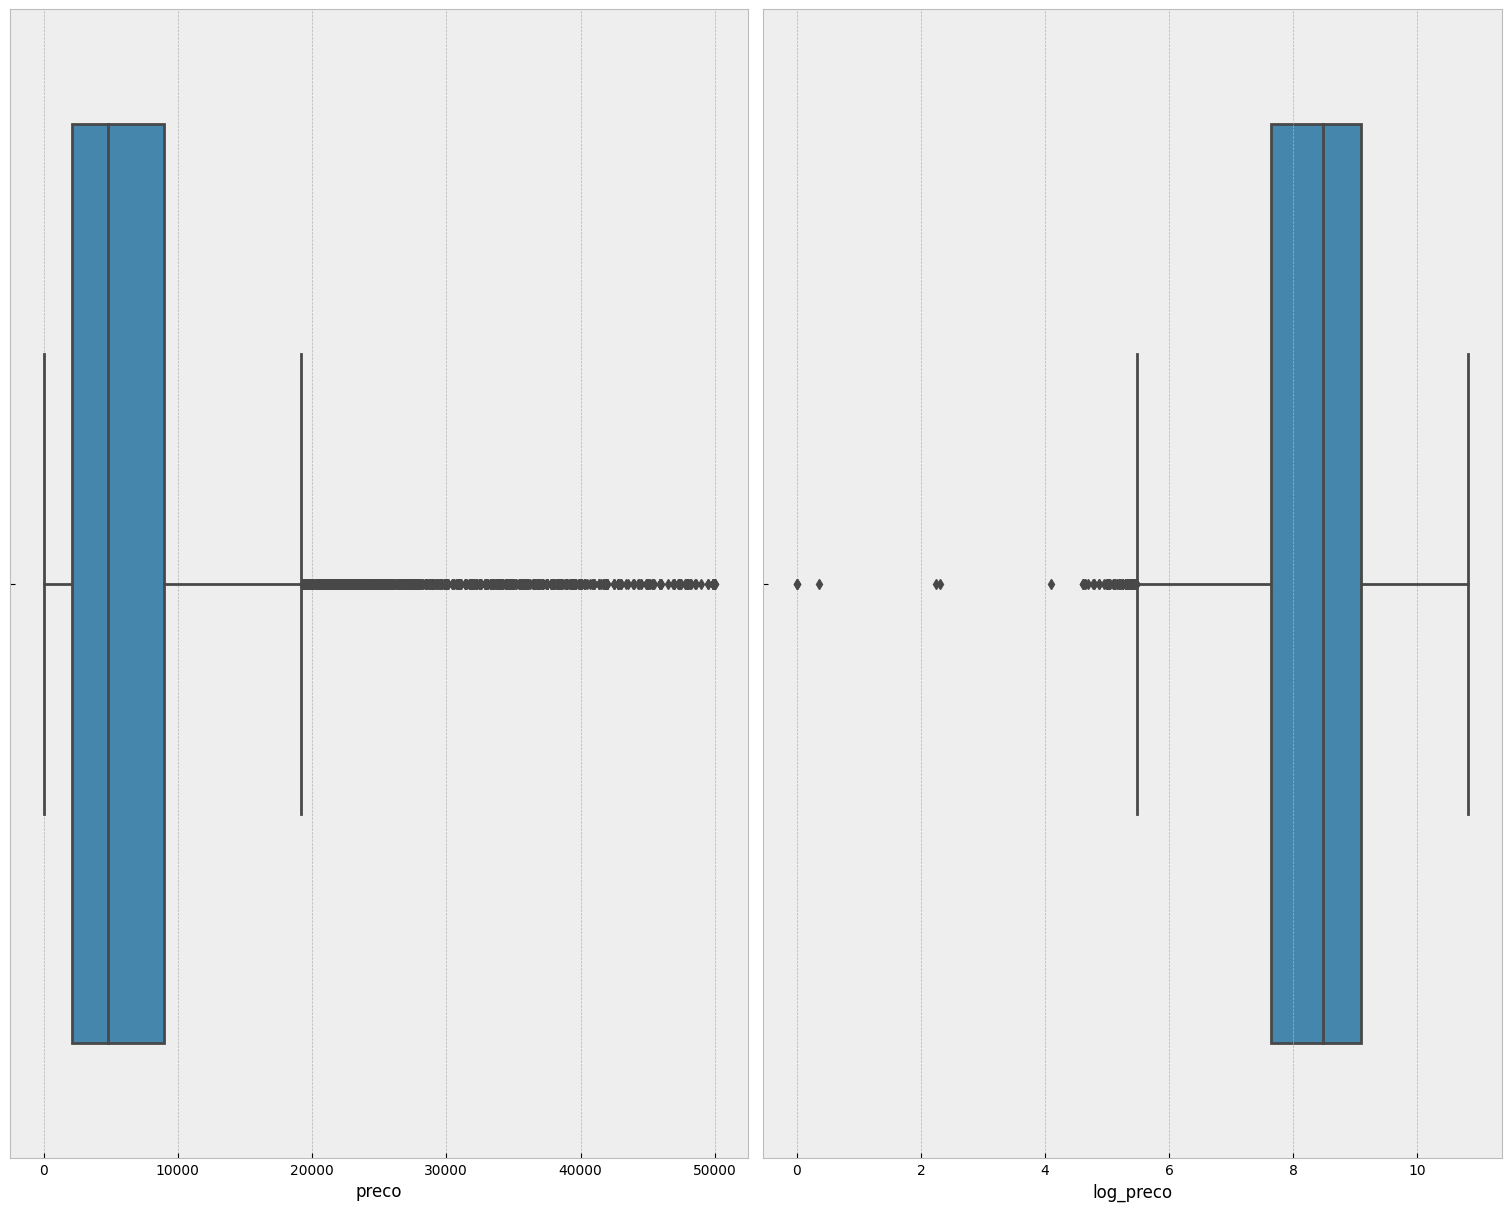

In [57]:
fig, ax = plt.subplots(1,2,constrained_layout=True,figsize=(15,12))

sns.boxplot(x=car_train['preco'],ax=ax[0])
sns.boxplot(x=car_train['log_preco'],ax=ax[1]);

/tmp/ipykernel_8849/1759801471.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_train.corr(),annot=True, fmt= ".2f", linewidths = 1.5,linecolor='black', cmap='inferno');


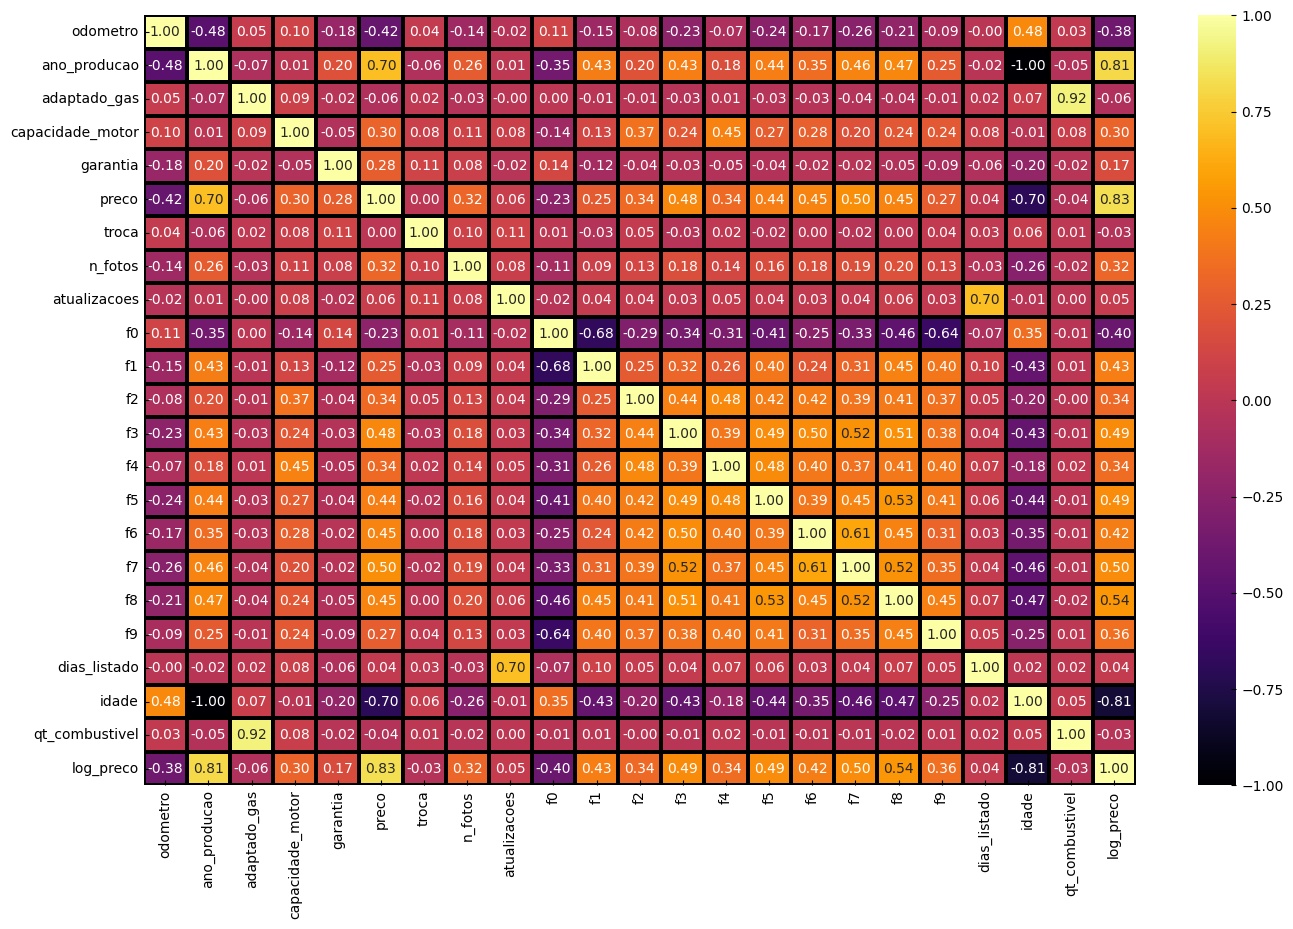

In [54]:
plt.figure(figsize=(16,10));
sns.heatmap(car_train.corr(),annot=True, fmt= ".2f", linewidths = 1.5,linecolor='black', cmap='inferno');

Todos os demais detalhes estão no outro notebook!